# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. 

## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data

# Dataset 


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


### Data files overview

There are `7 different sources` of data:

* __application_train/application_test (307k rows, and 48k rows):__ The main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
| S. No | Table Name            | Rows       | Features | Numerical Features | Categorical Features | Megabytes |
| -----: | --------------------- | ----------: | --------: | ------------------: | --------------------: | ---------: |
| 1     | application_train     | 307,511    | 122      | 106                | 16                   | 158MB     |
| 2     | application_test      | 48,744     | 121      | 105                | 16                   | 25MB      |
| 3     | bureau                | 1,716,428  | 17       | 14                 | 3                    | 162MB     |
| 4     | bureau_balance        | 27,299,925 | 3        | 2                  | 1                    | 358MB     |
| 5     | credit_card_balance   | 3,840,312  | 23       | 22                 | 1                    | 405MB     |
| 6     | installments_payments | 13,605,401 | 8        | 21                 | 16                   | 690MB     |
| 7     | previous_application  | 1,670,214  | 37       | 8                  | 0                    | 386MB     |
| 8     | POS_CASH_balance      | 10,001,358 | 8        | 7                  | 1                    | 375MB     |


### Data Dictionary

As part of the data download comes a Data Dictionary. It is named as `HomeCredit_columns_description.csv`. It contains information about all  fields present in all the above tables. (like the metadata).  

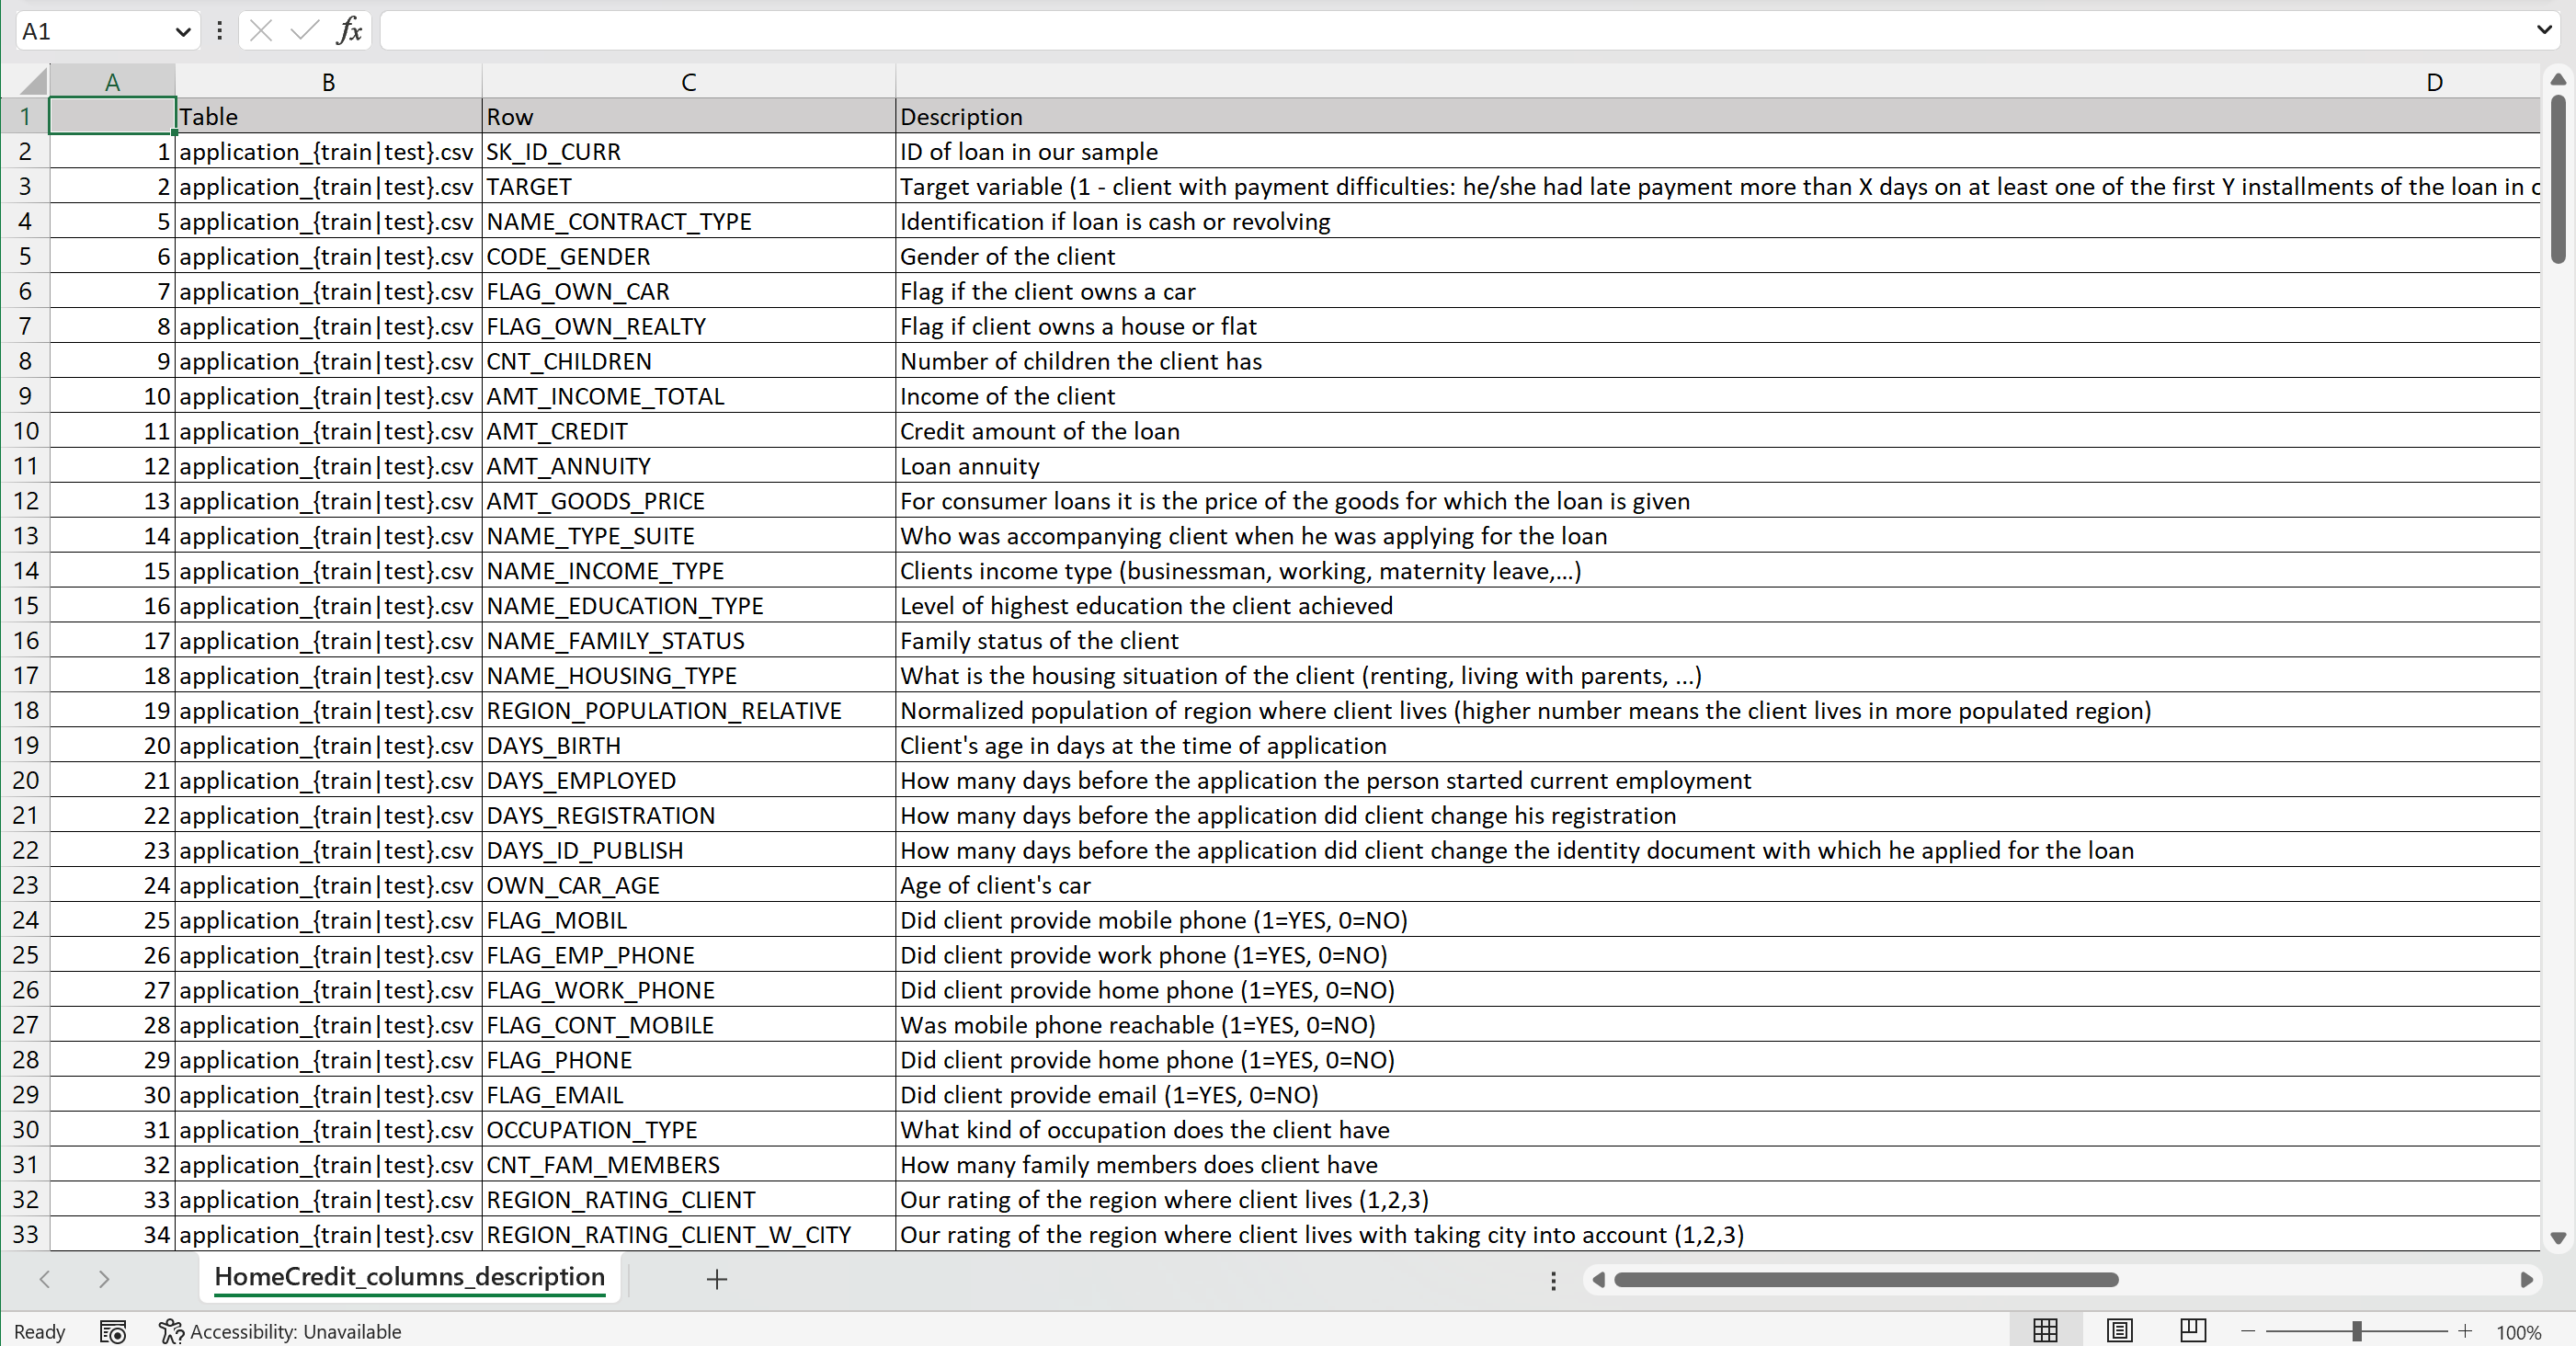

### Table Diagram
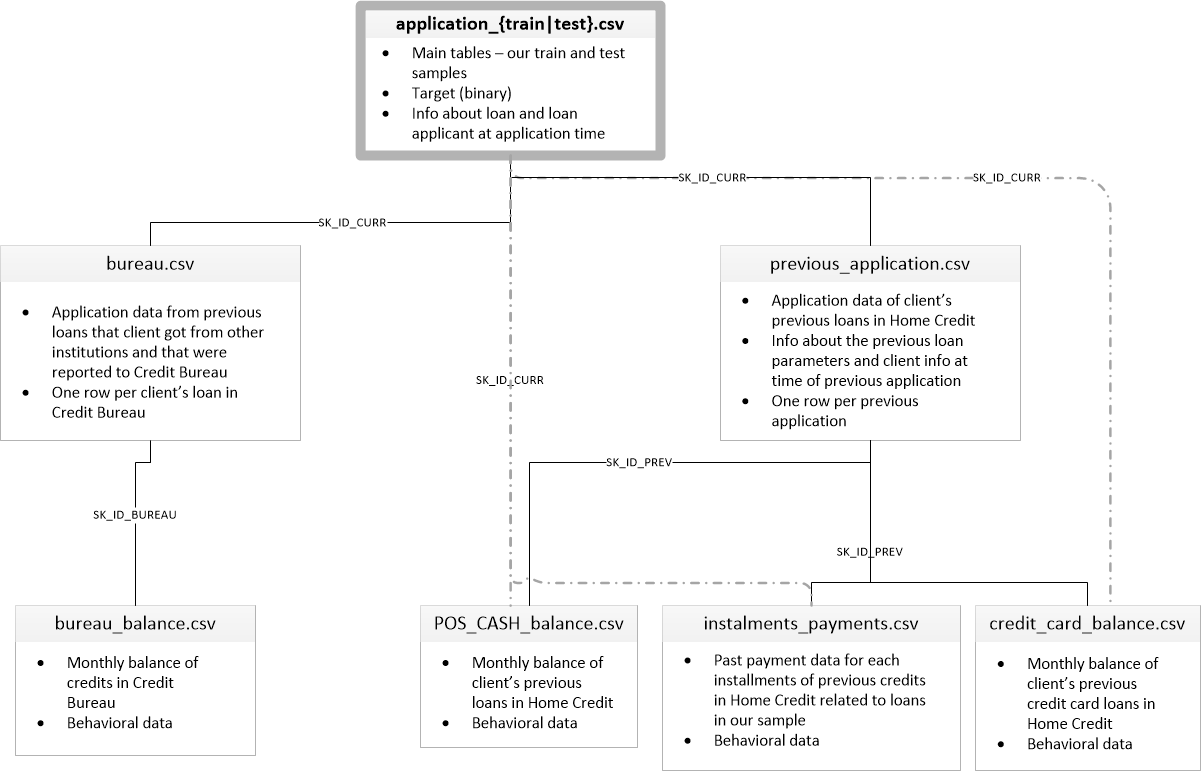



# Data Preparation

## Kaggle API setup

* Install `kaggle` library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).

In [15]:
!pip install kaggle

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [16]:
!pwd

/root/shared/SpringSemester2022-23/AppliedMachineLearning/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2


In [17]:
!ls -l  ~/.kaggle/kaggle.json

-rw------- 1 root root 76 Apr  8 23:18 /root/.kaggle/kaggle.json


In [18]:
json_file_not_exists = True #Change this to false if you already have json from kaggle
if json_file_not_exists: 
    !mkdir ~/.kaggle
    !cp kaggle.json ~/.kaggle
    !chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [19]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  


## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [20]:
DATA_DIR = "../Data/home-credit-default-risk"
!mkdir $DATA_DIR

mkdir: cannot create directory ‘../Data/home-credit-default-risk’: File exists


In [21]:
!ls -l $DATA_DIR

total 3407632
-rw-r--r-- 1 root root     37383 Apr  8 23:19 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root 392703158 Apr  8 23:19 POS_CASH_balance.csv
-rw-r--r-- 1 root root  26567651 Apr  8 23:19 application_test.csv
-rw-r--r-- 1 root root 166133370 Apr  8 23:19 application_train.csv
-rw-r--r-- 1 root root 170016717 Apr  8 23:19 bureau.csv
-rw-r--r-- 1 root root 375592889 Apr  8 23:19 bureau_balance.csv
-rw-r--r-- 1 root root 424582605 Apr  8 23:20 credit_card_balance.csv
-rw-r--r-- 1 root root 721616255 Apr  8 23:19 home-credit-default-risk.zip
-rw-r--r-- 1 root root 723118349 Apr  8 23:20 installments_payments.csv
-rw-r--r-- 1 root root 404973293 Apr  8 23:20 previous_application.csv
-rw-r--r-- 1 root root    536202 Apr  8 23:20 sample_submission.csv


In [22]:
data_not_downloaded = True # change it to false if you already have data
if data_not_downloaded:
    ! kaggle competitions download home-credit-default-risk -p $DATA_DIR --force

100%|███████████████████████████████████████▊| 686M/688M [00:29<00:00, 22.7MB/s]
100%|████████████████████████████████████████| 688M/688M [00:29<00:00, 24.3MB/s]


In [23]:
!pwd 

/root/shared/SpringSemester2022-23/AppliedMachineLearning/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2


In [24]:
!ls -l $DATA_DIR

total 3407632
-rw-r--r-- 1 root root     37383 Apr  8 23:19 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root 392703158 Apr  8 23:19 POS_CASH_balance.csv
-rw-r--r-- 1 root root  26567651 Apr  8 23:19 application_test.csv
-rw-r--r-- 1 root root 166133370 Apr  8 23:19 application_train.csv
-rw-r--r-- 1 root root 170016717 Apr  8 23:19 bureau.csv
-rw-r--r-- 1 root root 375592889 Apr  8 23:19 bureau_balance.csv
-rw-r--r-- 1 root root 424582605 Apr  8 23:20 credit_card_balance.csv
-rw-r--r-- 1 root root 721616255 Apr  9 01:02 home-credit-default-risk.zip
-rw-r--r-- 1 root root 723118349 Apr  8 23:20 installments_payments.csv
-rw-r--r-- 1 root root 404973293 Apr  8 23:20 previous_application.csv
-rw-r--r-- 1 root root    536202 Apr  8 23:20 sample_submission.csv


In [25]:
#!rm -r  DATA_DIR

## Imports

In [3]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
unzippingReq = False #True if not unzipped
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile(f'{DATA_DIR}/home-credit-default-risk.zip', 'r')
    # extractall():  Extract all members from the archive to the current working directory. path specifies a different directory to extract to
    zip_ref.extractall(DATA_DIR) 
    zip_ref.close()


## Load Datasets in dictionary

In [4]:
# lets store the datasets in a dictionary so we can keep track of them easily
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

DATA_DIR = "../Data/home-credit-default-risk"
datasets = {}
# %%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
    datasets[ds_name].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

# Exploratory Data Analysis

## Dataset Size

In [6]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [  3,829,580, 8]


## Function to plot the missing values

In [7]:
def plot_missing_data(df, x, y):
    g = sns.displot(
        data=datasets[df].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    g.fig.set_figwidth(x)
    g.fig.set_figheight(y)

## Summary of Application train

In [15]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [16]:
datasets["application_train"].columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [17]:
datasets["application_train"].dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [18]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [19]:
datasets["application_train"].describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

In [20]:
datasets["application_train"].corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485 -0.012462     -0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025 -0.002022     -0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930     -0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                        0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770138   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.002944    0.004238     0.002185   
AMT_REQ_CREDIT_BUREAU_WEEK          0.002387   -0.001275     0.013881   
AMT_REQ_CREDIT_BUREAU_MON           0.024700    0.054451     0.039148   
AMT_REQ_CREDIT_BUREAU_QRT           0.004859    0.015925     0.010124   
AMT_REQ_CREDIT_BUREAU_YEAR          0.011690   -0.048448    -0.011320   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000232                    0.000849   
TARGET                            -0.039645                   -0.037227   
CNT_CHILDREN                      -0.001827                   -0.025573   
AMT_INCOME_TOTAL                   0.159610                    0.074796   
AMT_CREDIT                         0.986968                    0.099738   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004677                    0.001399   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.001007                   -0.002149   
AMT_REQ_CREDIT_BUREAU_MON          0.056422                    0.078607   
AMT_REQ_CREDIT_BUREAU_QRT          0.016432                   -0.001279   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.050998                    0.001003   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                   -0.001500       0.001366  ...          0.000509   
TARGET                        0.078239      -0.044932  ...         -0.007952   
CNT_CHILDREN                  0.330938      -0.239818  ...          0.004031   
AMT_INCOME_TOTAL              0.027261      -0.064223  ...          0.003130   
AMT_CREDIT                   -0.055436      -0.066838  ...          0.034329   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002255       0.000472  ...          0.013281   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.001336       0.003072  ...         -0.004640   
AMT_REQ_CREDIT_BUREAU_MON     0.001372      -0.034457  ...         -0.001565   
AMT_REQ_CREDIT_BUREAU_QRT    -0.011799       0.015345  ...         -0.005125   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.071983       0.049988  ...         -0.047432   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000167          0.001073   
TARGET                             -0.001358          0.000215   
CNT_CHILDREN                        0.000864          0.000988   
AMT_INCOME_TOTAL                    0.002408          0.000242   
AMT_CREDIT                          0.021082          0.031023   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY         

### Missing values in Application Train

In [21]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MEDI       68.35               210199
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_MEDI              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MEDI               59.38               182590
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590

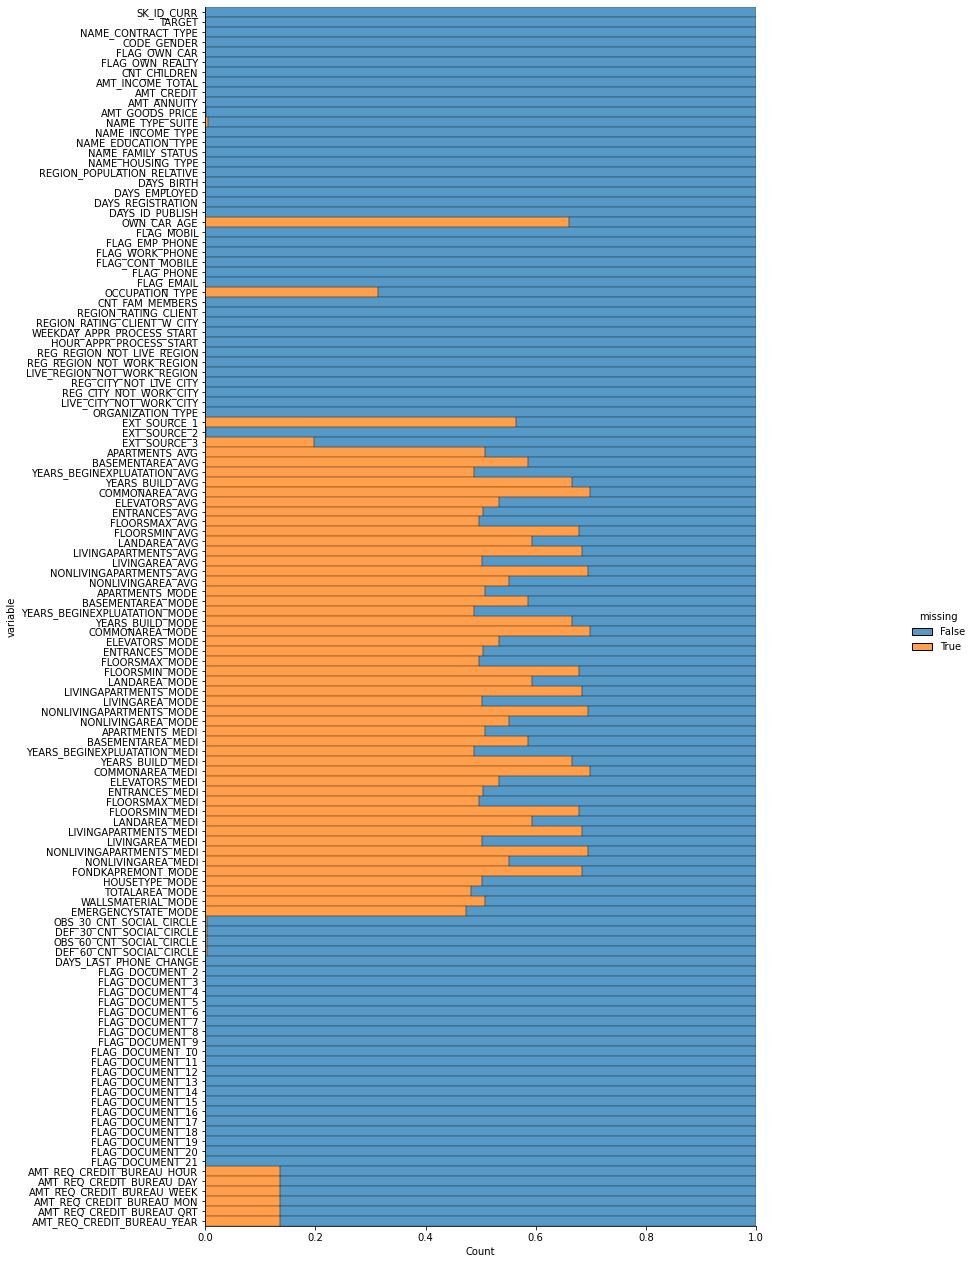

In [22]:
plot_missing_data("application_train",18,20)

## Summary of Application Test

In [23]:
datasets["application_test"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [24]:
datasets["application_test"].columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [25]:
datasets["application_test"].dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [26]:
datasets["application_test"].describe() #numerical only features

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [27]:
datasets["application_test"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count    48744.000000              48744       48744        48744   
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean    277796.676350                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min     100001.000000                NaN         NaN          NaN   
25%     188557.750000                NaN         NaN          NaN   
50%     277549.000000                NaN         NaN          NaN   
75%     367555.500000                NaN         NaN          NaN   
max     456250.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count            48744  48744.000000      4.874400e+04  4.874400e+04   
unique               2           NaN               NaN           NaN   
top                  Y           NaN               NaN           NaN   
freq             33658           NaN               NaN           NaN   
mean               NaN      0.397054      1.784318e+05  5.167404e+05   
std                NaN      0.709047      1.015226e+05  3.653970e+05   
min                NaN      0.000000      2.694150e+04  4.500000e+04   
25%                NaN      0.000000      1.125000e+05  2.606400e+05   
50%                NaN      0.000000      1.575000e+05  4.500000e+05   
75%                NaN      1.000000      2.250000e+05  6.750000e+05   
max                NaN     20.000000      4.410000e+06  2.245500e+06   

          AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count    48720.000000     4.874400e+04  ...     48744.000000          48744.0   
unique            NaN              NaN  ...              NaN              NaN   
top               NaN              NaN  ...              NaN              NaN   
freq              NaN              NaN  ...              NaN              NaN   
mean     29426.240209     4.626188e+05  ...         0.001559              0.0   
std      16016.368315     3.367102e+05  ...         0.039456              0.0   
min       2295.000000     4.500000e+04  ...         0.000000              0.0   
25%      17973.000000     2.250000e+05  ...         0.000000              0.0   
50%      26199.000000     3.960000e+05  ...         0.000000              0.0   
75%      37390.500000     6.300000e+05  ...         0.000000              0.0   
max     180576.000000     2.245500e+06  ...         1.000000              0.0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count           48744.0          48744.0               42695.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean                0.0              0.0                   0.002108   
std                 0.0              0.0                   0.046373   
min                 0.0              0.0                   0.000000   
25%                 0.0              0.0                   0.000000   
50%                 0.0              0.0                   0.000000   
75%                 0.0              0.0                   0.000000   
max                 0.0              0.0                   2.000000   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                42695.000000                42695.000000   
unique                        NaN                         NaN   
top                           NaN                         NaN   
freq                          NaN                         NaN   
mean                     0.001803                    0.002787   
std                      0.046132                    0.054037   
min                      0.000000   

In [28]:
datasets["application_test"].corr()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                    1.000000      0.000635          0.001278   
CNT_CHILDREN                  0.000635      1.000000          0.038962   
AMT_INCOME_TOTAL              0.001278      0.038962          1.000000   
AMT_CREDIT                    0.005014      0.027840          0.396572   
AMT_ANNUITY                   0.007112      0.056770          0.457833   
...                                ...           ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.001083      0.001539          0.004989   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001178      0.007523         -0.002867   
AMT_REQ_CREDIT_BUREAU_MON     0.000430     -0.008337          0.008691   
AMT_REQ_CREDIT_BUREAU_QRT    -0.002092      0.029006          0.007410   
AMT_REQ_CREDIT_BUREAU_YEAR    0.003457     -0.039265          0.003281   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                    0.005014     0.007112         0.005097   
CNT_CHILDREN                  0.027840     0.056770         0.025507   
AMT_INCOME_TOTAL              0.396572     0.457833         0.401995   
AMT_CREDIT                    1.000000     0.777733         0.988056   
AMT_ANNUITY                   0.777733     1.000000         0.787033   
...                                ...          ...              ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.004882     0.006681         0.004865   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002904     0.003085         0.003358   
AMT_REQ_CREDIT_BUREAU_MON    -0.000156     0.005695        -0.000254   
AMT_REQ_CREDIT_BUREAU_QRT    -0.007750     0.012443        -0.008490   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.034533    -0.044901        -0.036227   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                    0.003324    0.002325   
CNT_CHILDREN                                 -0.015231    0.317877   
AMT_INCOME_TOTAL                              0.199773    0.054400   
AMT_CREDIT                                    0.135694   -0.046169   
AMT_ANNUITY                                   0.150864    0.047859   
...                                                ...         ...   
AMT_REQ_CREDIT_BUREAU_DAY                    -0.011773   -0.000386   
AMT_REQ_CREDIT_BUREAU_WEEK                   -0.008321    0.012422   
AMT_REQ_CREDIT_BUREAU_MON                     0.000105    0.014094   
AMT_REQ_CREDIT_BUREAU_QRT                    -0.026650    0.088752   
AMT_REQ_CREDIT_BUREAU_YEAR                    0.001015   -0.095551   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
SK_ID_CURR                      -0.000845           0.001032  ...   
CNT_CHILDREN                    -0.238319           0.175054  ...   
AMT_INCOME_TOTAL                -0.154619           0.067973  ...   
AMT_CREDIT                      -0.083483           0.030740  ...   
AMT_ANNUITY                     -0.137772           0.064450  ...   
...                                   ...                ...  ...   
AMT_REQ_CREDIT_BUREAU_DAY       -0.000785          -0.000152  ...   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.014058           0.008692  ...   
AMT_REQ_CREDIT_BUREAU_MON       -0.013891           0.007414  ...   
AMT_REQ_CREDIT_BUREAU_QRT       -0.044351           0.046011  ...   
AMT_REQ_CREDIT_BUREAU_YEAR       0.064698          -0.036887  ...   

                            FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
SK_ID_CURR                         -0.006286               NaN   
CNT_CHILDREN                       -0.000862               NaN   
AMT_INCOME_TOTAL                   -0.006624               NaN   
AMT_CREDIT                         -0.000197               NaN   
AMT_ANNUITY                        -0.010762               NaN   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY          -0.001515               NaN   
AMT_REQ_CREDIT_BUREAU_WEEK          0.009205               NaN   
AMT_REQ_CR

### Missing data for Application Test

In [29]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_AVG              68.72                33495
COMMONAREA_MODE             68.72                33495
COMMONAREA_MEDI             68.72                33495
NONLIVINGAPARTMENTS_AVG     68.41                33347
NONLIVINGAPARTMENTS_MODE    68.41                33347
NONLIVINGAPARTMENTS_MEDI    68.41                33347
FONDKAPREMONT_MODE          67.28                32797
LIVINGAPARTMENTS_AVG        67.25                32780
LIVINGAPARTMENTS_MODE       67.25                32780
LIVINGAPARTMENTS_MEDI       67.25                32780
FLOORSMIN_MEDI              66.61                32466
FLOORSMIN_AVG               66.61                32466
FLOORSMIN_MODE              66.61                32466
OWN_CAR_AGE                 66.29                32312
YEARS_BUILD_AVG             65.28                31818
YEARS_BUILD_MEDI            65.28                31818
YEARS_BUILD_MODE            65.28                31818
LANDAREA_MEDI               57.96                28254
LANDAREA_AVG                57.96                28254
LANDAREA_MODE               57.96                28254

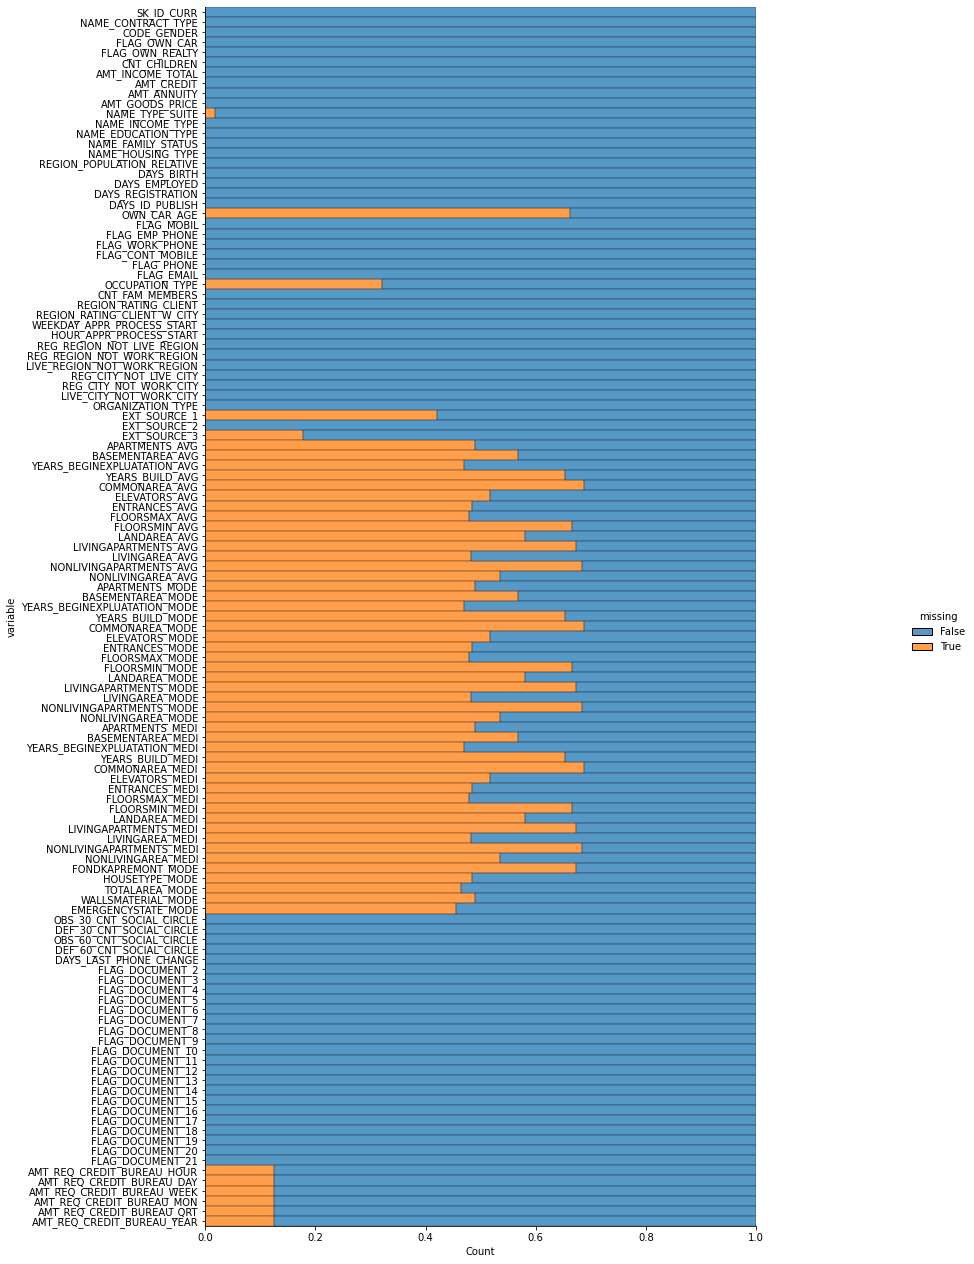

In [30]:
plot_missing_data("application_test",18,20)

## Summary of Bureau

In [31]:
datasets["bureau"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [32]:
datasets["bureau"].columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [33]:
datasets["bureau"].dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [34]:
datasets["bureau"].describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [35]:
datasets["bureau"].describe(include='all')

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
count   1.716428e+06  1.716428e+06       1716428         1716428   
unique           NaN           NaN             4               4   
top              NaN           NaN        Closed      currency 1   
freq             NaN           NaN       1079273         1715020   
mean    2.782149e+05  5.924434e+06           NaN             NaN   
std     1.029386e+05  5.322657e+05           NaN             NaN   
min     1.000010e+05  5.000000e+06           NaN             NaN   
25%     1.888668e+05  5.463954e+06           NaN             NaN   
50%     2.780550e+05  5.926304e+06           NaN             NaN   
75%     3.674260e+05  6.385681e+06           NaN             NaN   
max     4.562550e+05  6.843457e+06           NaN             NaN   

         DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count   1.716428e+06        1.716428e+06         1.610875e+06   
unique           NaN                 NaN                  NaN   
top              NaN                 NaN                  NaN   
freq             NaN                 NaN                  NaN   
mean   -1.142108e+03        8.181666e-01         5.105174e+02   
std     7.951649e+02        3.654443e+01         4.994220e+03   
min    -2.922000e+03        0.000000e+00        -4.206000e+04   
25%    -1.666000e+03        0.000000e+00        -1.138000e+03   
50%    -9.870000e+02        0.000000e+00        -3.300000e+02   
75%    -4.740000e+02        0.000000e+00         4.740000e+02   
max     0.000000e+00        2.792000e+03         3.119900e+04   

        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
count        1.082775e+06            5.919400e+05        1.716428e+06   
unique                NaN                     NaN                 NaN   
top                   NaN                     NaN                 NaN   
freq                  NaN                     NaN                 NaN   
mean        -1.017437e+03            3.825418e+03        6.410406e-03   
std          7.140106e+02            2.060316e+05        9.622391e-02   
min         -4.202300e+04            0.000000e+00        0.000000e+00   
25%         -1.489000e+03            0.000000e+00        0.000000e+00   
50%         -8.970000e+02            0.000000e+00        0.000000e+00   
75%         -4.250000e+02            0.000000e+00        0.000000e+00   
max          0.000000e+00            1.159872e+08        9.000000e+00   

        AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
count     1.716415e+06         1.458759e+06          1.124648e+06   
unique             NaN                  NaN                   NaN   
top                NaN                  NaN                   NaN   
freq               NaN                  NaN                   NaN   
mean      3.549946e+05         1.370851e+05          6.229515e+03   
std       1.149811e+06         6.774011e+05          4.503203e+04   
min       0.000000e+00        -4.705600e+06         -5.864061e+05   
25%       5.130000e+04         0.000000e+00          0.000000e+00   
50%       1.255185e+05         0.000000e+00          0.000000e+00   
75%       3.150000e+05         4.015350e+04          0.000000e+00   
max       5.850000e+08         1.701000e+08          4.705600e+06   

        AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  \
count             1.716428e+06          1716428        1.716428e+06   
unique                     NaN               15                 NaN   
top                        NaN  Consumer credit                 NaN   
freq                       NaN          1251615                 NaN   
mean              3.791276e+01              NaN       -5.937483e+02   
std               5.937650e+03              NaN        7.207473e+02   
min               0.000000e+00              NaN       -4.194700e+04   
25%               0.000000e+00              NaN       -9.080000e+02   
50%               0.000000e+00              NaN       -3.950000e+02

In [36]:
datasets["bureau"].corr()

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  \
SK_ID_CURR                1.000000      0.000135     0.000266   
SK_ID_BUREAU              0.000135      1.000000     0.013015   
DAYS_CREDIT               0.000266      0.013015     1.000000   
CREDIT_DAY_OVERDUE        0.000283     -0.002628    -0.027266   
DAYS_CREDIT_ENDDATE       0.000456      0.009107     0.225682   
DAYS_ENDDATE_FACT        -0.000648      0.017890     0.875359   
AMT_CREDIT_MAX_OVERDUE    0.001329      0.002290    -0.014724   
CNT_CREDIT_PROLONG       -0.000388     -0.000740    -0.030460   
AMT_CREDIT_SUM            0.001179      0.007962     0.050883   
AMT_CREDIT_SUM_DEBT      -0.000790      0.005732     0.135397   
AMT_CREDIT_SUM_LIMIT     -0.000304     -0.003986     0.025140   
AMT_CREDIT_SUM_OVERDUE   -0.000014     -0.000499    -0.000383   
DAYS_CREDIT_UPDATE        0.000510      0.019398     0.688771   
AMT_ANNUITY              -0.002727      0.001799     0.005676   

                        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
SK_ID_CURR                        0.000283             0.000456   
SK_ID_BUREAU                     -0.002628             0.009107   
DAYS_CREDIT                      -0.027266             0.225682   
CREDIT_DAY_OVERDUE                1.000000            -0.007352   
DAYS_CREDIT_ENDDATE              -0.007352             1.000000   
DAYS_ENDDATE_FACT                -0.008637             0.248825   
AMT_CREDIT_MAX_OVERDUE            0.001249             0.000577   
CNT_CREDIT_PROLONG                0.002756             0.113683   
AMT_CREDIT_SUM                   -0.003292             0.055424   
AMT_CREDIT_SUM_DEBT              -0.002355             0.081298   
AMT_CREDIT_SUM_LIMIT             -0.000345             0.095421   
AMT_CREDIT_SUM_OVERDUE            0.090951             0.001077   
DAYS_CREDIT_UPDATE               -0.018461             0.248525   
AMT_ANNUITY                      -0.000339             0.000475   

                        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
SK_ID_CURR                      -0.000648                0.001329   
SK_ID_BUREAU                     0.017890                0.002290   
DAYS_CREDIT                      0.875359               -0.014724   
CREDIT_DAY_OVERDUE              -0.008637                0.001249   
DAYS_CREDIT_ENDDATE              0.248825                0.000577   
DAYS_ENDDATE_FACT                1.000000                0.000999   
AMT_CREDIT_MAX_OVERDUE           0.000999                1.000000   
CNT_CREDIT_PROLONG               0.012017                0.001523   
AMT_CREDIT_SUM                   0.059096                0.081663   
AMT_CREDIT_SUM_DEBT              0.019609                0.014007   
AMT_CREDIT_SUM_LIMIT             0.019476               -0.000112   
AMT_CREDIT_SUM_OVERDUE          -0.000332                0.015036   
DAYS_CREDIT_UPDATE               0.751294               -0.000749   
AMT_ANNUITY                      0.006274                0.001578   

                        CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
SK_ID_CURR                       -0.000388        0.001179   
SK_ID_BUREAU                     -0.000740        0.007962   
DAYS_CREDIT                      -0.030460        0.050883   
CREDIT_DAY_OVERDUE                0.002756       -0.003292   
DAYS_CREDIT_ENDDATE               0.113683        0.055424   
DAYS_ENDDATE_FACT                 0.012017        0.059096   
AMT_CREDIT_MAX_OVERDUE            0.001523        0.081663   
CNT_CREDIT_PROLONG                1.000000       -0.008345   
AMT_CREDIT_SUM                   -0.008345        1.000000   
AMT_CREDIT_SUM_DEBT              -0.001366        0.683419   
AMT_CREDIT_SUM_LIMIT              0.073805        0.003756   
AMT_CREDIT_SUM_OVERDUE            0.000002        0.006342   
DAYS_CREDIT_UPDATE                0.017864        0.104629   
AMT_ANNUITY                      -0.000465        0.049146   

                        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
SK_ID_

### Missing data for Bureau

In [37]:
percent = (datasets["bureau"].isnull().sum()/datasets["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
AMT_ANNUITY               71.47             1226791
AMT_CREDIT_MAX_OVERDUE    65.51             1124488
DAYS_ENDDATE_FACT         36.92              633653
AMT_CREDIT_SUM_LIMIT      34.48              591780
AMT_CREDIT_SUM_DEBT       15.01              257669
DAYS_CREDIT_ENDDATE        6.15              105553
AMT_CREDIT_SUM             0.00                  13
CREDIT_ACTIVE              0.00                   0
CREDIT_CURRENCY            0.00                   0
DAYS_CREDIT                0.00                   0
CREDIT_DAY_OVERDUE         0.00                   0
SK_ID_BUREAU               0.00                   0
CNT_CREDIT_PROLONG         0.00                   0
AMT_CREDIT_SUM_OVERDUE     0.00                   0
CREDIT_TYPE                0.00                   0
DAYS_CREDIT_UPDATE         0.00                   0
SK_ID_CURR                 0.00                   0

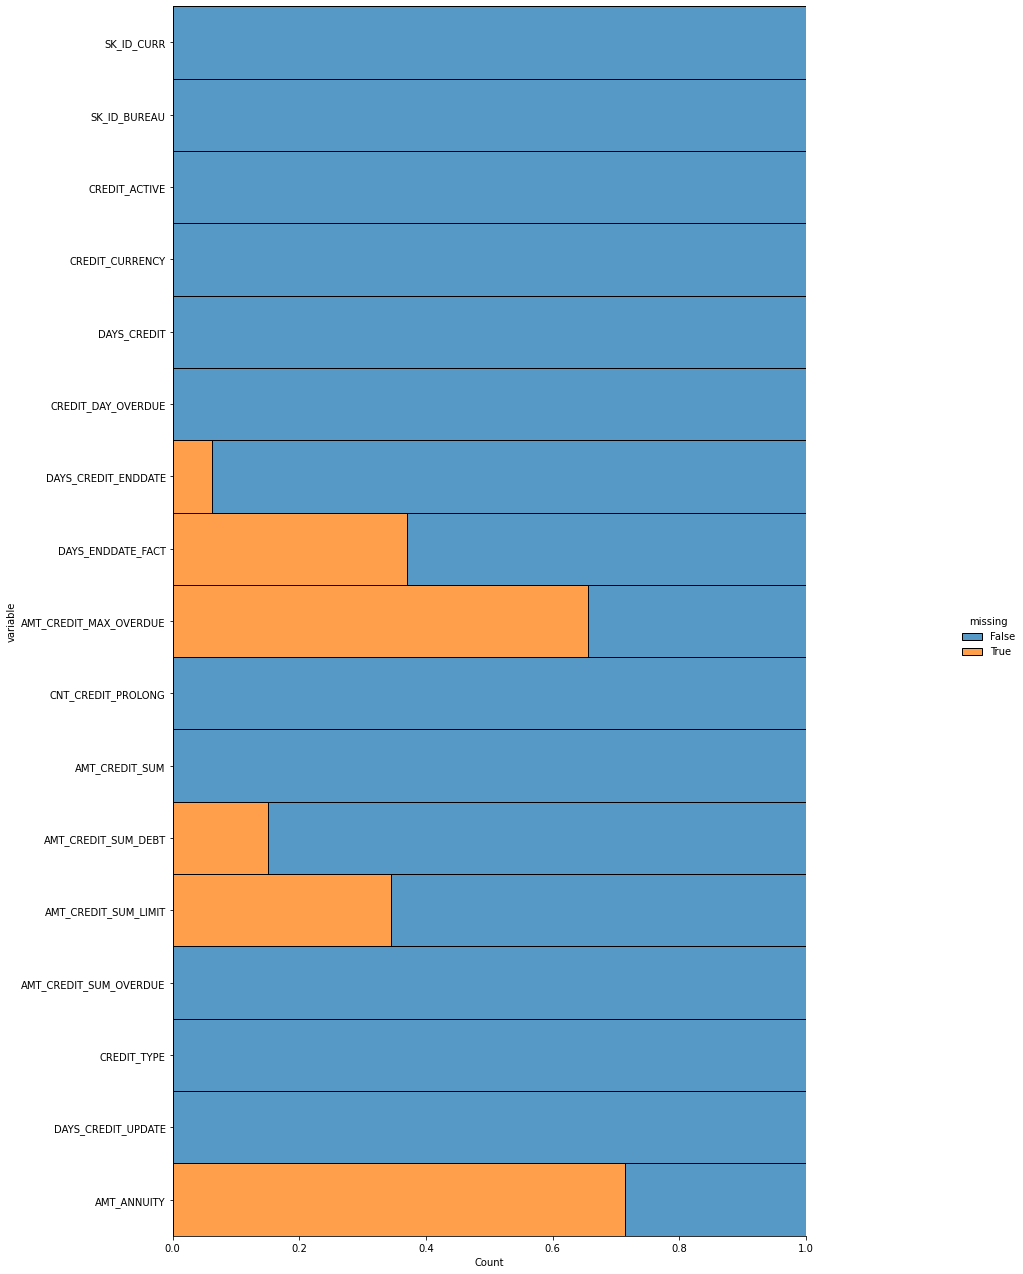

In [38]:
plot_missing_data("bureau",18,20)

## Summary of Bureau Balance

In [8]:
datasets["bureau_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [9]:
datasets["bureau_balance"].columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [10]:
datasets["bureau_balance"].dtypes

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [11]:
datasets["bureau_balance"].describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

In [12]:
datasets["bureau_balance"].describe(include='all')

SK_ID_BUREAU  MONTHS_BALANCE    STATUS
count   2.729992e+07    2.729992e+07  27299925
unique           NaN             NaN         8
top              NaN             NaN         C
freq             NaN             NaN  13646993
mean    6.036297e+06   -3.074169e+01       NaN
std     4.923489e+05    2.386451e+01       NaN
min     5.001709e+06   -9.600000e+01       NaN
25%     5.730933e+06   -4.600000e+01       NaN
50%     6.070821e+06   -2.500000e+01       NaN
75%     6.431951e+06   -1.100000e+01       NaN
max     6.842888e+06    0.000000e+00       NaN

In [13]:
datasets["bureau_balance"].corr()

SK_ID_BUREAU  MONTHS_BALANCE
SK_ID_BUREAU        1.000000        0.011873
MONTHS_BALANCE      0.011873        1.000000

### Missing data for Bureau Balance

In [14]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
SK_ID_BUREAU        0.0                   0
MONTHS_BALANCE      0.0                   0
STATUS              0.0                   0

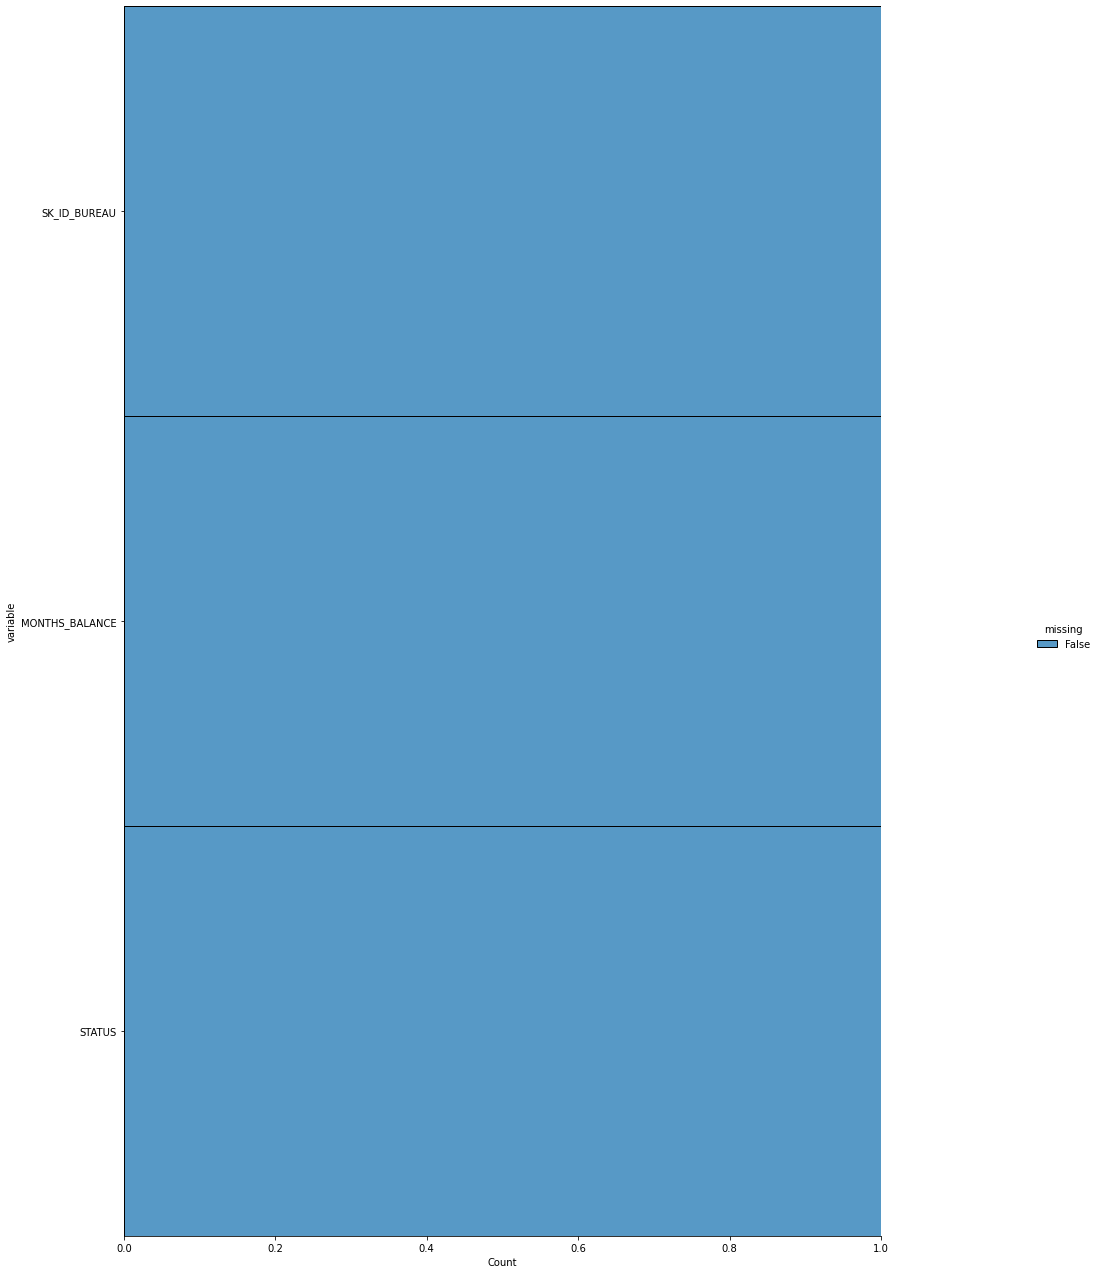

In [15]:
plot_missing_data("bureau_balance",18,20)

## Summary of POS_CASH_balance

In [6]:
datasets["POS_CASH_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829580 entries, 0 to 3829579
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 float64
 7   SK_DPD_DEF             float64
dtypes: float64(4), int64(3), object(1)
memory usage: 233.7+ MB


In [7]:
datasets["POS_CASH_balance"].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [8]:
datasets["POS_CASH_balance"].dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                   float64
SK_DPD_DEF               float64
dtype: object

In [9]:
datasets["POS_CASH_balance"].describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  3.829580e+06  3.829580e+06    3.829580e+06    3.823444e+06   
mean   1.904375e+06  2.785338e+05   -3.214404e+01    1.956578e+01   
std    5.355338e+05  1.027329e+05    2.549135e+01    1.380046e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.435030e+06  1.896800e+05   -4.600000e+01    1.000000e+01   
50%    1.898227e+06  2.788660e+05   -2.300000e+01    1.200000e+01   
75%    2.369573e+06  3.676380e+05   -1.200000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           3.823437e+06  3.829579e+06  3.829579e+06  
mean            1.283459e+01  4.358176e-01  7.258109e-02  
std             1.273046e+01  1.744642e+01  1.541065e+00  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             4.000000e+00  0.000000e+00  0.000000e+00  
50%             9.000000e+00  0.000000e+00  0.000000e+00  
75%             1.800000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  3.006000e+03  4.190000e+02

In [10]:
datasets["POS_CASH_balance"].describe(include='all')

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count   3.829580e+06  3.829580e+06    3.829580e+06    3.823444e+06   
unique           NaN           NaN             NaN             NaN   
top              NaN           NaN             NaN             NaN   
freq             NaN           NaN             NaN             NaN   
mean    1.904375e+06  2.785338e+05   -3.214404e+01    1.956578e+01   
std     5.355338e+05  1.027329e+05    2.549135e+01    1.380046e+01   
min     1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%     1.435030e+06  1.896800e+05   -4.600000e+01    1.000000e+01   
50%     1.898227e+06  2.788660e+05   -2.300000e+01    1.200000e+01   
75%     2.369573e+06  3.676380e+05   -1.200000e+01    2.400000e+01   
max     2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

        CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS        SK_DPD    SK_DPD_DEF  
count            3.823437e+06              3829579  3.829579e+06  3.829579e+06  
unique                    NaN                    8           NaN           NaN  
top                       NaN               Active           NaN           NaN  
freq                      NaN              3570142           NaN           NaN  
mean             1.283459e+01                  NaN  4.358176e-01  7.258109e-02  
std              1.273046e+01                  NaN  1.744642e+01  1.541065e+00  
min              0.000000e+00                  NaN  0.000000e+00  0.000000e+00  
25%              4.000000e+00                  NaN  0.000000e+00  0.000000e+00  
50%              9.000000e+00                  NaN  0.000000e+00  0.000000e+00  
75%              1.800000e+01                  NaN  0.000000e+00  0.000000e+00  
max              8.500000e+01                  NaN  3.006000e+03  4.190000e+02

In [11]:
datasets["POS_CASH_balance"].corr()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
SK_ID_PREV               1.000000   -0.000208        0.003497        0.003542   
SK_ID_CURR              -0.000208    1.000000        0.000430        0.000618   
MONTHS_BALANCE           0.003497    0.000430        1.000000        0.433006   
CNT_INSTALMENT           0.003542    0.000618        0.433006        1.000000   
CNT_INSTALMENT_FUTURE    0.003431   -0.000105        0.351605        0.897199   
SK_DPD                   0.000632   -0.000401       -0.010548       -0.013366   
SK_DPD_DEF               0.000186    0.002109       -0.027817       -0.009263   

                       CNT_INSTALMENT_FUTURE    SK_DPD  SK_DPD_DEF  
SK_ID_PREV                          0.003431  0.000632    0.000186  
SK_ID_CURR                         -0.000105 -0.000401    0.002109  
MONTHS_BALANCE                      0.351605 -0.010548   -0.027817  
CNT_INSTALMENT                      0.897199 -0.013366   -0.009263  
CNT_INSTALMENT_FUTURE               1.000000 -0.020738   -0.017952  
SK_DPD                             -0.020738  1.000000    0.090650  
SK_DPD_DEF                         -0.017952  0.090650    1.000000

### Missing data for POS_CASH_balance

In [12]:
percent = (datasets["POS_CASH_balance"].isnull().sum()/datasets["POS_CASH_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["POS_CASH_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
CNT_INSTALMENT_FUTURE     0.16                6143
CNT_INSTALMENT            0.16                6136
NAME_CONTRACT_STATUS      0.00                   1
SK_DPD                    0.00                   1
SK_DPD_DEF                0.00                   1
SK_ID_PREV                0.00                   0
SK_ID_CURR                0.00                   0
MONTHS_BALANCE            0.00                   0

In [ ]:
plot_missing_data("POS_CASH_balance",18,20)

## Summary of credit_card_balance

In [13]:
datasets["credit_card_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [14]:
datasets["credit_card_balance"].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [15]:
datasets["credit_card_balance"].dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

In [16]:
datasets["credit_card_balance"].describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
count              3.090496e+06             3.535076e+06  ...   
mean               2.968805e+03             3.540204e+03  ...   
std                2.079689e+04             5.600154e+03  ...   
min                0.000000e+00             0.000000e+00  ...   
25%                0.000000e+00             0.000000e+00  ...   
50%                0.000000e+00             0.000000e+00  ...   
75%                0.000000e+00             6.633911e+03  ...   
max                2.239274e+06             2.028820e+05  ...   

       AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
count              3.840312e+06   3.840312e+06          3.840312e+06   
mean               5.596588e+04   5.808881e+04          5.809829e+04   
std                1.025336e+05   1.059654e+05          1.059718e+05   
min               -4.233058e+05  -4.202502e+05         -4.202502e+05   
25%                0.000000e+00   0.000000e+00          0.000000e+00   
50%                0.000000e+00   0.000000e+00          0.000000e+00   
75%                8.535924e+04   8.889949e+04          8.891451e+04   
max                1.472317e+06   1.493338e+06          1.493338e+06   

       CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count              3.090496e+06          3.840312e+06   
mean               3.094490e-01          7.031439e-01   
std                1.100401e+00          3.190347e+00   
min                0.000000e+00          0.000000e+00   
25%                0.000000e+00          0.000000e+00   
50%                0.000000e+00          0.000000e+00   
75%                0.000000e+00          0.000000e+00   
max                5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std                  8.263861e-02              3.240649e+00   
min                  0.000000e+00              0.000000e+00   
25%                  0.000000e+00              0.000000e+00   
50%                  0.000000e+00              0.000000e+00   
75%                  0.000000e+00              0.000000e+00   
max                  1.200000e+01              1.650000e+02   

       CNT_INST

In [17]:
datasets["credit_card_balance"].describe(include='all')

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count   3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
unique           NaN           NaN             NaN           NaN   
top              NaN           NaN             NaN           NaN   
freq             NaN           NaN             NaN           NaN   
mean    1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std     5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min     1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%     1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%     1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%     2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max     2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

        AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count              3.840312e+06              3.090496e+06   
unique                      NaN                       NaN   
top                         NaN                       NaN   
freq                        NaN                       NaN   
mean               1.538080e+05              5.961325e+03   
std                1.651457e+05              2.822569e+04   
min                0.000000e+00             -6.827310e+03   
25%                4.500000e+04              0.000000e+00   
50%                1.125000e+05              0.000000e+00   
75%                1.800000e+05              0.000000e+00   
max                1.350000e+06              2.115000e+06   

        AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count           3.840312e+06                3.090496e+06   
unique                   NaN                         NaN   
top                      NaN                         NaN   
freq                     NaN                         NaN   
mean            7.433388e+03                2.881696e+02   
std             3.384608e+04                8.201989e+03   
min            -6.211620e+03                0.000000e+00   
25%             0.000000e+00                0.000000e+00   
50%             0.000000e+00                0.000000e+00   
75%             0.000000e+00                0.000000e+00   
max             2.287098e+06                1.529847e+06   

        AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  \
count               3.090496e+06             3.535076e+06  ...   3.840312e+06   
unique                       NaN                      NaN  ...            NaN   
top                          NaN                      NaN  ...            NaN   
freq                         NaN                      NaN  ...            NaN   
mean                2.968805e+03             3.540204e+03  ...   5.808881e+04   
std                 2.079689e+04             5.600154e+03  ...   1.059654e+05   
min                 0.000000e+00             0.000000e+00  ...  -4.202502e+05   
25%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
50%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
75%                 0.000000e+00             6.633911e+03  ...   8.889949e+04   
max                 2.239274e+06             2.028820e+05  ...   1.493338e+06   

        AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count           3.840312e+06              3.090496e+06          3.840312e+06   
unique                   NaN                       NaN                   NaN   
top                      NaN                       NaN                   NaN   
freq                     NaN                       NaN                   NaN   
mean            5.809829e+04              3.094490e-01          7.031439e-01   
std             1.059718e+05              1.100401e+00          3.190347e+00   
min            -4.202502e+05              0.000000e+00          0.000000e+00   
25%             0.000000e+00              0.000000e+00          0.000000e+00   
50%             0.000000e+00              0.00

In [18]:
datasets["credit_card_balance"].corr()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  \
SK_ID_PREV                    1.000000    0.004723        0.003670   
SK_ID_CURR                    0.004723    1.000000        0.001696   
MONTHS_BALANCE                0.003670    0.001696        1.000000   
AMT_BALANCE                   0.005046    0.003510        0.014558   
AMT_CREDIT_LIMIT_ACTUAL       0.006631    0.005991        0.199900   
AMT_DRAWINGS_ATM_CURRENT      0.004342    0.000814        0.036802   
AMT_DRAWINGS_CURRENT          0.002624    0.000708        0.065527   
AMT_DRAWINGS_OTHER_CURRENT   -0.000160    0.000958        0.000405   
AMT_DRAWINGS_POS_CURRENT      0.001721   -0.000786        0.118146   
AMT_INST_MIN_REGULARITY       0.006460    0.003300       -0.087529   
AMT_PAYMENT_CURRENT           0.003472    0.000127        0.076355   
AMT_PAYMENT_TOTAL_CURRENT     0.001641    0.000784        0.035614   
AMT_RECEIVABLE_PRINCIPAL      0.005140    0.003589        0.016266   
AMT_RECIVABLE                 0.005035    0.003518        0.013172   
AMT_TOTAL_RECEIVABLE          0.005032    0.003524        0.013084   
CNT_DRAWINGS_ATM_CURRENT      0.002821    0.002082        0.002536   
CNT_DRAWINGS_CURRENT          0.000367    0.002654        0.113321   
CNT_DRAWINGS_OTHER_CURRENT   -0.001412   -0.000131       -0.026192   
CNT_DRAWINGS_POS_CURRENT      0.000809    0.002135        0.160207   
CNT_INSTALMENT_MATURE_CUM    -0.007219   -0.000581       -0.008620   
SK_DPD                       -0.001786   -0.000962        0.039434   
SK_DPD_DEF                    0.001973    0.001519        0.001659   

                            AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
SK_ID_PREV                     0.005046                 0.006631   
SK_ID_CURR                     0.003510                 0.005991   
MONTHS_BALANCE                 0.014558                 0.199900   
AMT_BALANCE                    1.000000                 0.489386   
AMT_CREDIT_LIMIT_ACTUAL        0.489386                 1.000000   
AMT_DRAWINGS_ATM_CURRENT       0.283551                 0.247219   
AMT_DRAWINGS_CURRENT           0.336965                 0.263093   
AMT_DRAWINGS_OTHER_CURRENT     0.065366                 0.050579   
AMT_DRAWINGS_POS_CURRENT       0.169449                 0.234976   
AMT_INST_MIN_REGULARITY        0.896728                 0.467620   
AMT_PAYMENT_CURRENT            0.143934                 0.308294   
AMT_PAYMENT_TOTAL_CURRENT      0.151349                 0.226570   
AMT_RECEIVABLE_PRINCIPAL       0.999720                 0.490445   
AMT_RECIVABLE                  0.999917                 0.488641   
AMT_TOTAL_RECEIVABLE           0.999897                 0.488598   
CNT_DRAWINGS_ATM_CURRENT       0.309968                 0.221808   
CNT_DRAWINGS_CURRENT           0.259184                 0.204237   
CNT_DRAWINGS_OTHER_CURRENT     0.046563                 0.030051   
CNT_DRAWINGS_POS_CURRENT       0.155553                 0.202868   
CNT_INSTALMENT_MATURE_CUM      0.005009                -0.157269   
SK_DPD                        -0.046988                -0.038791   
SK_DPD_DEF                     0.013009                -0.002236   

                            AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
SK_ID_PREV                                  0.004342              0.002624   
SK_ID_CURR                                  0.000814              0.000708   
MONTHS_BALANCE                              0.036802              0.065527   
AMT_BALANCE                                 0.283551              0.336965   
AMT_CREDIT_LIMIT_ACTUAL                     0.247219              0.263093   
AMT_DRAWINGS_ATM_CURRENT                    1.000000              0.800190   
AMT_DRAWINGS_CURRENT                        0.800190              1.000000   
AMT_DRAWINGS_OTHER_CURRENT                  0.017899              0.236297   
AMT_DRAWINGS_POS_CURRENT                    0.078971              0.615591   
AMT_INST_MIN_REGULARITY                     0.094824              0.1244

### Missing data for credit_card_balance

In [19]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
AMT_PAYMENT_CURRENT           20.00              767988
AMT_DRAWINGS_ATM_CURRENT      19.52              749816
CNT_DRAWINGS_POS_CURRENT      19.52              749816
AMT_DRAWINGS_OTHER_CURRENT    19.52              749816
AMT_DRAWINGS_POS_CURRENT      19.52              749816
CNT_DRAWINGS_OTHER_CURRENT    19.52              749816
CNT_DRAWINGS_ATM_CURRENT      19.52              749816
CNT_INSTALMENT_MATURE_CUM      7.95              305236
AMT_INST_MIN_REGULARITY        7.95              305236
SK_ID_PREV                     0.00                   0
AMT_TOTAL_RECEIVABLE           0.00                   0
SK_DPD                         0.00                   0
NAME_CONTRACT_STATUS           0.00                   0
CNT_DRAWINGS_CURRENT           0.00                   0
AMT_PAYMENT_TOTAL_CURRENT      0.00                   0
AMT_RECIVABLE                  0.00                   0
AMT_RECEIVABLE_PRINCIPAL       0.00                   0
SK_ID_CURR                     0.00                   0
AMT_DRAWINGS_CURRENT           0.00                   0
AMT_CREDIT_LIMIT_ACTUAL        0.00                   0

In [ ]:
plot_missing_data("credit_card_balance",18,20)

## Summary of previous_application

In [20]:
datasets["previous_application"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [21]:
datasets["previous_application"].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [22]:
datasets["previous_application"].dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [23]:
datasets["previous_application"].describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [24]:
datasets["previous_application"].describe(include='all')

SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
count   1.670214e+06  1.670214e+06            1670214  1.297979e+06   
unique           NaN           NaN                  4           NaN   
top              NaN           NaN         Cash loans           NaN   
freq             NaN           NaN             747553           NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.595512e+04   
std     5.325980e+05  1.028148e+05                NaN  1.478214e+04   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  6.321780e+03   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04   
75%     2.384280e+06  3.675140e+05                NaN  2.065842e+04   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05   

        AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count      1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06   
unique              NaN           NaN               NaN              NaN   
top                 NaN           NaN               NaN              NaN   
freq                NaN           NaN               NaN              NaN   
mean       1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05   
std        2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05   
min        0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00   
25%        1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04   
50%        7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05   
75%        1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05   
max        6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
count                     1670214             1.670214e+06  ...   
unique                          7                      NaN  ...   
top                       TUESDAY                      NaN  ...   
freq                       255118                      NaN  ...   
mean                          NaN             1.248418e+01  ...   
std                           NaN             3.334028e+00  ...   
min                           NaN             0.000000e+00  ...   
25%                           NaN             1.000000e+01  ...   
50%                           NaN             1.200000e+01  ...   
75%                           NaN             1.500000e+01  ...   
max                           NaN             2.300000e+01  ...   

       NAME_SELLER_INDUSTRY   CNT_PAYMENT  NAME_YIELD_GROUP  \
count               1670214  1.297984e+06           1670214   
unique                   11           NaN                 5   
top                     XNA           NaN               XNA   
freq                 855720           NaN            517215   
mean                    NaN  1.605408e+01               NaN   
std                     NaN  1.456729e+01               NaN   
min                     NaN  0.000000e+00               NaN   
25%                     NaN  6.000000e+00               NaN   
50%                     NaN  1.200000e+01               NaN   
75%                     NaN  2.400000e+01               NaN   
max                     NaN  8.400000e+01               NaN   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
count               1669868       997149.000000  997149.000000   
unique                   17                 NaN            NaN   
top                    Cash                 NaN            NaN   
freq                 285990                 NaN            NaN   
mean                    NaN       342209.855039   13826.269337   
std                     NaN        88916.115833   72444.869708   
min                     NaN        -2922.000000   -2892.000000   
25%                     NaN       365243.000000   -1628.000000   
50%                     NaN       365243.000000    -831.000000   
75%                   

In [25]:
datasets["previous_application"].corr()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000   -0.000321     0.011459   
SK_ID_CURR                  -0.000321    1.000000     0.000577   
AMT_ANNUITY                  0.011459    0.000577     1.000000   
AMT_APPLICATION              0.003302    0.000280     0.808872   
AMT_CREDIT                   0.003659    0.000195     0.816429   
AMT_DOWN_PAYMENT            -0.001313   -0.000063     0.267694   
AMT_GOODS_PRICE              0.015293    0.000369     0.820895   
HOUR_APPR_PROCESS_START     -0.002652    0.002842    -0.036201   
NFLAG_LAST_APPL_IN_DAY      -0.002828    0.000098     0.020639   
RATE_DOWN_PAYMENT           -0.004051    0.001158    -0.103878   
RATE_INTEREST_PRIMARY        0.012969    0.033197     0.141823   
RATE_INTEREST_PRIVILEGED    -0.022312   -0.016757    -0.202335   
DAYS_DECISION                0.019100   -0.000637     0.279051   
SELLERPLACE_AREA            -0.001079    0.001265    -0.015027   
CNT_PAYMENT                  0.015589    0.000031     0.394535   
DAYS_FIRST_DRAWING          -0.001478   -0.001329     0.052839   
DAYS_FIRST_DUE              -0.000071   -0.000757    -0.053295   
DAYS_LAST_DUE_1ST_VERSION    0.001222    0.000252    -0.068877   
DAYS_LAST_DUE                0.001915   -0.000318     0.082659   
DAYS_TERMINATION             0.001781   -0.000020     0.068022   
NFLAG_INSURED_ON_APPROVAL    0.003986    0.000876     0.283080   

                           AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  \
SK_ID_PREV                        0.003302    0.003659         -0.001313   
SK_ID_CURR                        0.000280    0.000195         -0.000063   
AMT_ANNUITY                       0.808872    0.816429          0.267694   
AMT_APPLICATION                   1.000000    0.975824          0.482776   
AMT_CREDIT                        0.975824    1.000000          0.301284   
AMT_DOWN_PAYMENT                  0.482776    0.301284          1.000000   
AMT_GOODS_PRICE                   0.999884    0.993087          0.482776   
HOUR_APPR_PROCESS_START          -0.014415   -0.021039          0.016776   
NFLAG_LAST_APPL_IN_DAY            0.004310   -0.025179          0.001597   
RATE_DOWN_PAYMENT                -0.072479   -0.188128          0.473935   
RATE_INTEREST_PRIMARY             0.110001    0.125106          0.016323   
RATE_INTEREST_PRIVILEGED         -0.199733   -0.205158         -0.115343   
DAYS_DECISION                     0.133660    0.133763         -0.024536   
SELLERPLACE_AREA                 -0.007649   -0.009567          0.003533   
CNT_PAYMENT                       0.680630    0.674278          0.031659   
DAYS_FIRST_DRAWING                0.074544   -0.036813         -0.001773   
DAYS_FIRST_DUE                   -0.049532    0.002881         -0.013586   
DAYS_LAST_DUE_1ST_VERSION        -0.084905    0.044031         -0.000869   
DAYS_LAST_DUE                     0.172627    0.224829         -0.031425   
DAYS_TERMINATION                  0.148618    0.214320         -0.030702   
NFLAG_INSURED_ON_APPROVAL         0.259219    0.263932         -0.042585   

                           AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
SK_ID_PREV                        0.015293                -0.002652   
SK_ID_CURR                        0.000369                 0.002842   
AMT_ANNUITY                       0.820895                -0.036201   
AMT_APPLICATION                   0.999884                -0.014415   
AMT_CREDIT                        0.993087                -0.021039   
AMT_DOWN_PAYMENT                  0.482776                 0.016776   
AMT_GOODS_PRICE                   1.000000                -0.045267   
HOUR_APPR_PROCESS_START          -0.045267                 1.000000   
NFLAG_LAST_APPL_IN_DAY           -0.017100                 0.005789   
RATE_DOWN_PAYMENT                -0.072479                 0.025930   
RATE_INTEREST_PRIMARY             0.110001                -0.027172   
RATE_INTEREST_PRIVILEGED         -0.199733       

### Missing data for previous_application

In [26]:
percent = (datasets["previous_application"].isnull().sum()/datasets["previous_application"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["previous_application"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
RATE_INTEREST_PRIVILEGED     99.64             1664263
RATE_INTEREST_PRIMARY        99.64             1664263
AMT_DOWN_PAYMENT             53.64              895844
RATE_DOWN_PAYMENT            53.64              895844
NAME_TYPE_SUITE              49.12              820405
NFLAG_INSURED_ON_APPROVAL    40.30              673065
DAYS_TERMINATION             40.30              673065
DAYS_LAST_DUE                40.30              673065
DAYS_LAST_DUE_1ST_VERSION    40.30              673065
DAYS_FIRST_DUE               40.30              673065
DAYS_FIRST_DRAWING           40.30              673065
AMT_GOODS_PRICE              23.08              385515
AMT_ANNUITY                  22.29              372235
CNT_PAYMENT                  22.29              372230
PRODUCT_COMBINATION           0.02                 346
AMT_CREDIT                    0.00                   1
NAME_YIELD_GROUP              0.00                   0
NAME_PORTFOLIO                0.00                   0
NAME_SELLER_INDUSTRY          0.00                   0
SELLERPLACE_AREA              0.00                   0

In [ ]:
plot_missing_data("previous_application",18,20)

## Summary of installments_payments

In [27]:
datasets["installments_payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [29]:
datasets["installments_payments"].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [32]:
datasets["installments_payments"].dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [33]:
datasets["installments_payments"].describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

In [34]:
datasets["installments_payments"].describe(include='all')

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

In [35]:
datasets["installments_payments"].corr()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
SK_ID_PREV                1.000000    0.002132                0.000685   
SK_ID_CURR                0.002132    1.000000                0.000480   
NUM_INSTALMENT_VERSION    0.000685    0.000480                1.000000   
NUM_INSTALMENT_NUMBER    -0.002095   -0.000548               -0.323414   
DAYS_INSTALMENT           0.003748    0.001191                0.130244   
DAYS_ENTRY_PAYMENT        0.003734    0.001215                0.128124   
AMT_INSTALMENT            0.002042   -0.000226                0.168109   
AMT_PAYMENT               0.001887   -0.000124                0.177176   

                        NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  \
SK_ID_PREV                          -0.002095         0.003748   
SK_ID_CURR                          -0.000548         0.001191   
NUM_INSTALMENT_VERSION              -0.323414         0.130244   
NUM_INSTALMENT_NUMBER                1.000000         0.090286   
DAYS_INSTALMENT                      0.090286         1.000000   
DAYS_ENTRY_PAYMENT                   0.094305         0.999491   
AMT_INSTALMENT                      -0.089640         0.125985   
AMT_PAYMENT                         -0.087664         0.127018   

                        DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
SK_ID_PREV                        0.003734        0.002042     0.001887  
SK_ID_CURR                        0.001215       -0.000226    -0.000124  
NUM_INSTALMENT_VERSION            0.128124        0.168109     0.177176  
NUM_INSTALMENT_NUMBER             0.094305       -0.089640    -0.087664  
DAYS_INSTALMENT                   0.999491        0.125985     0.127018  
DAYS_ENTRY_PAYMENT                1.000000        0.125555     0.126602  
AMT_INSTALMENT                    0.125555        1.000000     0.937191  
AMT_PAYMENT                       0.126602        0.937191     1.000000

### Missing data for installments_payments

In [36]:
percent = (datasets["installments_payments"].isnull().sum()/datasets["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["installments_payments"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
DAYS_ENTRY_PAYMENT         0.02                2905
AMT_PAYMENT                0.02                2905
SK_ID_PREV                 0.00                   0
SK_ID_CURR                 0.00                   0
NUM_INSTALMENT_VERSION     0.00                   0
NUM_INSTALMENT_NUMBER      0.00                   0
DAYS_INSTALMENT            0.00                   0
AMT_INSTALMENT             0.00                   0

In [ ]:
plot_missing_data("installments_payments",18,20)

# Visual Exploratory Data Analysis

## Test missing count on Testing Data( in percentage)

In [22]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data=missing_application_train_data.reset_index().rename(columns={'index':'Attributes'})
missing_application_train_data

Attributes  Percent  Train Missing Count
0             COMMONAREA_MEDI    69.87               214865
1              COMMONAREA_AVG    69.87               214865
2             COMMONAREA_MODE    69.87               214865
3    NONLIVINGAPARTMENTS_MODE    69.43               213514
4     NONLIVINGAPARTMENTS_AVG    69.43               213514
..                        ...      ...                  ...
117         NAME_HOUSING_TYPE     0.00                    0
118        NAME_FAMILY_STATUS     0.00                    0
119       NAME_EDUCATION_TYPE     0.00                    0
120          NAME_INCOME_TYPE     0.00                    0
121                SK_ID_CURR     0.00                    0

[122 rows x 3 columns]

## Plot based on Missing values

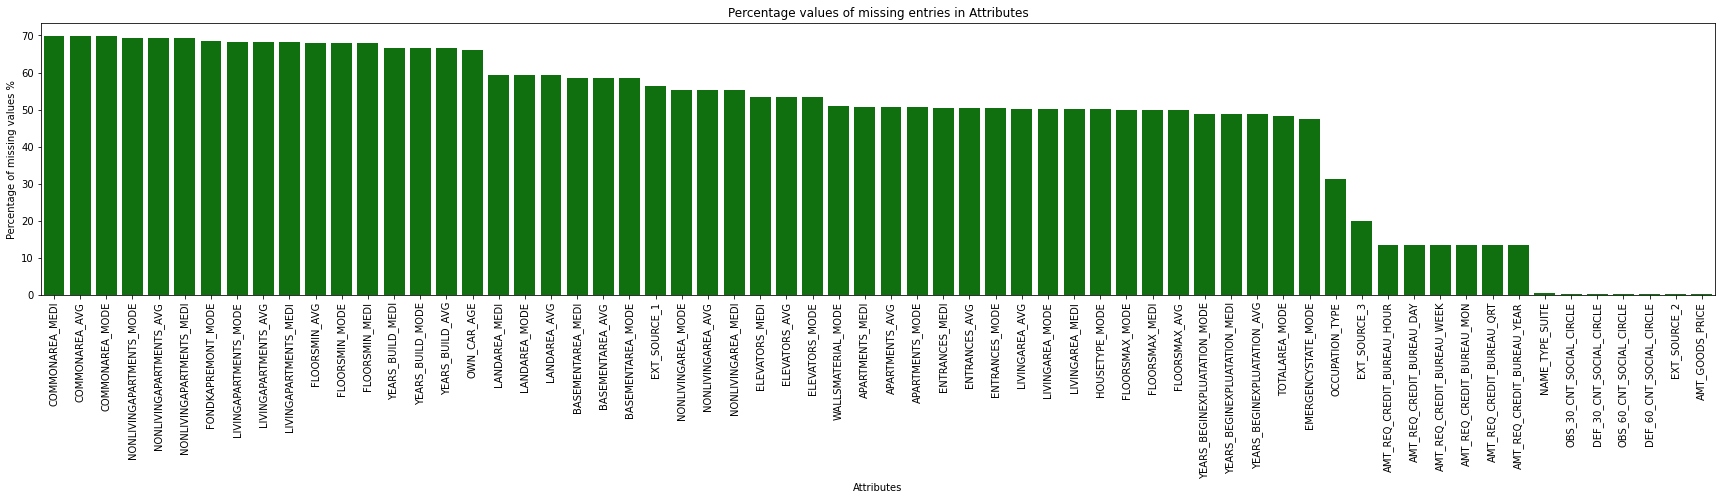

In [61]:
plt.figure(figsize = (30, 5))
sns.barplot(x='Attributes',y='Percent',data=missing_application_train_data[missing_application_train_data.Percent>0], palette = ['green'])
plt.xlabel('Attributes');
plt.ylabel('Percentage of missing values %');
plt.title('Percentage values of missing entries in Attributes');
plt.xticks(rotation=90);
plt.show()

## Test missing count on Testing Data( in percentage)

In [24]:
null_data_percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing_data = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_app_train_data  = pd.concat([null_data_percent, sum_missing_data], axis=1, keys=['Percent', "Test Missing Count"])
missing_app_train_data

Percent  Test Missing Count
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
COMMONAREA_MEDI             68.72               33495
NONLIVINGAPARTMENTS_AVG     68.41               33347
NONLIVINGAPARTMENTS_MODE    68.41               33347
...                           ...                 ...
NAME_HOUSING_TYPE            0.00                   0
NAME_FAMILY_STATUS           0.00                   0
NAME_EDUCATION_TYPE          0.00                   0
NAME_INCOME_TYPE             0.00                   0
SK_ID_CURR                   0.00                   0

[121 rows x 2 columns]

## Visualizing the categorical columns to understand the data more efficiently


In [ ]:
def col(cat):
    plt.figure(figsize=(10,10))
    plt.title("Loan Default with respect to "+cat,fontweight='bold' , fontsize =16)
    sns.countplot(x=df[cat],hue='TARGET',data=df, palette = 'Blues')
    df = df[(df['col'] < -0.25) | (df['col'] > 0.25)]
    plt.xticks(rotation=90)


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


Text(0.5, 1.0, 'Percentage of loan with reference to gender')

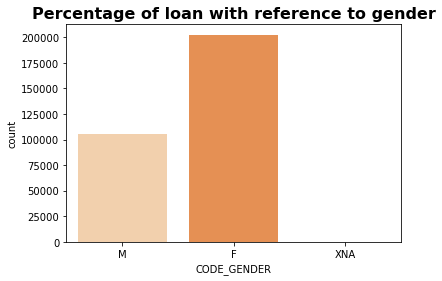

In [ ]:
print(datasets["application_train"]['CODE_GENDER'].value_counts())
sns.countplot(datasets["application_train"]['CODE_GENDER'], palette = 'Oranges')
plt.title("Percentage of loan with reference to gender", fontweight = 'bold', fontsize = 16)


The number of female borrowing the loan and who haven't paid is comparatively higher than men.

## Plot based on Target

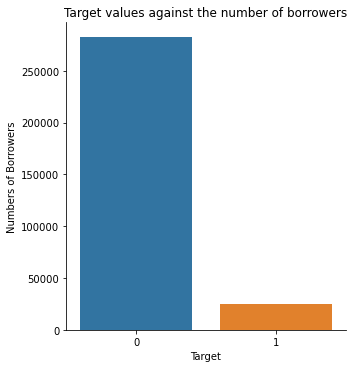

In [25]:
sns.catplot(data = datasets["application_train"], x='TARGET', kind = 'count')
plt.xlabel('Target');
plt.ylabel('Numbers of Borrowers');
plt.title('Target values against the number of borrowers');
plt.show()

Many people would rather take out a cash loan than a revolving loan.

## Distribution of the target column 

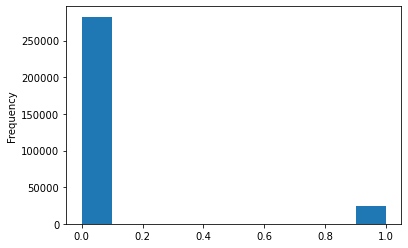

In [47]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

## Plot on Amount of Credit

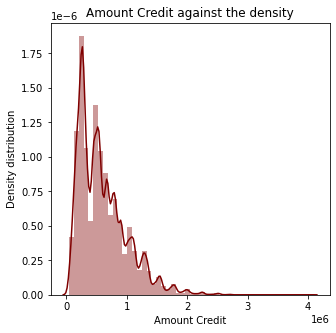

In [19]:
plt.figure(figsize = (5, 5))
sns.distplot(datasets["application_train"].AMT_CREDIT, color = 'maroon')
plt.xlabel('Amount Credit');
plt.ylabel('Density distribution');
plt.title('Amount Credit against the density');

plt.show()

## Exploration of Income total

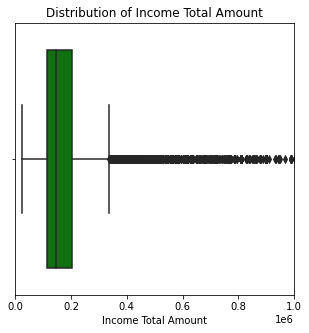

In [37]:
plt.figure(figsize = (5, 5))
sns.boxplot(data = datasets["application_train"], x = 'AMT_INCOME_TOTAL', color = 'green')
plt.xlim(0,1000000)
plt.xlabel('Income Total Amount'); 
plt.title('Distribution of Income Total Amount');
plt.show()


## Target vs borrowers based on income types

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'State servant'),
  Text(1, 0, 'Working'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Businessman'),
  Text(7, 0, 'Maternity leave')])

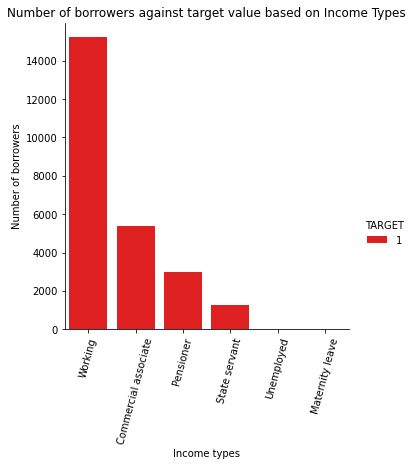

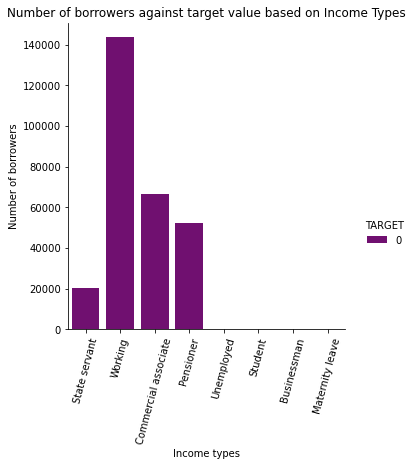

In [45]:
sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==1],x='NAME_INCOME_TYPE',kind='count',hue="TARGET", palette = ['red'])
plt.xlabel('Income types')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Income Types')
plt.xticks(rotation=75)

sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==0],x='NAME_INCOME_TYPE',kind='count',hue="TARGET", palette = ['purple'])
plt.xlabel('Income types')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Income Types')
plt.xticks(rotation=75)

## Plot based on Gender

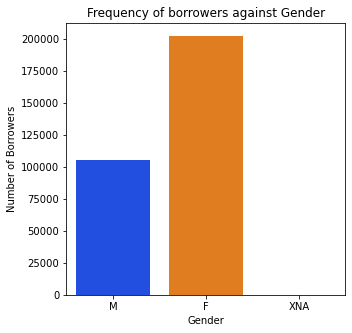

In [20]:
plt.figure(figsize = (5, 5))
sns.countplot(datasets["application_train"].CODE_GENDER, palette=sns.color_palette('bright')[:2])
plt.xlabel('Gender');
plt.ylabel('Number of Borrowers');
plt.title('Frequency of borrowers against Gender');

plt.show()

## Target vs borrowers based on gender

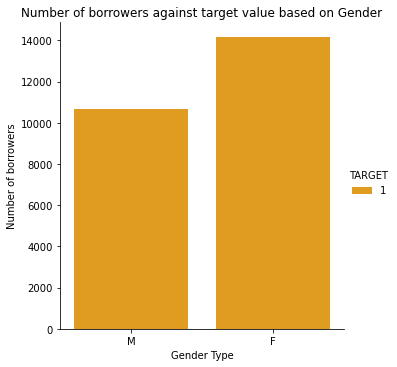

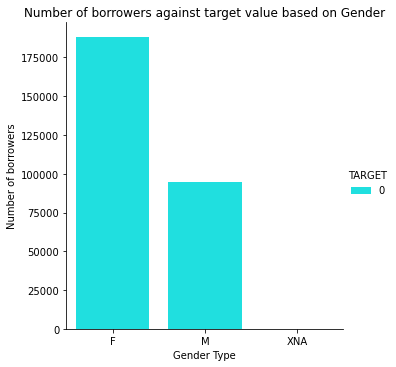

In [43]:
sns.catplot(data=datasets["application_train"][application_train.TARGET==1],x='CODE_GENDER',kind='count',hue="TARGET",palette = ['orange']);
plt.xlabel('Gender Type')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Gender')

sns.catplot(data=datasets["application_train"][application_train.TARGET==0],x='CODE_GENDER',kind='count',hue="TARGET",palette = ['cyan']);
plt.xlabel('Gender Type')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Gender')
plt.show()

It is observed that the more number of females are the defaulters but it is also observed that there is high difference between number of males and females during sampling. Hence, Based on the given data females are more defaulters.

## Applicants Age 

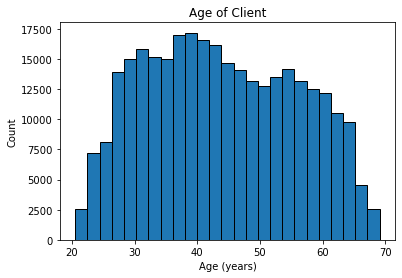

In [48]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

## Applicants occupations

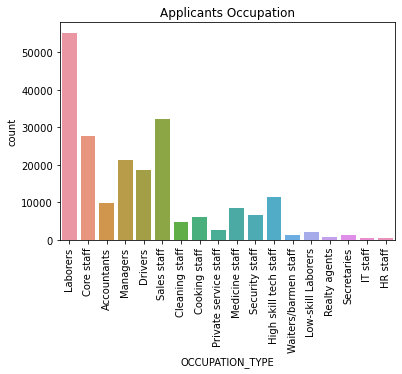

In [49]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

## Marital status of client

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


Text(0.5, 1.0, 'Family Status vs Count')

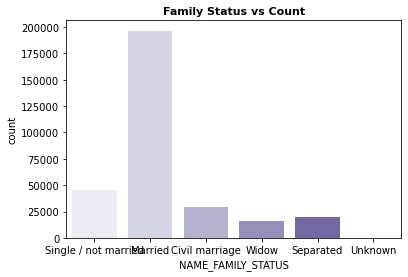

In [ ]:
print(datasets["application_train"]['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(datasets["application_train"]['NAME_FAMILY_STATUS'], palette = 'Purples')
plt.title("Family Status vs Count", fontweight = 'bold', fontsize = 11)


The bulk of clients who are married have paid the smallest loan amount, while the number of clients with an uncertain status is insignificant.

## Target vs borrowers based on their children

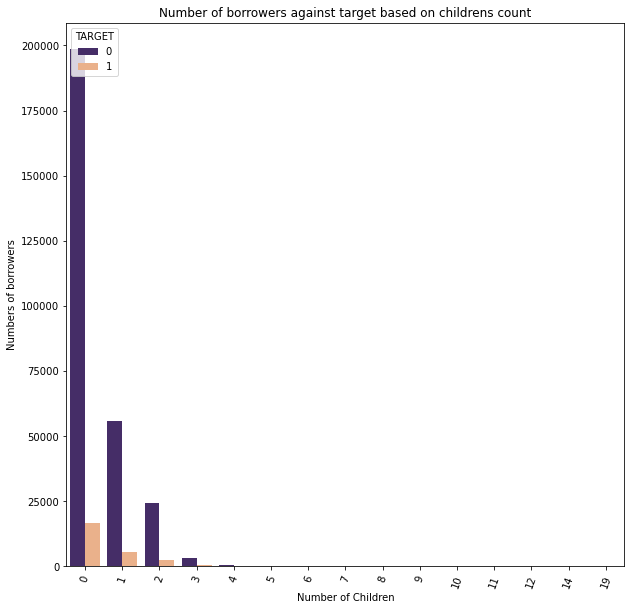

In [38]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(x='CNT_CHILDREN', hue = 'TARGET',data=datasets["application_train"], palette=['#432371',"#FAAE7B"])
plt.xlabel("Number of Children")
plt.ylabel('Numbers of borrowers')
plt.title('Number of borrowers against target based on childrens count');
plt.xticks(rotation=70)
plt.show()

It is observed that people with no children have a difficult time of paying their borrowed loan. It is also observed that as the number of children increase, the number of defaulters reduce.

## Target vs borrowers based on Marital Status

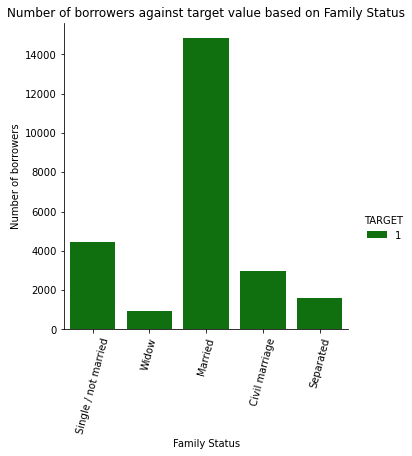

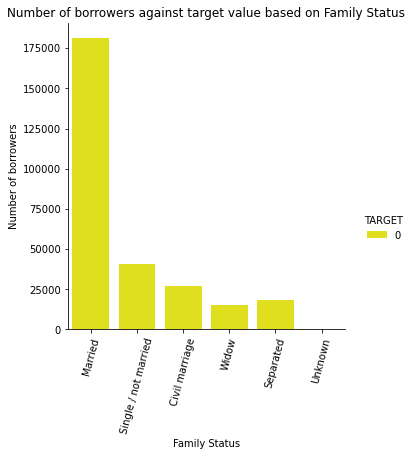

In [44]:
sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==1],x='NAME_FAMILY_STATUS',kind='count',hue="TARGET",palette = ['green'])
plt.xlabel('Family Status')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Family Status')
plt.xticks(rotation=75)

sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==0],x='NAME_FAMILY_STATUS',kind='count',hue="TARGET", palette = ['yellow'])
plt.xlabel('Family Status')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Family Status')
plt.xticks(rotation=75)
plt.show()

It is observed that the more number of married are the defaulters but it is also observed that there is high difference between number of married samples and the other types . Hence, Based on the given data married people are more defaulters.

## Percentage of clients who owns a car

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


Text(0.5, 1.0, 'Percentage of car owners in the dataset')

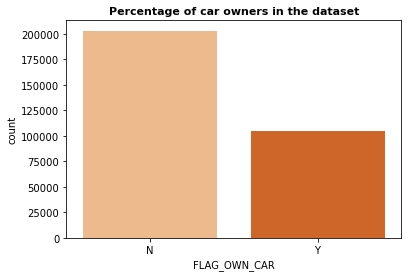

In [ ]:
print(datasets["application_train"]['FLAG_OWN_CAR'].value_counts())
sns.countplot(datasets["application_train"]['FLAG_OWN_CAR'], palette = 'Oranges')
plt.title("Percentage of car owners in the dataset", fontweight = 'bold', fontsize = 11)


About half of the population own a car, but the majority of clients (more than half) do not, and the majority of them are likely to have defaulted on their loan.

## Target vs borrowers age group based on their failure rate to repay

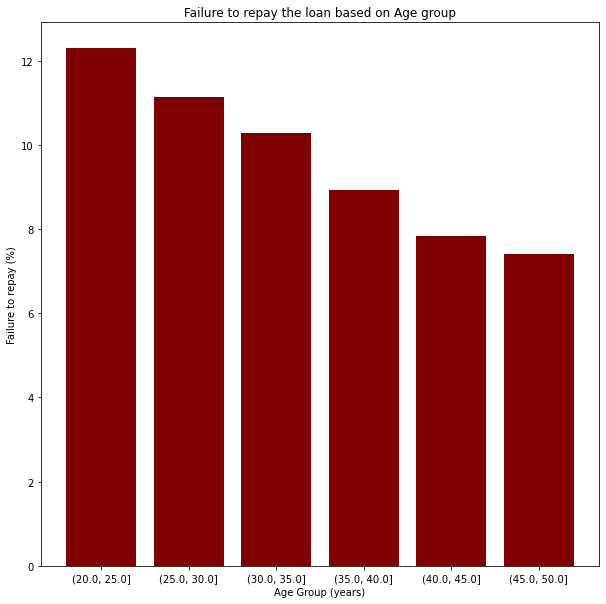

In [46]:
years=datasets["application_train"][['TARGET','DAYS_BIRTH']]
years['YEARS_BIRTH']=years['DAYS_BIRTH']/-365
years['group']=pd.cut(years['YEARS_BIRTH'],bins=np.linspace(0,50,num=11))
age_groups = years.groupby('group').mean()
age_groups

plt.figure(figsize=(10,10))
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'], color = 'Maroon')
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to repay (%)')
plt.title('Failure to repay the loan based on Age group')
plt.show()

It is observed that the age group of 20 to 25 are more prone to failure to repay their loan.

## Educational Background of the Clients

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Secondary / secondary special'),
  Text(1, 0, 'Higher education'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

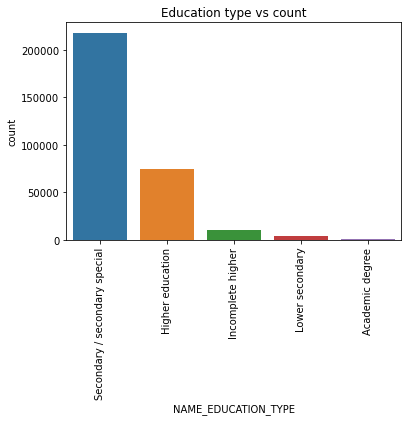

In [ ]:
print(datasets["application_train"]['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(datasets["application_train"]['NAME_EDUCATION_TYPE'])
plt.title("Education type vs count")
plt.xticks(rotation=90)





 Clients with Academic Degree are more likely to repay the loan compared to others.

It is observed that people with Secondary/ Secondary degree are usually the defaulters followed by Higher education degree holders.

## House type of the Clients

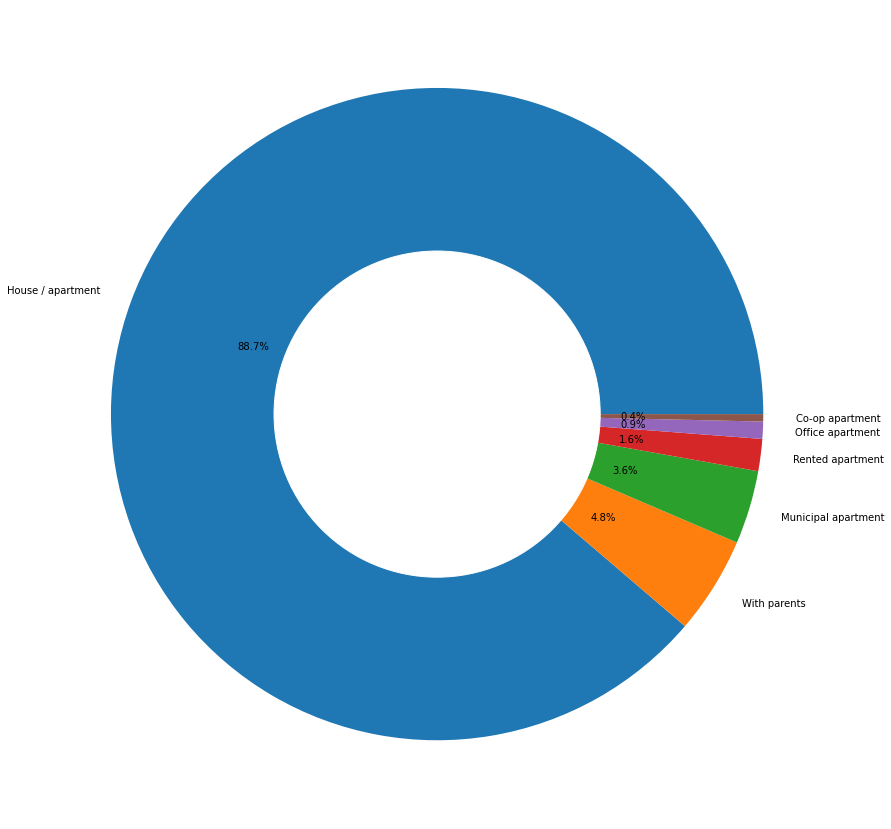

In [ ]:
plt.figure(figsize=[20,15])
plt.pie(datasets["application_train"]['NAME_HOUSING_TYPE'].value_counts(),labels = datasets["application_train"]['NAME_HOUSING_TYPE'].value_counts().index,autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



We can see from the graph above that the bulk of the clients who live in apartments/houses have not paid their loans, while the number of clients who live in office apartments and co-op apartments is minimal.

## Target vs borrowers based on housing type

In [92]:
Housing_type1 = datasets["application_train"][datasets["application_train"].NAME_HOUSING_TYPE=='Co-op apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type1['NAME_HOUSING_TYPE'] = 'Co-op apartment'
Housing_type2 = datasets["application_train"][datasets["application_train"].NAME_HOUSING_TYPE=='Office apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type2['NAME_HOUSING_TYPE'] = 'Office apartment'
Housing_type3 = datasets["application_train"][datasets["application_train"].NAME_HOUSING_TYPE=='Rented apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type3['NAME_HOUSING_TYPE'] = 'Rented apartment'
Housing_type4 = datasets["application_train"][datasets["application_train"].NAME_HOUSING_TYPE=='Municipal apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type4['NAME_HOUSING_TYPE'] = 'Municipal apartment'
Housing_type5 = datasets["application_train"][datasets["application_train"].NAME_HOUSING_TYPE=='With parents']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type5['NAME_HOUSING_TYPE'] = 'With parents'
Housing_type6 = datasets["application_train"][datasets["application_train"].NAME_HOUSING_TYPE=='House / apartment']['TARGET'].value_counts().reset_index().rename(columns={'TARGET':'Borrowers_count','index':'TARGET'})
Housing_type6['NAME_HOUSING_TYPE'] = 'House / apartment'

HousingTypes = Housing_type1.append(Housing_type2, ignore_index=True,sort=False)
HousingTypes = HousingTypes.append(Housing_type3, ignore_index=True,sort=False)
HousingTypes = HousingTypes.append(Housing_type4, ignore_index=True,sort=False)
HousingTypes = HousingTypes.append(Housing_type5, ignore_index=True,sort=False)
HousingTypes = HousingTypes.append(Housing_type6, ignore_index=True,sort=False)
HousingTypes

TARGET  Borrowers_count    NAME_HOUSING_TYPE
0        0             1033      Co-op apartment
1        1               89      Co-op apartment
2        0             2445     Office apartment
3        1              172     Office apartment
4        0             4280     Rented apartment
5        1              601     Rented apartment
6        0            10228  Municipal apartment
7        1              955  Municipal apartment
8        0            13104         With parents
9        1             1736         With parents
10       0           251596    House / apartment
11       1            21272    House / apartment

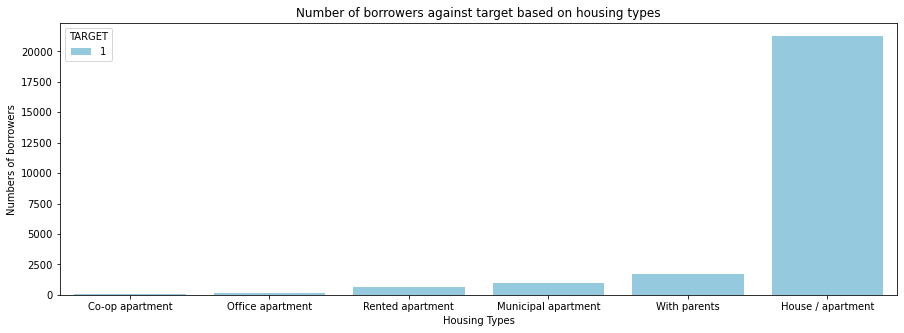

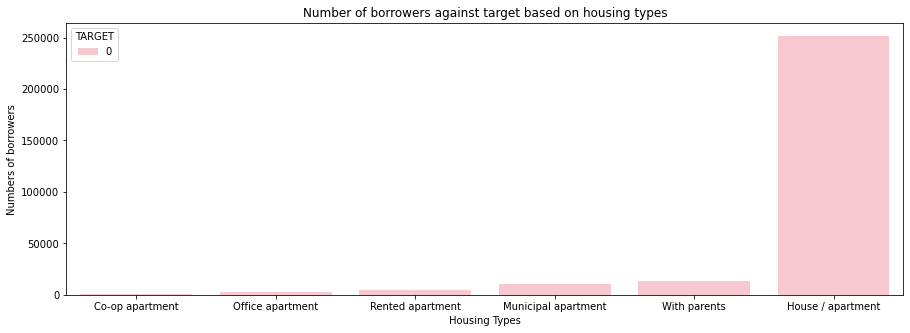

In [50]:
plt.figure(figsize = (15, 5))
sns.barplot(x='NAME_HOUSING_TYPE',y='Borrowers_count',hue = 'TARGET',data=HousingTypes[HousingTypes['TARGET']==1], palette = ['skyblue'])
plt.xlabel("Housing Types")
plt.ylabel('Numbers of borrowers')
plt.title('Number of borrowers against target based on housing types');
plt.show()

plt.figure(figsize = (15, 5))
sns.barplot(x='NAME_HOUSING_TYPE',y='Borrowers_count',hue = 'TARGET',data=HousingTypes[HousingTypes['TARGET']==0], palette = ['pink'] )
plt.xlabel("Housing Types")
plt.ylabel('Numbers of borrowers')
plt.title('Number of borrowers against target based on housing types');
plt.show()

It is observed that the people with House/Apartment fails to repay their borrowed loan.

## Loan Types Available

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


Text(0.5, 1.0, 'Types of loan available')

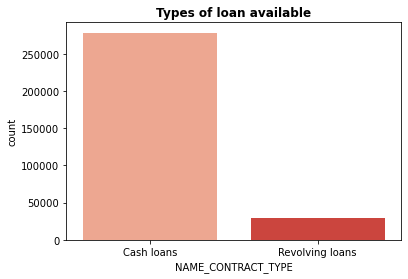

In [ ]:
print(datasets["application_train"]['NAME_CONTRACT_TYPE'].value_counts())
sns.countplot(datasets["application_train"]['NAME_CONTRACT_TYPE'], palette = 'Reds')
plt.title("Types of loan available", fontweight = 'bold', fontsize = 12)


## Borrowers loan type based on occupation

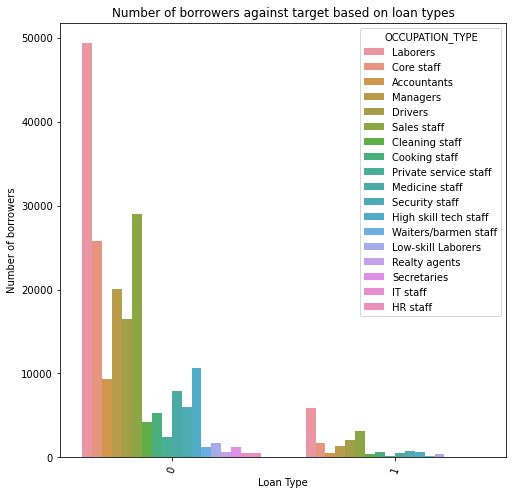

In [51]:
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(x='TARGET', hue = 'OCCUPATION_TYPE',data=datasets["application_train"])
plt.xlabel("Loan Type")
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target based on loan types')
plt.xticks(rotation=70)
plt.show()

The above graph depicts the multiple kinds of occupation types and what type of loan (Cash loan/revolving loan) they have taken.

## Target vs borrowers based on income and credit ( in ratio )

In [94]:
Income_credit = datasets["application_train"][['AMT_INCOME_TOTAL','AMT_CREDIT','TARGET']]
Income_credit['Ratio'] = (Income_credit['AMT_INCOME_TOTAL']/Income_credit['AMT_CREDIT'])
Income_credit

AMT_INCOME_TOTAL  AMT_CREDIT  TARGET     Ratio
0               202500.0    406597.5       1  0.498036
1               270000.0   1293502.5       0  0.208736
2                67500.0    135000.0       0  0.500000
3               135000.0    312682.5       0  0.431748
4               121500.0    513000.0       0  0.236842
...                  ...         ...     ...       ...
307506          157500.0    254700.0       0  0.618375
307507           72000.0    269550.0       0  0.267112
307508          153000.0    677664.0       0  0.225776
307509          171000.0    370107.0       1  0.462029
307510          157500.0    675000.0       0  0.233333

[307511 rows x 4 columns]

## Count of borrowers based on income credit ( in ratio )

In [53]:
import numpy as np
def count_bins(df):
    count_dict={}
    for i in range(len(df)):
        
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.1 and df["Ratio"].iloc[i]>=0):
            if(0 in count_dict):
                count_dict[0]+=1
            else:
                count_dict[0]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.2 and df["Ratio"].iloc[i]>=0.1):
            if(0 in count_dict):
                count_dict[1]+=1
            else:
                count_dict[1]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.3 and df["Ratio"].iloc[i]>=0.2):
            if(0 in count_dict):
                count_dict[2]+=1
            else:
                count_dict[2]=1
                
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.4 and df["Ratio"].iloc[i]>=0.3):
            if(0 in count_dict):
                count_dict[3]+=1
            else:
                count_dict[3]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.5 and df["Ratio"].iloc[i]>=0.4):
            if(0 in count_dict):
                count_dict[4]+=1
            else:
                count_dict[4]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.6 and df["Ratio"].iloc[i]>=0.5):
            if(0 in count_dict):
                count_dict[5]+=1
            else:
                count_dict[5]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.7 and df["Ratio"].iloc[i]>=0.6):
            if(0 in count_dict):
                count_dict[6]+=1
            else:
                count_dict[6]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.8 and df["Ratio"].iloc[i]>=0.7):
            if(0 in count_dict):
                count_dict[7]+=1
            else:
                count_dict[7]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.9 and df["Ratio"].iloc[i]>=0.8):
            if(0 in count_dict):
                count_dict[8]+=1
            else:
                count_dict[8]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<=1.0 and df["Ratio"].iloc[i]>=0.9):
            if(0 in count_dict):
                count_dict[9]+=1
            else:
                count_dict[9]=1
    return count_dict

In [54]:
ff = count_bins(Income_credit)

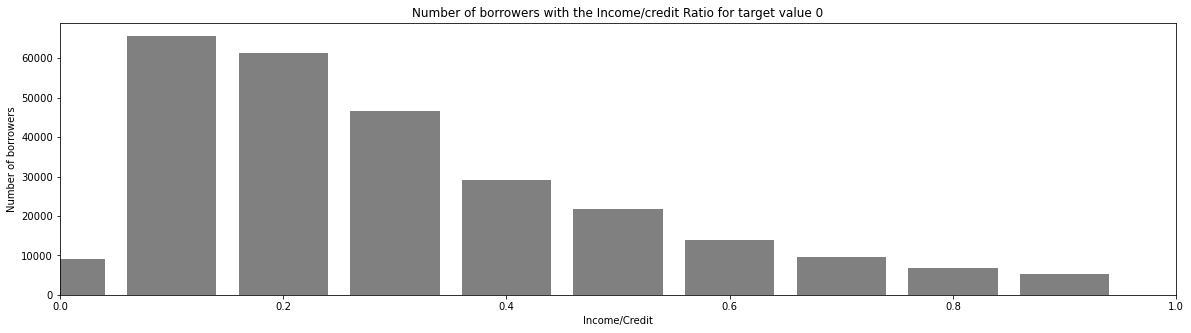

In [55]:
ratios = list(ff.keys())
count = list(ff.values())
AMT_INCOME_TOTAL_AMT_CREDIT = []
for i in ratios:
    AMT_INCOME_TOTAL_AMT_CREDIT.append(i / 10)
fig = plt.figure(figsize = (20, 5))
 
plt.bar(AMT_INCOME_TOTAL_AMT_CREDIT, count, color ='grey',width=0.08)
plt.xlim(0,1,0.1)
plt.xlabel("Income/Credit")
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers with the Income/credit Ratio for target value 0');
plt.show()

It is observed that the income of the borrower is 10% of their income in most of the samples.

## Correlation with  the target column 

In [27]:
corr_app_train = datasets["application_train"].corr()['TARGET'].sort_values()
corr_app_train = corr_app_train.reset_index().rename(columns={'index':'Attributes','TARGET':'Correlation'})
corr_app_train

Attributes  Correlation
0                   EXT_SOURCE_3    -0.178919
1                   EXT_SOURCE_2    -0.160472
2                   EXT_SOURCE_1    -0.155317
3                  DAYS_EMPLOYED    -0.044932
4                  FLOORSMAX_AVG    -0.044003
..                           ...          ...
101       DAYS_LAST_PHONE_CHANGE     0.055218
102         REGION_RATING_CLIENT     0.058899
103  REGION_RATING_CLIENT_W_CITY     0.060893
104                   DAYS_BIRTH     0.078239
105                       TARGET     1.000000

[106 rows x 2 columns]

In [28]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


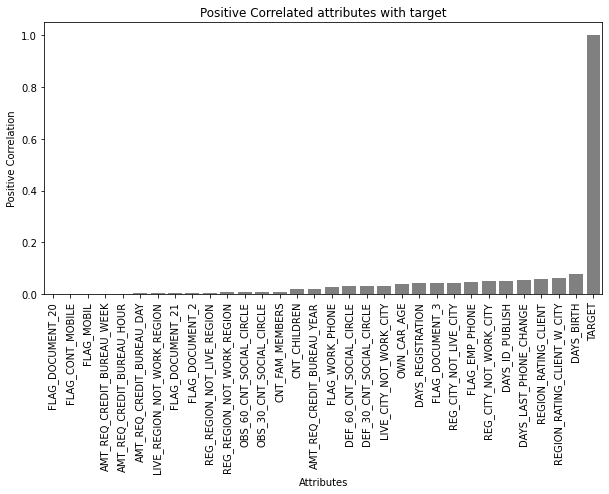

In [31]:
plt.figure(figsize = (10, 5))
sns.barplot(x='Attributes',y='Correlation',data= corr_app_train[corr_app_train.Correlation>0], palette = ['grey'])
plt.xlabel('Attributes')
plt.ylabel('Positive Correlation')
plt.title('Positive Correlated attributes with target')
plt.xticks(rotation=90)
plt.show()

The above graph depicts the column features which are Positively correlated based on target.

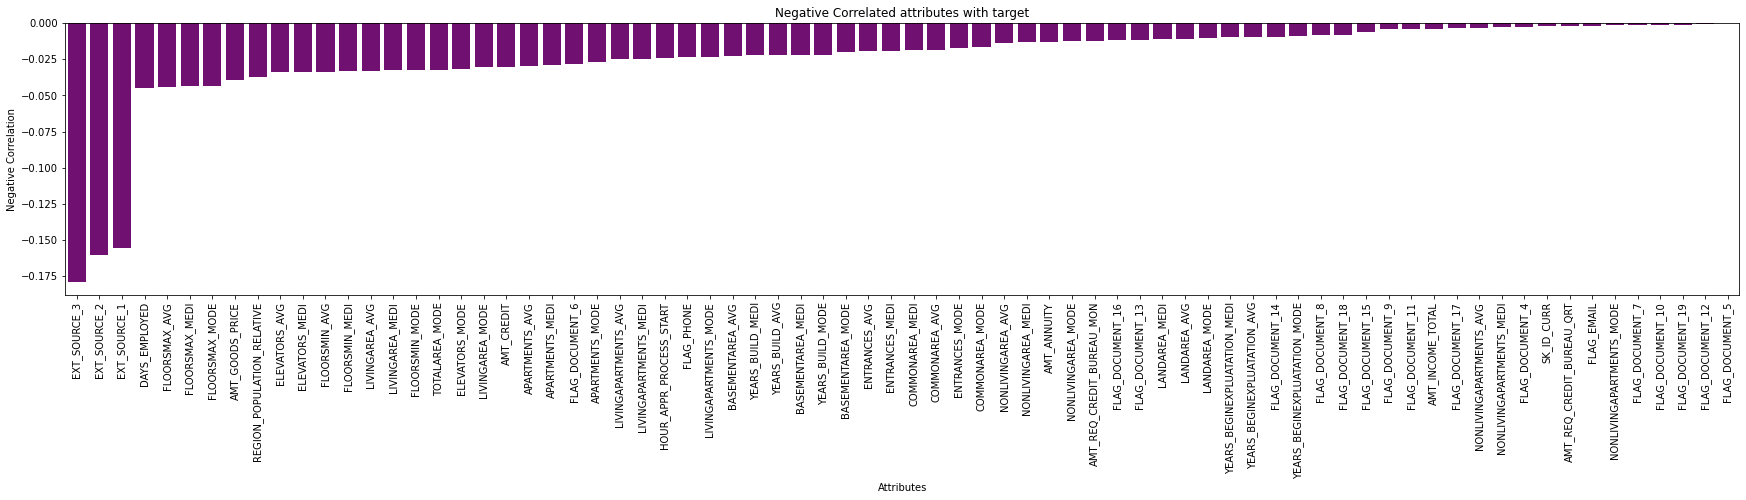

In [33]:
plt.figure(figsize = (30, 5))
sns.barplot(x='Attributes',y='Correlation',data= corr_app_train[corr_app_train.Correlation<=0], palette = ['purple'])
plt.xlabel('Attributes')
plt.ylabel('Negative Correlation')
plt.title('Negative Correlated attributes with target')
plt.xticks(rotation=90)
plt.show()

The above graph depicts the column features which are Negatively correlated based on target.

In [6]:
from pandas.plotting import scatter_matrix
#We can take the top 10 features
top_corr_features = ["TARGET", "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE",
               "DAYS_BIRTH", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_ID_PUBLISH","REG_CITY_NOT_WORK_CITY"]
# scatter_matrix(datasets["application_train"][top_corr_features], figsize=(12, 8));
df = datasets["application_train"].copy()
df2 = df[top_corr_features]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)


In [7]:
corelations = datasets["application_train"].corr()['TARGET'].sort_values()
high_corelation = corelations.tail(15)
low_corelations =  corelations.head(15)

print('most positive corelations:\n', high_corelation)
print('most negative corelations:\n', low_corelations)

most positive corelations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
most negative corelations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REG

Text(0.5, 1.0, 'Correlation Heatmap for features with highest correlations with target variables')

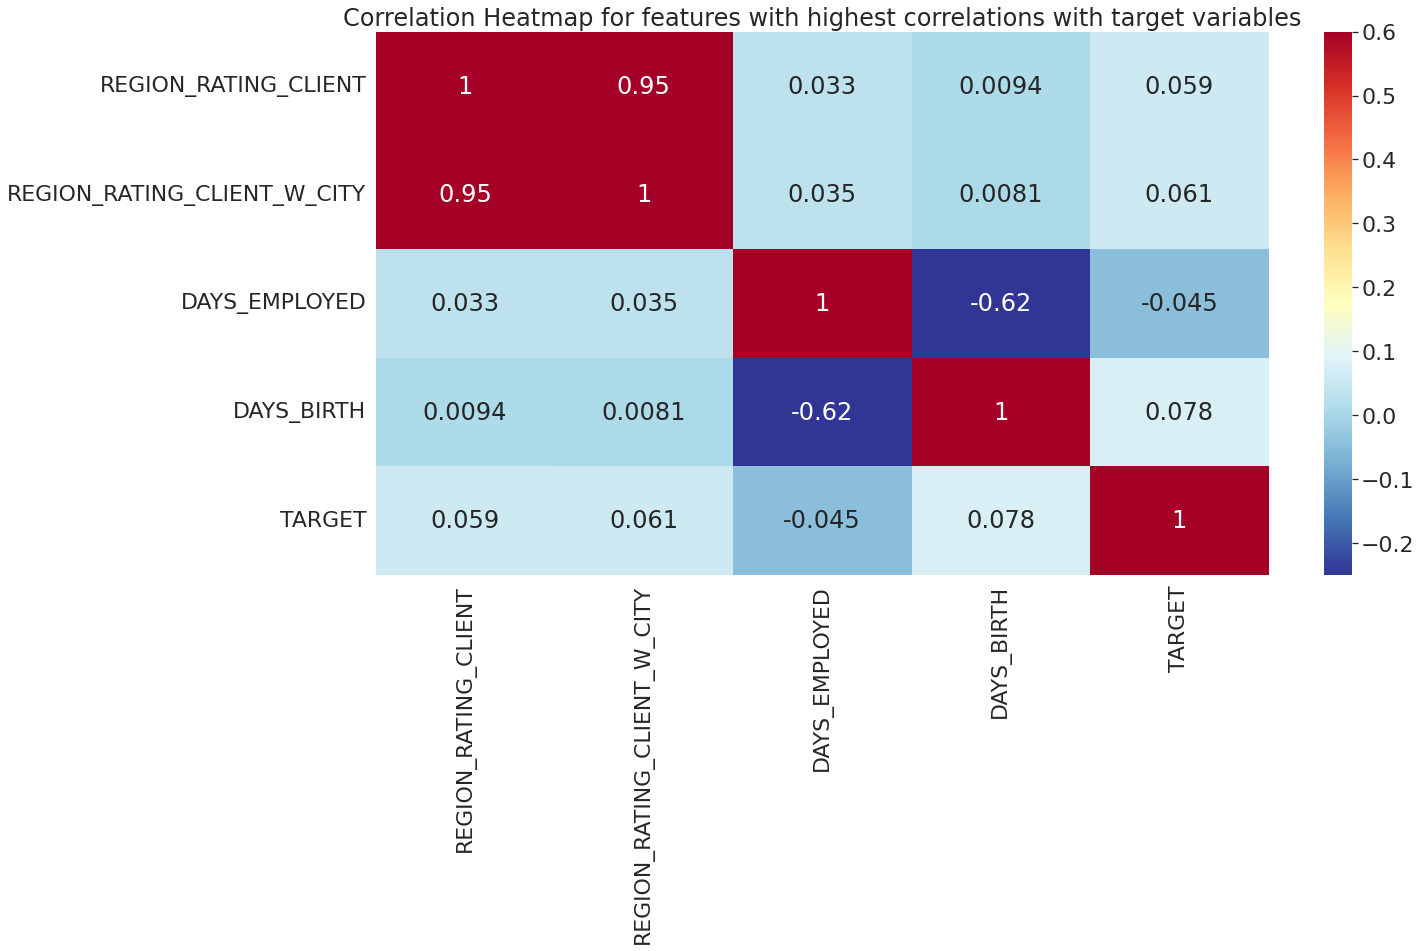

In [8]:
most_corr=datasets["application_train"][['REGION_RATING_CLIENT',
                      'REGION_RATING_CLIENT_W_CITY','DAYS_EMPLOYED','DAYS_BIRTH','TARGET']]
most_corr_corr = most_corr.corr()

sns.set_style("dark")
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 1.0})
fig, axes = plt.subplots(figsize = (20,10),sharey=True)
sns.heatmap(most_corr_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,vmax=0.6,annot=True)
plt.title('Correlation Heatmap for features with highest correlations with target variables')


# Modeling and Pipelines

In [1]:
from scipy import stats
#import latexify
import time
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
import json
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.svm import SVC
import warnings
from pprint import pprint
warnings.filterwarnings('ignore')

In [2]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
DATA_DIR="Data/home-credit-default-risk"
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

In [3]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [5]:
%%time
# Define the list of dataset names to load
ds_names = ["application_train", "application_test", "bureau", "bureau_balance",
            "credit_card_balance", "installments_payments", "previous_application",
            "POS_CASH_balance"]

# Load each dataset and add it to the `datasets` dictionary
start_time = time.time()
for ds_name in ds_names:
    ds_path = os.path.join(DATA_DIR, f"{ds_name}.csv")
    dataset = load_data(ds_path, ds_name)
    datasets[ds_name] = dataset
    
    print(f"{ds_name} dataset loaded successfully!")
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Data loading completed in {elapsed_time:.2f} seconds.")

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_train dataset loaded successfully!
application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

application_test dataset loaded successfully!
bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau dataset loaded successfully!
bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

bureau_balance dataset loaded successfully!
credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OT

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

credit_card_balance dataset loaded successfully!
installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

installments_payments dataset loaded successfully!
previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

previous_application dataset loaded successfully!
POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

POS_CASH_balance dataset loaded successfully!
Data loading completed in 32.30 seconds.
CPU times: user 25.1 s, sys: 5.69 s, total: 30.8 s
Wall time: 32.3 s


In [6]:
for ds_name in datasets.keys():
    shape_str = f"[ {datasets[ds_name].shape[0]:,}, {datasets[ds_name].shape[1]}]"
    print(f"Dataset {ds_name:24}: {shape_str}")

Dataset application_train       : [ 307,511, 122]
Dataset application_test        : [ 48,744, 121]
Dataset bureau                  : [ 1,716,428, 17]
Dataset bureau_balance          : [ 27,299,925, 3]
Dataset credit_card_balance     : [ 3,840,312, 23]
Dataset installments_payments   : [ 13,605,401, 8]
Dataset previous_application    : [ 1,670,214, 37]
Dataset POS_CASH_balance        : [ 10,001,358, 8]


In [7]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
datasets["application_train"].describe().T #numerical only features

count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295       0.0   

                                 25%       50%       75%          max  
SK_ID_CURR                  189145.5  278202.0  367142.5     456255.0  
TARGET                           0.0       0.0       0.0          1.0  
CNT_CHILDREN                     0.0       0.0       1.0         19.0  
AMT_INCOME_TOTAL            112500.0  147150.0  202500.0  117000000.0  
AMT_CREDIT                  270000.0  513531.0  808650.0    4050000.0  
...                              ...       ...       ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       0.0          9.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0        261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0         25.0  

[106 rows x 8 columns]

In [9]:
datasets["application_test"].describe().T #numerical only features

count           mean            std       min  \
SK_ID_CURR                  48744.0  277796.676350  103169.547296  100001.0   
CNT_CHILDREN                48744.0       0.397054       0.709047       0.0   
AMT_INCOME_TOTAL            48744.0  178431.805855  101522.591536   26941.5   
AMT_CREDIT                  48744.0  516740.435561  365397.004174   45000.0   
AMT_ANNUITY                 48720.0   29426.240209   16016.368315    2295.0   
...                             ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   42695.0       0.001803       0.046132       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  42695.0       0.002787       0.054037       0.0   
AMT_REQ_CREDIT_BUREAU_MON   42695.0       0.009299       0.110924       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   42695.0       0.546902       0.693305       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  42695.0       1.983769       1.838873       0.0   

                                  25%       50%       75%        max  
SK_ID_CURR                  188557.75  277549.0  367555.5   456250.0  
CNT_CHILDREN                     0.00       0.0       1.0       20.0  
AMT_INCOME_TOTAL            112500.00  157500.0  225000.0  4410000.0  
AMT_CREDIT                  260640.00  450000.0  675000.0  2245500.0  
AMT_ANNUITY                  17973.00   26199.0   37390.5   180576.0  
...                               ...       ...       ...        ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.00       0.0       0.0        2.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.00       0.0       0.0        2.0  
AMT_REQ_CREDIT_BUREAU_MON        0.00       0.0       0.0        6.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.00       0.0       1.0        7.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.00       2.0       3.0       17.0  

[105 rows x 8 columns]

In [10]:
datasets["application_train"].describe(include='all').T #look at all categorical and numerical

count unique         top    freq  \
SK_ID_CURR                  307511.0    NaN         NaN     NaN   
TARGET                      307511.0    NaN         NaN     NaN   
NAME_CONTRACT_TYPE            307511      2  Cash loans  278232   
CODE_GENDER                   307511      3           F  202448   
FLAG_OWN_CAR                  307511      2           N  202924   
...                              ...    ...         ...     ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0    NaN         NaN     NaN   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0    NaN         NaN     NaN   
AMT_REQ_CREDIT_BUREAU_MON   265992.0    NaN         NaN     NaN   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0    NaN         NaN     NaN   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0    NaN         NaN     NaN   

                                     mean            std       min       25%  \
SK_ID_CURR                  278180.518577  102790.175348  100002.0  189145.5   
TARGET                           0.080729       0.272419       0.0       0.0   
NAME_CONTRACT_TYPE                    NaN            NaN       NaN       NaN   
CODE_GENDER                           NaN            NaN       NaN       NaN   
FLAG_OWN_CAR                          NaN            NaN       NaN       NaN   
...                                   ...            ...       ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.007       0.110757       0.0       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK       0.034362       0.204685       0.0       0.0   
AMT_REQ_CREDIT_BUREAU_MON        0.267395       0.916002       0.0       0.0   
AMT_REQ_CREDIT_BUREAU_QRT        0.265474       0.794056       0.0       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR       1.899974       1.869295       0.0       0.0   

                                 50%       75%       max  
SK_ID_CURR                  278202.0  367142.5  456255.0  
TARGET                           0.0       0.0       1.0  
NAME_CONTRACT_TYPE               NaN       NaN       NaN  
CODE_GENDER                      NaN       NaN       NaN  
FLAG_OWN_CAR                     NaN       NaN       NaN  
...                              ...       ...       ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       9.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0      27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0     261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       1.0       3.0      25.0  

[122 rows x 11 columns]

In [11]:
application_train = datasets['application_train']
application_train.dtypes 

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [12]:
application_train.duplicated().sum().T

0

In [13]:
application_train.isnull().T

0       1       2       3       4       5       \
SK_ID_CURR                   False   False   False   False   False   False   
TARGET                       False   False   False   False   False   False   
NAME_CONTRACT_TYPE           False   False   False   False   False   False   
CODE_GENDER                  False   False   False   False   False   False   
FLAG_OWN_CAR                 False   False   False   False   False   False   
...                            ...     ...     ...     ...     ...     ...   
AMT_REQ_CREDIT_BUREAU_DAY    False   False   False    True   False   False   
AMT_REQ_CREDIT_BUREAU_WEEK   False   False   False    True   False   False   
AMT_REQ_CREDIT_BUREAU_MON    False   False   False    True   False   False   
AMT_REQ_CREDIT_BUREAU_QRT    False   False   False    True   False   False   
AMT_REQ_CREDIT_BUREAU_YEAR   False   False   False    True   False   False   

                            6       7       8       9       ...  307501  \
SK_ID_CURR                   False   False   False   False  ...   False   
TARGET                       False   False   False   False  ...   False   
NAME_CONTRACT_TYPE           False   False   False   False  ...   False   
CODE_GENDER                  False   False   False   False  ...   False   
FLAG_OWN_CAR                 False   False   False   False  ...   False   
...                            ...     ...     ...     ...  ...     ...   
AMT_REQ_CREDIT_BUREAU_DAY    False   False   False    True  ...    True   
AMT_REQ_CREDIT_BUREAU_WEEK   False   False   False    True  ...    True   
AMT_REQ_CREDIT_BUREAU_MON    False   False   False    True  ...    True   
AMT_REQ_CREDIT_BUREAU_QRT    False   False   False    True  ...    True   
AMT_REQ_CREDIT_BUREAU_YEAR   False   False   False    True  ...    True   

                            307502  307503  307504  307505  307506  307507  \
SK_ID_CURR                   False   False   False   False   False   False   
TARGET                       False   False   False   False   False   False   
NAME_CONTRACT_TYPE           False   False   False   False   False   False   
CODE_GENDER                  False   False   False   False   False   False   
FLAG_OWN_CAR                 False   False   False   False   False   False   
...                            ...     ...     ...     ...     ...     ...   
AMT_REQ_CREDIT_BUREAU_DAY    False   False    True   False    True    True   
AMT_REQ_CREDIT_BUREAU_WEEK   False   False    True   False    True    True   
AMT_REQ_CREDIT_BUREAU_MON    False   False    True   False    True    True   
AMT_REQ_CREDIT_BUREAU_QRT    False   False    True   False    True    True   
AMT_REQ_CREDIT_BUREAU_YEAR   False   False    True   False    True    True   

                            307508  307509  307510  
SK_ID_CURR                   False   False   False  
TARGET                       False   False   False  
NAME_CONTRACT_TYPE           False   False   False  
CODE_GENDER                  False   False   False  
FLAG_OWN_CAR                 False   False   False  
...                            ...     ...     ...  
AMT_REQ_CREDIT_BUREAU_DAY    False   False   False  
AMT_REQ_CREDIT_BUREAU_WEEK   False   False   False  
AMT_REQ_CREDIT_BUREAU_MON    False   False   False  
AMT_REQ_CREDIT_BUREAU_QRT    False   False   False  
AMT_REQ_CREDIT_BUREAU_YEAR   False   False   False  

[122 rows x 307511 columns]

In [14]:
application_train.isna()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            False   False               False        False         False   
1            False   False               False        False         False   
2            False   False               False        False         False   
3            False   False               False        False         False   
4            False   False               False        False         False   
...            ...     ...                 ...          ...           ...   
307506       False   False               False        False         False   
307507       False   False               False        False         False   
307508       False   False               False        False         False   
307509       False   False               False        False         False   
307510       False   False               False        False         False   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                 False         False             False       False   
1                 False         False             False       False   
2                 False         False             False       False   
3                 False         False             False       False   
4                 False         False             False       False   
...                 ...           ...               ...         ...   
307506            False         False             False       False   
307507            False         False             False       False   
307508            False         False             False       False   
307509            False         False             False       False   
307510            False         False             False       False   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0             False  ...             False             False   
1             False  ...             False             False   
2             False  ...             False             False   
3             False  ...             False             False   
4             False  ...             False             False   
...             ...  ...               ...               ...   
307506        False  ...             False             False   
307507        False  ...             False             False   
307508        False  ...             False             False   
307509        False  ...             False             False   
307510        False  ...             False             False   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                  False             False                       False   
1                  False             False                       False   
2                  False             False                       False   
3                  False             False                        True   
4                  False             False                       False   
...                  ...               ...                         ...   
307506             False             False                        True   
307507             False             False                        True   
307508             False             False                       False   
307509             False             False                       False   
307510             False             False                       False   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                           False                       False   
1                           False                       False   
2                           False                       False   
3                            True                        True   
4                           False                       False   
...                           ...                         ...   
307506                       True                        True   
307507                       True                   

In [15]:
application_train.value_counts

<bound method DataFrame.value_counts of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0

In [16]:
application_train.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485 -0.012462     -0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025 -0.002022     -0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930     -0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                        0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770138   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.002944    0.004238     0.002185   
AMT_REQ_CREDIT_BUREAU_WEEK          0.002387   -0.001275     0.013881   
AMT_REQ_CREDIT_BUREAU_MON           0.024700    0.054451     0.039148   
AMT_REQ_CREDIT_BUREAU_QRT           0.004859    0.015925     0.010124   
AMT_REQ_CREDIT_BUREAU_YEAR          0.011690   -0.048448    -0.011320   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000232                    0.000849   
TARGET                            -0.039645                   -0.037227   
CNT_CHILDREN                      -0.001827                   -0.025573   
AMT_INCOME_TOTAL                   0.159610                    0.074796   
AMT_CREDIT                         0.986968                    0.099738   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004677                    0.001399   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.001007                   -0.002149   
AMT_REQ_CREDIT_BUREAU_MON          0.056422                    0.078607   
AMT_REQ_CREDIT_BUREAU_QRT          0.016432                   -0.001279   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.050998                    0.001003   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                   -0.001500       0.001366  ...          0.000509   
TARGET                        0.078239      -0.044932  ...         -0.007952   
CNT_CHILDREN                  0.330938      -0.239818  ...          0.004031   
AMT_INCOME_TOTAL              0.027261      -0.064223  ...          0.003130   
AMT_CREDIT                   -0.055436      -0.066838  ...          0.034329   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002255       0.000472  ...          0.013281   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.001336       0.003072  ...         -0.004640   
AMT_REQ_CREDIT_BUREAU_MON     0.001372      -0.034457  ...         -0.001565   
AMT_REQ_CREDIT_BUREAU_QRT    -0.011799       0.015345  ...         -0.005125   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.071983       0.049988  ...         -0.047432   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000167          0.001073   
TARGET                             -0.001358          0.000215   
CNT_CHILDREN                        0.000864          0.000988   
AMT_INCOME_TOTAL                    0.002408          0.000242   
AMT_CREDIT                          0.021082          0.031023   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY         

In [17]:
datasets['bureau_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [18]:
datasets['bureau_balance'].describe().T

count          mean            std        min        25%  \
SK_ID_BUREAU    27299925.0  6.036297e+06  492348.856904  5001709.0  5730933.0   
MONTHS_BALANCE  27299925.0 -3.074169e+01      23.864509      -96.0      -46.0   

                      50%        75%        max  
SK_ID_BUREAU    6070821.0  6431951.0  6842888.0  
MONTHS_BALANCE      -25.0      -11.0        0.0

In [19]:
datasets['credit_card_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [20]:
datasets['credit_card_balance'].describe().T

count          mean            std  \
SK_ID_PREV                  3840312.0  1.904504e+06  536469.470563   
SK_ID_CURR                  3840312.0  2.783242e+05  102704.475133   
MONTHS_BALANCE              3840312.0 -3.452192e+01      26.667751   
AMT_BALANCE                 3840312.0  5.830016e+04  106307.031025   
AMT_CREDIT_LIMIT_ACTUAL     3840312.0  1.538080e+05  165145.699523   
AMT_DRAWINGS_ATM_CURRENT    3090496.0  5.961325e+03   28225.688579   
AMT_DRAWINGS_CURRENT        3840312.0  7.433388e+03   33846.077334   
AMT_DRAWINGS_OTHER_CURRENT  3090496.0  2.881696e+02    8201.989345   
AMT_DRAWINGS_POS_CURRENT    3090496.0  2.968805e+03   20796.887047   
AMT_INST_MIN_REGULARITY     3535076.0  3.540204e+03    5600.154122   
AMT_PAYMENT_CURRENT         3072324.0  1.028054e+04   36078.084953   
AMT_PAYMENT_TOTAL_CURRENT   3840312.0  7.588857e+03   32005.987768   
AMT_RECEIVABLE_PRINCIPAL    3840312.0  5.596588e+04  102533.616843   
AMT_RECIVABLE               3840312.0  5.808881e+04  105965.369908   
AMT_TOTAL_RECEIVABLE        3840312.0  5.809829e+04  105971.801103   
CNT_DRAWINGS_ATM_CURRENT    3090496.0  3.094490e-01       1.100401   
CNT_DRAWINGS_CURRENT        3840312.0  7.031439e-01       3.190347   
CNT_DRAWINGS_OTHER_CURRENT  3090496.0  4.812496e-03       0.082639   
CNT_DRAWINGS_POS_CURRENT    3090496.0  5.594791e-01       3.240649   
CNT_INSTALMENT_MATURE_CUM   3535076.0  2.082508e+01      20.051494   
SK_DPD                      3840312.0  9.283667e+00      97.515700   
SK_DPD_DEF                  3840312.0  3.316220e-01      21.479231   

                                    min         25%        50%           75%  \
SK_ID_PREV                  1000018.000  1434385.00  1897122.0  2.369328e+06   
SK_ID_CURR                   100006.000   189517.00   278396.0  3.675800e+05   
MONTHS_BALANCE                  -96.000      -55.00      -28.0 -1.100000e+01   
AMT_BALANCE                 -420250.185        0.00        0.0  8.904669e+04   
AMT_CREDIT_LIMIT_ACTUAL           0.000    45000.00   112500.0  1.800000e+05   
AMT_DRAWINGS_ATM_CURRENT      -6827.310        0.00        0.0  0.000000e+00   
AMT_DRAWINGS_CURRENT          -6211.620        0.00        0.0  0.000000e+00   
AMT_DRAWINGS_OTHER_CURRENT        0.000        0.00        0.0  0.000000e+00   
AMT_DRAWINGS_POS_CURRENT          0.000        0.00        0.0  0.000000e+00   
AMT_INST_MIN_REGULARITY           0.000        0.00        0.0  6.633911e+03   
AMT_PAYMENT_CURRENT               0.000      152.37     2702.7  9.000000e+03   
AMT_PAYMENT_TOTAL_CURRENT         0.000        0.00        0.0  6.750000e+03   
AMT_RECEIVABLE_PRINCIPAL    -423305.820        0.00        0.0  8.535924e+04   
AMT_RECIVABLE               -420250.185        0.00        0.0  8.889949e+04   
AMT_TOTAL_RECEIVABLE        -420250.185        0.00        0.0  8.891451e+04   
CNT_DRAWINGS_ATM_CURRENT          0.000        0.00        0.0  0.000000e+00   
CNT_DRAWINGS_CURRENT              0.000        0.00        0.0  0.000000e+00   
CNT_DRAWINGS_OTHER_CURRENT        0.000        0.00        0.0  0.000000e+00   
CNT_DRAWINGS_POS_CURRENT          0.000        0.00        0.0  0.000000e+00   
CNT_INSTALMENT_MATURE_CUM         0.000        4.00       15.0  3.200000e+01   
SK_DPD                            0.000        0.00        0.0  0.000000e+00   
SK_DPD_DEF                        0.000        0.00        0.0  0.000000e+00   

                                    max  
SK_ID_PREV                  2843496.000  
SK_ID_CURR                   456250.000  
MONTHS_BALANCE                   -1.000  
AMT_BALANCE                 1505902.185  
AMT_CREDIT_LIMIT_ACTUAL     1350000.000  
AMT_DRAWINGS_ATM_CURRENT    2115000.000  
AMT_DRAWINGS_CURRENT        2287098.315  
AMT_DRAWINGS_OTHER_CURRENT  1529847.000  
AMT_DRAWINGS_POS_CURRENT    2239274.160  
AMT_INST_MIN_REGULARITY      202882.005  
AMT_PAYMENT_CURRENT         4289207.445  
AMT_PAYMENT_TOTAL_CURRENT   4278315.690  
AMT_RECEIVABLE_PRINCIPAL    147231

In [21]:
datasets['installments_payments'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [22]:
datasets['installments_payments'].describe().T

count          mean            std        min  \
SK_ID_PREV              13605401.0  1.903365e+06  536202.905546  1000001.0   
SK_ID_CURR              13605401.0  2.784449e+05  102718.310411   100001.0   
NUM_INSTALMENT_VERSION  13605401.0  8.566373e-01       1.035216        0.0   
NUM_INSTALMENT_NUMBER   13605401.0  1.887090e+01      26.664067        1.0   
DAYS_INSTALMENT         13605401.0 -1.042270e+03     800.946284    -2922.0   
DAYS_ENTRY_PAYMENT      13602496.0 -1.051114e+03     800.585883    -4921.0   
AMT_INSTALMENT          13605401.0  1.705091e+04   50570.254429        0.0   
AMT_PAYMENT             13602496.0  1.723822e+04   54735.783981        0.0   

                                25%          50%          75%          max  
SK_ID_PREV              1434191.000  1896520.000  2369094.000  2843499.000  
SK_ID_CURR               189639.000   278685.000   367530.000   456255.000  
NUM_INSTALMENT_VERSION        0.000        1.000        1.000      178.000  
NUM_INSTALMENT_NUMBER         4.000        8.000       19.000      277.000  
DAYS_INSTALMENT           -1654.000     -818.000     -361.000       -1.000  
DAYS_ENTRY_PAYMENT        -1662.000     -827.000     -370.000       -1.000  
AMT_INSTALMENT             4226.085     8884.080    16710.210  3771487.845  
AMT_PAYMENT                3398.265     8125.515    16108.425  3771487.845

In [23]:
datasets['previous_application'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [24]:
datasets['previous_application'].describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [25]:
datasets['POS_CASH_balance'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [26]:
datasets['POS_CASH_balance'].describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

In [27]:
# Compute the percentage of missing values and the count of missing values for the "application_train" dataset
application_train_missing_percent = (datasets["application_train"].isnull().sum() / datasets["application_train"].isnull().count() * 100).sort_values(ascending=False).round(2)
application_train_missing_count = datasets["application_train"].isna().sum().sort_values(ascending=False)

# Combine the percentage and count of missing values into a DataFrame
application_train_missing_data = pd.concat([application_train_missing_percent, application_train_missing_count], axis=1, keys=["Percent Missing", "Count Missing"])

# Display the first 20 rows of the missing data statistics
print("Missing Data in Application Train Dataset")
print(application_train_missing_data.head(20))


Missing Data in Application Train Dataset
                          Percent Missing  Count Missing
COMMONAREA_MEDI                     69.87         214865
COMMONAREA_AVG                      69.87         214865
COMMONAREA_MODE                     69.87         214865
NONLIVINGAPARTMENTS_MODE            69.43         213514
NONLIVINGAPARTMENTS_AVG             69.43         213514
NONLIVINGAPARTMENTS_MEDI            69.43         213514
FONDKAPREMONT_MODE                  68.39         210295
LIVINGAPARTMENTS_MODE               68.35         210199
LIVINGAPARTMENTS_AVG                68.35         210199
LIVINGAPARTMENTS_MEDI               68.35         210199
FLOORSMIN_AVG                       67.85         208642
FLOORSMIN_MODE                      67.85         208642
FLOORSMIN_MEDI                      67.85         208642
YEARS_BUILD_MEDI                    66.50         204488
YEARS_BUILD_MODE                    66.50         204488
YEARS_BUILD_AVG                     66.50     

In [28]:
# Reset the index of the missing data DataFrame and rename the index column to "Attributes"
application_train_missing_data = application_train_missing_data.reset_index().rename(columns={"index": "Attribute"})

# Display the updated missing data DataFrame
print("Missing Data in Application Train Dataset (Updated)")
print(application_train_missing_data.head(20))


Missing Data in Application Train Dataset (Updated)
                   Attribute  Percent Missing  Count Missing
0            COMMONAREA_MEDI            69.87         214865
1             COMMONAREA_AVG            69.87         214865
2            COMMONAREA_MODE            69.87         214865
3   NONLIVINGAPARTMENTS_MODE            69.43         213514
4    NONLIVINGAPARTMENTS_AVG            69.43         213514
5   NONLIVINGAPARTMENTS_MEDI            69.43         213514
6         FONDKAPREMONT_MODE            68.39         210295
7      LIVINGAPARTMENTS_MODE            68.35         210199
8       LIVINGAPARTMENTS_AVG            68.35         210199
9      LIVINGAPARTMENTS_MEDI            68.35         210199
10             FLOORSMIN_AVG            67.85         208642
11            FLOORSMIN_MODE            67.85         208642
12            FLOORSMIN_MEDI            67.85         208642
13          YEARS_BUILD_MEDI            66.50         204488
14          YEARS_BUILD_MODE     

In [29]:
# Compute the percentage of missing values and the count of missing values for the "application_test" dataset
application_test_missing_percent = (datasets["application_test"].isnull().sum() / datasets["application_test"].isnull().count() * 100).sort_values(ascending=False).round(2)
application_test_missing_count = datasets["application_test"].isna().sum().sort_values(ascending=False)

# Combine the percentage and count of missing values into a DataFrame
application_test_missing_data = pd.concat([application_test_missing_percent, application_test_missing_count], axis=1, keys=["Percent Missing", "Count Missing"])

# Display the first 20 rows of the missing data statistics
print("Missing Data in Application Test Dataset")
print(application_test_missing_data.head(20))


Missing Data in Application Test Dataset
                          Percent Missing  Count Missing
COMMONAREA_AVG                      68.72          33495
COMMONAREA_MODE                     68.72          33495
COMMONAREA_MEDI                     68.72          33495
NONLIVINGAPARTMENTS_AVG             68.41          33347
NONLIVINGAPARTMENTS_MODE            68.41          33347
NONLIVINGAPARTMENTS_MEDI            68.41          33347
FONDKAPREMONT_MODE                  67.28          32797
LIVINGAPARTMENTS_AVG                67.25          32780
LIVINGAPARTMENTS_MODE               67.25          32780
LIVINGAPARTMENTS_MEDI               67.25          32780
FLOORSMIN_MEDI                      66.61          32466
FLOORSMIN_AVG                       66.61          32466
FLOORSMIN_MODE                      66.61          32466
OWN_CAR_AGE                         66.29          32312
YEARS_BUILD_AVG                     65.28          31818
YEARS_BUILD_MEDI                    65.28      

In [30]:
# Reset the index of the missing data DataFrame and rename the index column to "Attributes"
application_test_missing_data = application_test_missing_data.reset_index().rename(columns={"index": "Attribute"})

# Display the updated missing data DataFrame
print("Missing Data in Application Test Dataset (Updated)")
print(application_test_missing_data.head(20))


Missing Data in Application Test Dataset (Updated)
                   Attribute  Percent Missing  Count Missing
0             COMMONAREA_AVG            68.72          33495
1            COMMONAREA_MODE            68.72          33495
2            COMMONAREA_MEDI            68.72          33495
3    NONLIVINGAPARTMENTS_AVG            68.41          33347
4   NONLIVINGAPARTMENTS_MODE            68.41          33347
5   NONLIVINGAPARTMENTS_MEDI            68.41          33347
6         FONDKAPREMONT_MODE            67.28          32797
7       LIVINGAPARTMENTS_AVG            67.25          32780
8      LIVINGAPARTMENTS_MODE            67.25          32780
9      LIVINGAPARTMENTS_MEDI            67.25          32780
10            FLOORSMIN_MEDI            66.61          32466
11             FLOORSMIN_AVG            66.61          32466
12            FLOORSMIN_MODE            66.61          32466
13               OWN_CAR_AGE            66.29          32312
14           YEARS_BUILD_AVG      

Text(0.5, 1.0, 'Target: Default Indicator')

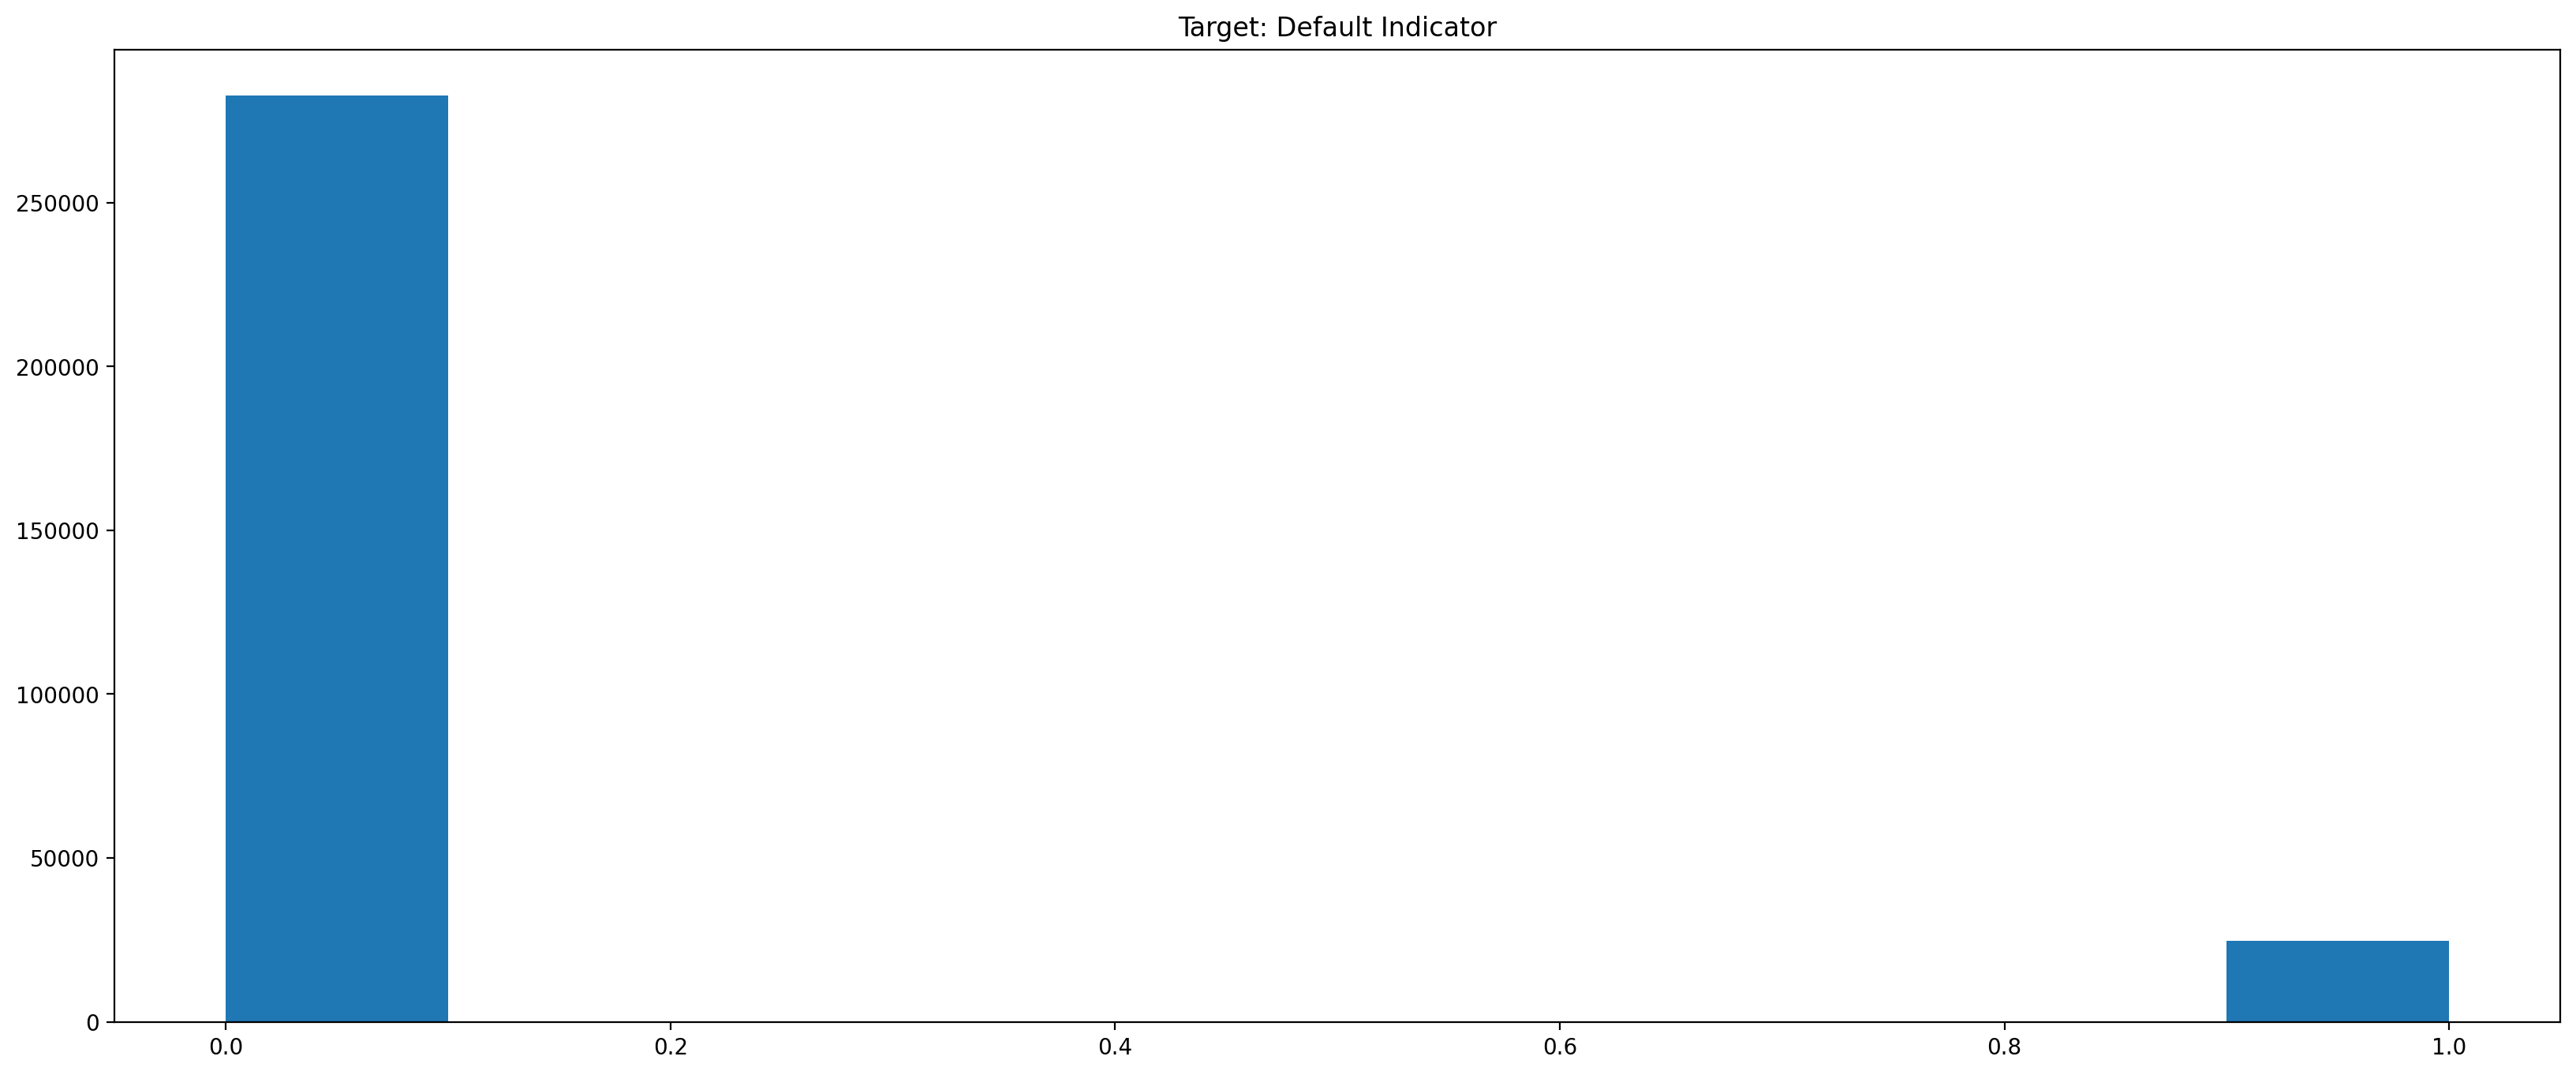

In [31]:
plt.figure(figsize = (20, 8), dpi = 200)
plt.hist(datasets["application_train"]['TARGET'].astype(int))
plt.title("Target: Default Indicator")

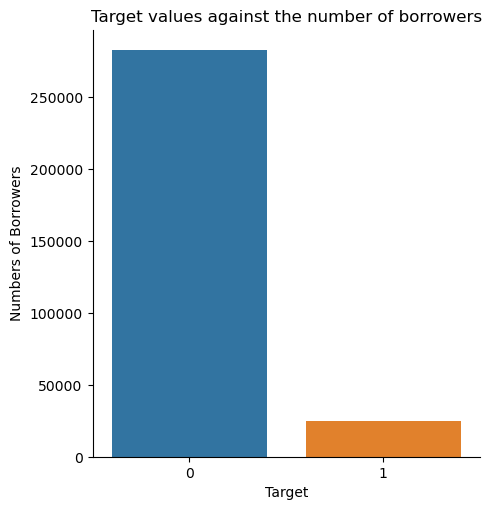

In [32]:
sns.catplot(data = datasets["application_train"], x='TARGET', kind = 'count')
plt.xlabel('Target');
plt.ylabel('Numbers of Borrowers');
plt.title('Target values against the number of borrowers');
plt.show()

In [33]:
list(datasets.keys())

['application_train',
 'application_test',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'previous_application',
 'POS_CASH_balance']

In [34]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [35]:
# is there an overlap between the test and train customers 
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [36]:
datasets["application_test"].shape

(48744, 121)

In [37]:
datasets["application_train"].shape

(307511, 122)

In [39]:
# Display the first five rows of the "previous_application" dataset and print its shape
previous_application_df = datasets["previous_application"]
print("Previous Application Dataset:")
display(previous_application_df.head())
print(f"Rows: {previous_application_df.shape[0]:,}, Columns: {previous_application_df.shape[1]:,}")


Previous Application Dataset:


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

Rows: 1,670,214, Columns: 37


In [40]:
# Print the number of previous applications
previous_applications_df = datasets["previous_application"]
num_previous_applications = previous_applications_df.shape[0]
print(f"There are {num_previous_applications:,} previous applications.")
#print(f"There are  {appsDF.shape[0]:,} previous applications")

There are 1,670,214 previous applications.


In [41]:
# Compute statistics on the number of previous applications per customer
previous_applications_df = datasets["previous_application"]
num_customers = previous_applications_df["SK_ID_CURR"].nunique()
num_apps = [5, 10, 40, 60]
num_apps_counts = [np.sum(previous_applications_df["SK_ID_CURR"].value_counts() >= n) for n in num_apps]
percent_apps = [np.round(100. * (count / num_customers), 2) for count in num_apps_counts]

# Print the percentage of customers with 5 or more, 10 or more, 40 or more, 60 or more, 70 or more, 80 or more, and 90 or more previous applications
for n, percent in zip(num_apps, percent_apps):
    print(f"Percentage of customers with {n} or more previous applications: {percent:.2f}%")


Percentage of customers with 5 or more previous applications: 41.77%
Percentage of customers with 10 or more previous applications: 11.84%
Percentage of customers with 40 or more previous applications: 0.03%
Percentage of customers with 60 or more previous applications: 0.00%


In [42]:
# Filter the training data to include only the observations with a target value of 1
unpaid_application_train = application_train[application_train['TARGET'] == 1]

# Sample 75,000 observations from the training data with a target value of 0 and append them to the filtered data
paid_application_train = application_train[application_train['TARGET'] == 0].reset_index(drop=True).sample(n=75000)
und_application_train = unpaid_application_train.append(paid_application_train)


In [43]:
# Add the undersampled training data to the dictionary of datasets
datasets["undersampled_application_train"] = und_application_train

# Print the number of observations with a target value of 0 and 1 in the undersampled training data
target_counts = und_application_train['TARGET'].value_counts()
print(f"Number of observations with a target value of 0: {target_counts[0]}")
print(f"Number of observations with a target value of 1: {target_counts[1]}")


Number of observations with a target value of 0: 75000
Number of observations with a target value of 1: 24825


In [44]:
# Create a copy of the training data containing only observations with a target value of 1 and add a weight column
undersampled_application_train_2 = datasets["application_train"][datasets["application_train"]["TARGET"] == 1].copy()
undersampled_application_train_2["weight"] = 1

# Count the number of default loans for cash loans and revolving loans separately
num_default_cash_loans = undersampled_application_train_2[(undersampled_application_train_2["TARGET"] == 1) & (undersampled_application_train_2["NAME_CONTRACT_TYPE"] == "Cash loans")].shape[0]
num_default_revolving_loans = undersampled_application_train_2[(undersampled_application_train_2["TARGET"] == 1) & (undersampled_application_train_2["NAME_CONTRACT_TYPE"] == "Revolving loans")].shape[0]

# Add the undersampled training data to the dictionary of datasets
datasets["undersampled_application_train_2"] = undersampled_application_train_2


In [45]:
# Undersample cash loans from the training data with a target value of 0 to balance the number of default loans for cash loans and revolving loans
cash_loans_target_0 = datasets["application_train"][(datasets["application_train"]["NAME_CONTRACT_TYPE"] == "Cash loans") & (datasets["application_train"]["TARGET"] == 0)]
cash_loans_target_0_sample = cash_loans_target_0.sample(n=int(1.5*num_default_cash_loans), random_state=1)
cash_loans_target_0_sample_weight = cash_loans_target_0.shape[0] / int(1.5*num_default_cash_loans)
cash_loans_target_0_sample["weight"] = cash_loans_target_0_sample_weight
undersampled_application_train_2 = pd.concat([datasets["undersampled_application_train_2"], cash_loans_target_0_sample])

# Add the undersampled training data to the dictionary of datasets
datasets["undersampled_application_train_2"] = undersampled_application_train_2


In [46]:
# Undersample revolving loans from the training data with a target value of 0 to balance the number of default loans for cash loans and revolving loans
revolving_loans_target_0 = datasets["application_train"][(datasets["application_train"]["NAME_CONTRACT_TYPE"] == "Revolving loans") & (datasets["application_train"]["TARGET"] == 0)]
revolving_loans_target_0_sample = revolving_loans_target_0.sample(n=int(1.5*num_default_revolving_loans), random_state=1)
revolving_loans_target_0_sample_weight = revolving_loans_target_0.shape[0] / int(1.5*num_default_revolving_loans)
revolving_loans_target_0_sample["weight"] = revolving_loans_target_0_sample_weight
undersampled_application_train_2 = pd.concat([datasets["undersampled_application_train_2"], revolving_loans_target_0_sample])

# Add the undersampled training data to the dictionary of datasets
datasets["undersampled_application_train_2"] = undersampled_application_train_2


In [47]:
# Create a copy of the undersampled training data and store it in a new variable
undersampled_application_train_2 = datasets["undersampled_application_train_2"].copy()


In [48]:
# Count the number of samples in the undersampled training data with a target value of 1 and 0
undersampled_application_train_2_target_counts = undersampled_application_train_2["TARGET"].value_counts()
undersampled_application_train_2_target_counts

0    37237
1    24825
Name: TARGET, dtype: int64

In [49]:
# Calculate the correlation between each column and the target variable in the application training data
application_train_correlations = datasets["application_train"].corr()["TARGET"].sort_values()

# Print the 10 features with the highest positive correlation with the target variable and the 10 features with the highest negative correlation with the target variable
print("Features with the highest positive correlation with the target variable:\n", application_train_correlations.tail(10))
print("\nFeatures with the highest negative correlation with the target variable:\n", application_train_correlations.head(10))


Features with the highest positive correlation with the target variable:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Features with the highest negative correlation with the target variable:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [50]:
# Calculate the correlation between each column and the target variable in the application training data
application_train_correlations = datasets["application_train"].corr()["TARGET"].sort_values()

# Reset the index and rename the columns of the correlation DataFrame to more descriptive names
application_train_correlations = application_train_correlations.reset_index().rename(columns={"index": "Attribute", "TARGET": "Correlation"})

# Display the correlation DataFrame
display(application_train_correlations)



Attribute  Correlation
0                   EXT_SOURCE_3    -0.178919
1                   EXT_SOURCE_2    -0.160472
2                   EXT_SOURCE_1    -0.155317
3                  DAYS_EMPLOYED    -0.044932
4                  FLOORSMAX_AVG    -0.044003
..                           ...          ...
101       DAYS_LAST_PHONE_CHANGE     0.055218
102         REGION_RATING_CLIENT     0.058899
103  REGION_RATING_CLIENT_W_CITY     0.060893
104                   DAYS_BIRTH     0.078239
105                       TARGET     1.000000

[106 rows x 2 columns]

In [51]:
# Create a DataFrame containing the target variable and the client's age in years
age_data = datasets["undersampled_application_train_2"][["TARGET", "DAYS_BIRTH"]]
age_data["YEARS"] = age_data["DAYS_BIRTH"] / 365

# Bin the ages into 10 evenly spaced bins between 20 and 70 years old
age_data["AGE_BIN"] = pd.cut(age_data["YEARS"], bins=np.linspace(20, 70, num=10))

# Display the first 15 rows of the age DataFrame
age_data.head(15)


TARGET  DAYS_BIRTH      YEARS AGE_BIN
0         1       -9461 -25.920548     NaN
26        1      -18724 -51.298630     NaN
40        1      -17482 -47.895890     NaN
42        1      -13384 -36.668493     NaN
81        1      -24794 -67.928767     NaN
94        1      -10199 -27.942466     NaN
110       1      -10526 -28.838356     NaN
138       1      -16667 -45.663014     NaN
154       1      -17538 -48.049315     NaN
163       1       -7989 -21.887671     NaN
180       1      -15326 -41.989041     NaN
184       1      -10127 -27.745205     NaN
211       1      -12824 -35.134247     NaN
235       1      -23127 -63.361644     NaN
242       1       -9157 -25.087671     NaN

In [52]:
# Group the age DataFrame by the age bins and calculate the mean target variable and age in years for each bin
age_grouped = age_data.groupby("AGE_BIN").mean()

# Display the grouped DataFrame
age_grouped


TARGET  DAYS_BIRTH  YEARS
AGE_BIN                                    
(20.0, 25.556]       NaN         NaN    NaN
(25.556, 31.111]     NaN         NaN    NaN
(31.111, 36.667]     NaN         NaN    NaN
(36.667, 42.222]     NaN         NaN    NaN
(42.222, 47.778]     NaN         NaN    NaN
(47.778, 53.333]     NaN         NaN    NaN
(53.333, 58.889]     NaN         NaN    NaN
(58.889, 64.444]     NaN         NaN    NaN
(64.444, 70.0]       NaN         NaN    NaN

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


# FEATURE ENGINEERING 

In [53]:
# Calculate the number of missing values in each column of the previous applications DataFrame
previous_applications_missing_values = datasets["previous_application"].isna().sum()

# Display the missing value counts
previous_applications_missing_values


SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [54]:
# Define a list of features to include in the analysis
features_to_analyze = ["AMT_ANNUITY", "AMT_APPLICATION"]

# Calculate descriptive statistics for the selected features in the previous applications DataFrame
feature_stats = datasets["previous_application"][features_to_analyze].describe()

# Display the descriptive statistics
print(feature_stats)

# Define a list of aggregation operations to perform on the previous applications DataFrame
aggregation_operations = ["min", "max", "mean"]

# Group the previous applications DataFrame by client ID and calculate the mean of each group for the selected features
grouped_results = datasets["previous_application"].groupby("SK_ID_CURR")[features_to_analyze].agg(aggregation_operations)

# Display the first 5 rows of the grouped results DataFrame
display(grouped_results.head())


        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


AMT_ANNUITY                       AMT_APPLICATION            \
                   min        max       mean             min       max   
SK_ID_CURR                                                               
100001        3951.000   3951.000   3951.000         24835.5   24835.5   
100002        9251.775   9251.775   9251.775        179055.0  179055.0   
100003        6737.310  98356.995  56553.990         68809.5  900000.0   
100004        5357.250   5357.250   5357.250         24282.0   24282.0   
100005        4813.200   4813.200   4813.200             0.0   44617.5   

                       
                 mean  
SK_ID_CURR             
100001       24835.50  
100002      179055.00  
100003      435436.50  
100004       24282.00  
100005       22308.75

In [55]:
# Define a list of features to include in the analysis
features_to_analyze = ["AMT_ANNUITY", "AMT_APPLICATION"]

# Calculate descriptive statistics for the selected features in the previous applications DataFrame
feature_stats = datasets["previous_application"][features_to_analyze].describe()

# Display the descriptive statistics
print(feature_stats)

# Define a list of aggregation operations to perform on the previous applications DataFrame
aggregation_operations = ["min", "max", "mean"]

# Group the previous applications DataFrame by client ID and calculate the mean of each group for the selected features
grouped_results = datasets["previous_application"].groupby("SK_ID_CURR")[features_to_analyze].agg(aggregation_operations)

# Display the first 5 rows of the grouped results DataFrame
display(grouped_results.head())


        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


AMT_ANNUITY                       AMT_APPLICATION            \
                   min        max       mean             min       max   
SK_ID_CURR                                                               
100001        3951.000   3951.000   3951.000         24835.5   24835.5   
100002        9251.775   9251.775   9251.775        179055.0  179055.0   
100003        6737.310  98356.995  56553.990         68809.5  900000.0   
100004        5357.250   5357.250   5357.250         24282.0   24282.0   
100005        4813.200   4813.200   4813.200             0.0   44617.5   

                       
                 mean  
SK_ID_CURR             
100001       24835.50  
100002      179055.00  
100003      435436.50  
100004       24282.00  
100005       22308.75

In [56]:
# Check for missing values in the grouped and aggregated results DataFrame
print(grouped_results.isna().sum())


AMT_ANNUITY      min     480
                 max     480
                 mean    480
AMT_APPLICATION  min       0
                 max       0
                 mean      0
dtype: int64


In [57]:
# Create aggregate features (via pipeline)
class FeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None, agg_needed=["mean"]): # no *args or **kargs
        self.features = features
        self.agg_needed = agg_needed
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = self.agg_needed[:]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        df_result = pd.DataFrame()
        for x1, x2 in result.columns:
            new_col = x1 + "_" + x2
            df_result[new_col] = result[x1][x2]
        df_result = df_result.reset_index(level=["SK_ID_CURR"])
        return df_result

In [58]:
datasets["previous_application"].isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [59]:
# from sklearn.pipeline import make_pipeline
# previous_feature = ["AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY", "approved_credit_ratio", 
#                     "AMT_ANNUITY_credit_ratio", "Interest_ratio", "LTV_ratio", "SK_ID_PREV", "approved"]

# agg_needed = ["min", "max", "mean", "count", "sum"]

# def previous_feature_aggregation(df, feature, agg_needed):
#     df['approved_credit_ratio'] = (df['AMT_APPLICATION']/df['AMT_CREDIT']).replace(np.inf, 0)
#     # installment over credit approved ratio
#     df['AMT_ANNUITY_credit_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
#     # total interest payment over credit ratio
#     df['Interest_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
#     #  loan cover ratio
#     df['LTV_ratio'] = (df['AMT_CREDIT']/df['AMT_GOODS_PRICE']).replace(np.inf, 0)
#     df['approved'] = np.where(df.AMT_CREDIT >0 ,1, 0)
    
#     test_pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
#     return(test_pipeline.fit_transform(df))
    
# datasets['previous_application_agg'] = previous_feature_aggregation(datasets["previous_application"], previous_feature, agg_needed)

In [60]:
from sklearn.pipeline import make_pipeline
previous_feature = ["AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY", "approved_credit_ratio", 
                    "AMT_ANNUITY_credit_ratio", "Interest_ratio", "LTV_ratio", "SK_ID_PREV", "approved"]

agg_needed = ["min", "max", "mean", "count", "sum"]

def previous_feature_aggregation(df, feature, agg_needed):
    df['approved_credit_ratio'] = (df['AMT_APPLICATION']/df['AMT_CREDIT']).replace(np.inf, 0)
    # installment over credit approved ratio
    df['AMT_ANNUITY_credit_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    # total interest payment over credit ratio
    df['Interest_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    #  loan cover ratio
    df['LTV_ratio'] = (df['AMT_CREDIT']/df['AMT_GOODS_PRICE']).replace(np.inf, 0)
    df['approved'] = np.where(df.AMT_CREDIT >0 ,1, 0)
    
    test_pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
datasets['previous_application_agg'] = previous_feature_aggregation(datasets["previous_application"], previous_feature, agg_needed)

In [61]:
datasets["previous_application_agg"].isna().sum()

SK_ID_CURR                           0
AMT_APPLICATION_min                  0
AMT_APPLICATION_max                  0
AMT_APPLICATION_mean                 0
AMT_APPLICATION_count                0
AMT_APPLICATION_sum                  0
AMT_CREDIT_min                       0
AMT_CREDIT_max                       0
AMT_CREDIT_mean                      0
AMT_CREDIT_count                     0
AMT_CREDIT_sum                       0
AMT_ANNUITY_min                    480
AMT_ANNUITY_max                    480
AMT_ANNUITY_mean                   480
AMT_ANNUITY_count                    0
AMT_ANNUITY_sum                      0
approved_credit_ratio_min          252
approved_credit_ratio_max          252
approved_credit_ratio_mean         252
approved_credit_ratio_count          0
approved_credit_ratio_sum            0
AMT_ANNUITY_credit_ratio_min       481
AMT_ANNUITY_credit_ratio_max       481
AMT_ANNUITY_credit_ratio_mean      481
AMT_ANNUITY_credit_ratio_count       0
AMT_ANNUITY_credit_ratio_

In [62]:
datasets["installments_payments"].isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [63]:
payments_features = ["DAYS_INSTALMENT_DIFF", "AMT_PATMENT_PCT"]

agg_needed = ["mean"]

def payments_feature_aggregation(df, feature, agg_needed):
    df['DAYS_INSTALMENT_DIFF'] = df['DAYS_INSTALMENT'] - df['DAYS_ENTRY_PAYMENT']
    df['AMT_PATMENT_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_PAYMENT,df.AMT_INSTALMENT)]
    
    test_pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
datasets['installments_payments_agg'] = payments_feature_aggregation(datasets["installments_payments"], payments_features, agg_needed)

In [64]:
datasets["installments_payments_agg"].isna().sum()

SK_ID_CURR                    0
DAYS_INSTALMENT_DIFF_mean     9
AMT_PATMENT_PCT_mean         12
dtype: int64

In [65]:
datasets["credit_card_balance"].isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [67]:
credit_features = [
    "AMT_BALANCE",
    "AMT_DRAWINGS_PCT",
    "AMT_DRAWINGS_ATM_PCT",
    "AMT_DRAWINGS_OTHER_PCT",
    "AMT_DRAWINGS_POS_PCT",
    "AMT_PRINCIPAL_RECEIVABLE_PCT",
    "CNT_DRAWINGS_ATM_CURRENT",
    "CNT_DRAWINGS_CURRENT",
    "CNT_DRAWINGS_OTHER_CURRENT",
    "CNT_DRAWINGS_POS_CURRENT",
    "SK_DPD",
    "SK_DPD_DEF",
]

agg_needed = ["mean"]


def calculate_pct(x, y):
    return x / y if (y != 0) & pd.notnull(y) else np.nan


def credit_feature_aggregation(df, feature, agg_needed):
    pct_columns = [
        ("AMT_DRAWINGS_CURRENT", "AMT_DRAWINGS_PCT"),
        ("AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_ATM_PCT"),
        ("AMT_DRAWINGS_OTHER_CURRENT", "AMT_DRAWINGS_OTHER_PCT"),
        ("AMT_DRAWINGS_POS_CURRENT", "AMT_DRAWINGS_POS_PCT"),
        ("AMT_RECEIVABLE_PRINCIPAL", "AMT_PRINCIPAL_RECEIVABLE_PCT"),
    ]

    for col_x, col_pct in pct_columns:
        df[col_pct] = [calculate_pct(x, y) for x, y in zip(df[col_x], df["AMT_CREDIT_LIMIT_ACTUAL"])]

    pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return pipeline.fit_transform(df)


datasets["credit_card_balance_agg"] = credit_feature_aggregation(
    datasets["credit_card_balance"], credit_features, agg_needed
)


In [68]:
datasets["credit_card_balance_agg"].isna().sum()

SK_ID_CURR                               0
AMT_BALANCE_mean                         0
AMT_DRAWINGS_PCT_mean                 1113
AMT_DRAWINGS_ATM_PCT_mean            32278
AMT_DRAWINGS_OTHER_PCT_mean          32278
AMT_DRAWINGS_POS_PCT_mean            32278
AMT_PRINCIPAL_RECEIVABLE_PCT_mean     1113
CNT_DRAWINGS_ATM_CURRENT_mean        31364
CNT_DRAWINGS_CURRENT_mean                0
CNT_DRAWINGS_OTHER_CURRENT_mean      31364
CNT_DRAWINGS_POS_CURRENT_mean        31364
SK_DPD_mean                              0
SK_DPD_DEF_mean                          0
dtype: int64

# Feature Engineering - HCDR preprocessing 

HCDR data preprocessing encompassing all application train columns was undertaken with meticulous attention to detail. The application train subset was selected as it constitutes the primary table with 121 columns. To streamline the preprocessing phase, we selected seven of the most salient numerical and categorical features. The application_train table harbors pertinent attributes such as the applicant's age, gender, income amount, among others, which are significant determinants for predicting loan defaulters.

Following the preprocessing pipeline, we created two datasets, the training dataset, and the validation dataset. The training dataset was utilized to train the machine learning model, while the validation dataset was utilized to evaluate the model's performance. We achieved this by splitting the preprocessed data into training and  validation. This splitting ensured that the model was trained on a sufficiently large dataset and also tested on a substantial amount of data to assess its effectiveness.

HCDR data preprocessing and dataset creation are indispensable stages in constructing a precise machine learning model to predict loan defaulters.

##### Creating Datasets,Selecting the numerical & categorical features,Pipeline Definition and Create Data Preparation Pipeline

In [69]:
# Load the train dataset
train_data = datasets["application_train"]

# Compute the distribution of the target variable
target_counts = train_data['TARGET'].value_counts()

# Display the target distribution
print("Target variable distribution:\n")
print(target_counts)
print("\n")

# Compute the percentage of positive and negative examples in the dataset
positive_count = target_counts[1]
negative_count = target_counts[0]
total_count = positive_count + negative_count
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Display the percentages of positive and negative examples
print(f"Percentage of positive examples: {positive_percentage:.2f}%")
print(f"Percentage of negative examples: {negative_percentage:.2f}%")


Target variable distribution:

0    282686
1     24825
Name: TARGET, dtype: int64


Percentage of positive examples: 8.07%
Percentage of negative examples: 91.93%


In [70]:
class_labels = ["No Default","Default"]

In [72]:
# Create a class to select numerical or categorical columns since Scikit-Learn doesn't handle DataFrames yet
# Import necessary libraries
from sklearn.base import BaseEstimator, TransformerMixin

# Create a transformer to select numerical or categorical columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns].values


In [73]:
# Identify numerical and categorical columns in the train dataset
num_cols = train_data.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = train_data.select_dtypes(include=["object"]).columns.tolist()

# Remove the target and ID columns from the numerical columns list
num_cols.remove("TARGET")
num_cols.remove("SK_ID_CURR")


In [74]:
categorical_pipeline = Pipeline([
    ('category_selector', ColumnSelector(cat_cols)),
    ('category_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ('number_selector', ColumnSelector(num_cols)),
    ('number_imputer', SimpleImputer(strategy='mean')),
    ('standard_scaler', StandardScaler()),
])

data_preparation_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline", categorical_pipeline),
])



The numerical and categorical pipelines were combined using FeatureUnion to prepare for the data pipeline. FeatureUnion is a class that allows combining multiple pipelines to handle numerical and categorical features simultaneously. The output of both pipelines was merged into a single feature set, which was passed to the data pipeline. The data pipeline included feature scaling, feature selection, and splitting the data into training and validation datasets using train_test_split.

In [75]:
(data_preparation_pipeline)

FeatureUnion(transformer_list=[('numerical_pipeline',
                                Pipeline(steps=[('number_selector',
                                                 ColumnSelector(columns=['CNT_CHILDREN',
                                                                         'AMT_INCOME_TOTAL',
                                                                         'AMT_CREDIT',
                                                                         'AMT_ANNUITY',
                                                                         'AMT_GOODS_PRICE',
                                                                         'REGION_POPULATION_RELATIVE',
                                                                         'DAYS_BIRTH',
                                                                         'DAYS_EMPLOYED',
                                                                         'DAYS_REGISTRATION',
                                                       

In [76]:
# Combine the numerical and categorical features into a single list
selected_features = num_cols + cat_cols + ["SK_ID_CURR"]

# Compute the total number of features and their breakdown by type
num_features = len(num_cols)
cat_features = len(cat_cols)
tot_features = f"{len(selected_features)}:   Num:{num_features},    Cat:{cat_features}"
tot_features

'121:   Num:104,    Cat:16'

In [77]:
X_kaggle_test= datasets["application_test"]

In [78]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Split the train dataset into train, validation, and test sets
y_train = train_data['TARGET']
X_train = train_data[selected_features]
X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    X_train,
    y_train,
    test_size=0.15,
    random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid,
    y_train_valid,
    test_size=0.15,
    random_state=42
)

# Filter the selected features in the Kaggle test dataset
X_kaggle_test = X_kaggle_test[selected_features]

# Display the shapes of the resulting datasets
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X Kaggle test     shape: {X_kaggle_test.shape}")


X train           shape: (222176, 121)
X validation      shape: (39208, 121)
X test            shape: (46127, 121)
X Kaggle test     shape: (48744, 121)


# Empirical Findings 

Every trial in this undertaking shall be identified by 
Pipeline configuration

I intend to formulate five  distinct experiments, predicated on the ensuing criteria:

all normal features

undersampled features 

baseline machine learning models.

Prior to embarking on model selection through the process of model comparison and model design, it is imperative to initialize a logbook and establish a precise loss metric framework. This shall allow for the systematic tracking and monitoring of model performance across various iterations, and facilitate the comprehensive evaluation of model efficacy in accordance with pre-defined objectives. Such a structured approach is essential to ensure robust and accurate analyses, and to enable the identification of optimal model configurations that deliver maximal predictive power and generalizability.

In [79]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC", 
                                   "Train F1 Score",
                                   "Valid F1 Score",
                                   "Test F1 Score"
                                  ])

# Evaluation metrics

The evaluation of submissions is conducted through the calculation of the area under the ROC curve, which measures the relationship between the predicted probability and the observed target. The SkLearn roc_auc_score function is utilized to compute the AUC or AUROC, effectively summarizing the information contained in the ROC curve into a single numerical value.


## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

## ACCURACY 
It refers to the proportion of accurately classified data instances in relation to the overall number of data instances.

<!-- # @latexify.function
# def Accuracy():
#     return (TN + TP) / (TN + FP + TP + FN)
# Accuracy -->
$$ \operatorname{Accuracy} =  \frac{TN+TP}{TN+FP+TP+FN}\ $$

## LOG LOSS 
It is a metric that reflects the degree of proximity between the predicted probability and the true value (which is typically 0 or 1 in the context of binary classification). The log-loss value increases as the predicted probability increasingly deviates from the true value.

$$ \operatorname{LogLoss} =  -\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right) + \lambda \sum_{j=1}^{n}|\theta_j| $$

## PRECISION:
    
Precision refers to the ratio of true positives to the sum of true positives and false positives.

<!-- # @latexify.function
# def Precision():
#     return (TP) / (TP + FP)
# Precision -->
$$ \operatorname{Precision} =  \frac{TP}{TP+FP}\ $$

## RECALL 
It denotes the fraction of positive instances that are correctly identified as positive by the model. This metric is equivalent to the TPR (True Positive Rate).

<!-- # @latexify.function
# def Recall():
#     return (TP) / (TP + FN)
# Recall -->

$$ \operatorname{Recall} =  \frac{TP}{TP+FN}\ $$

## F1 SCORE 
It is the harmonic mean of accuracy and recall, taking into account both false positives and false negatives. It is a useful metric for evaluating models on imbalanced datasets.

<!-- # @latexify.function
# def F1Score():
#     return (2) * (Precision * Recall) / (Precision + Recall)
# F1Score -->

$$ \operatorname{F1Score} =  \frac{Precision * Recall}{Precision + Recall}\ $$

## A CONFUSION MATRIX
It is a tabular representation consisting of two axes - one representing the actual values and the other representing the predicted values. The matrix is of size 2x2 and is commonly used in classification tasks to assess the performance of a model.

# Model-1 baseline using training columns for the application with LogisticRegression( )

In order to establish a baseline, we shall employ certain preprocessed features through our pipeline. The model that we shall utilize for this purpose is a logistic regression model.

## Block diagram 


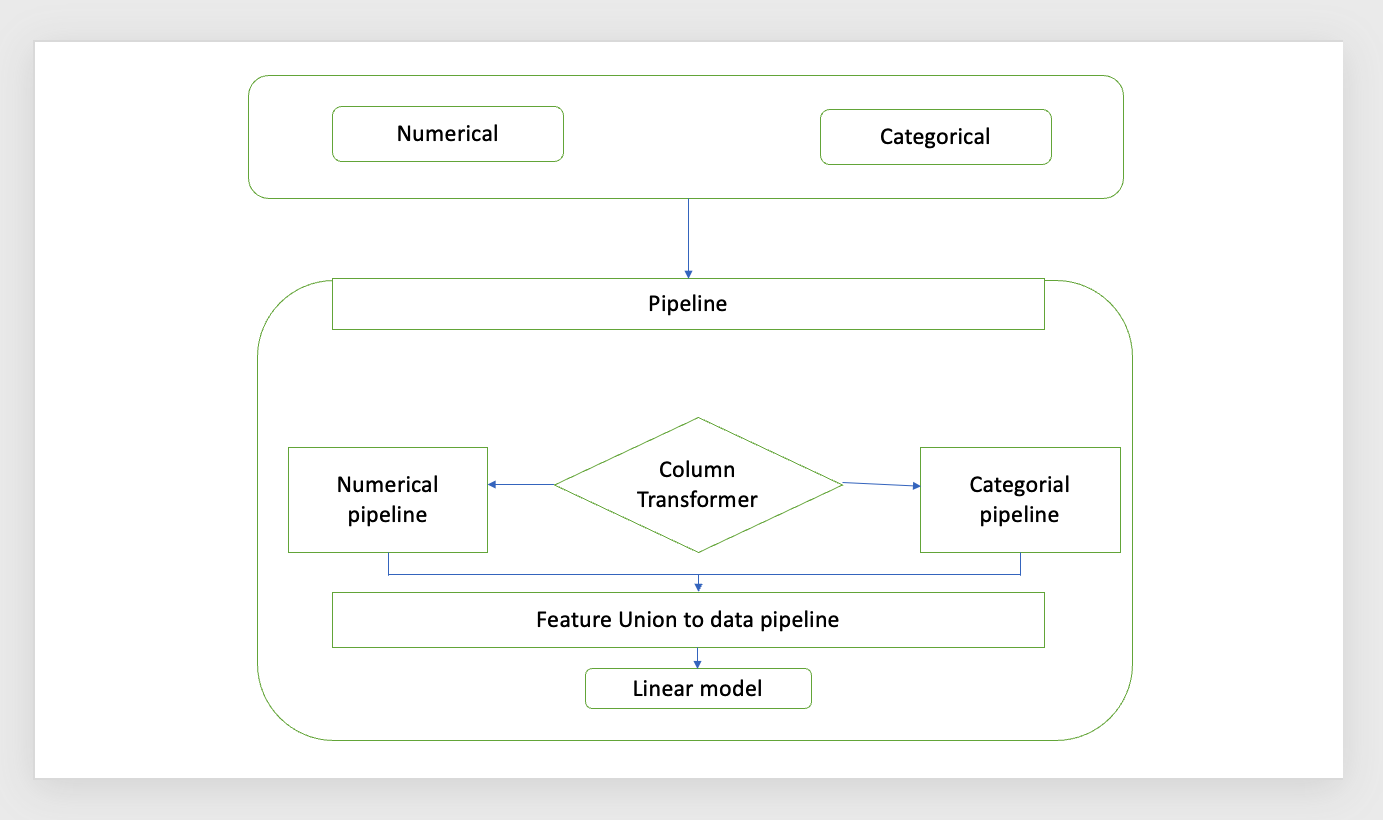

In [85]:
from IPython.display import Image
Image(filename='linear_block.png')


## Number of Input Features Used in Pipeline

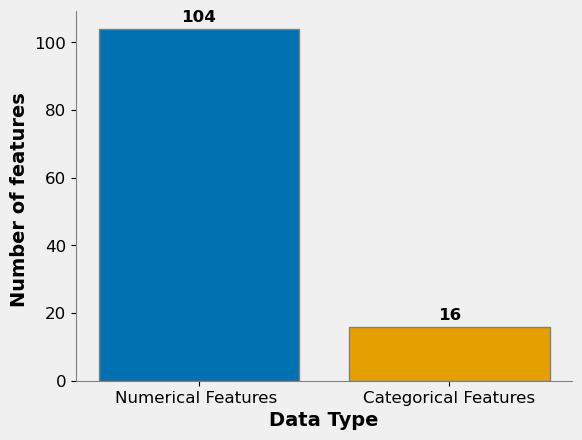

In [86]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

data = [num_features,cat_features]
labels = ['Numerical Features ', 'Categorical Features']

fig, ax = plt.subplots()
bars = ax.bar(labels, data, color=['#0072B2', '#E69F00'], edgecolor='black')

# Add shadows to the bars
for bar in bars:
    bar.set_edgecolor('gray')
    bar.set_linewidth(1)
    bar.set_zorder(0)

    # Add labels to the bars
    height = bar.get_height()
    ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# Customize the axis labels and ticks
ax.set_xlabel('Data Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of features ', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)

# Customize the plot background
ax.set_facecolor('#F0F0F0')
fig.set_facecolor('#F0F0F0')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [87]:
%%time

# Import necessary libraries
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to the train dataset
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
    ("preparation", data_preparation_pipeline),
    ("linear", LogisticRegression())
])
model = full_pipeline_with_predictor.fit(X_train, y_train)

# Display the time taken to fit the model
print("Model trained successfully.\n")


Model trained successfully.

CPU times: user 18.9 s, sys: 1.8 s, total: 20.7 s
Wall time: 5 s


In [88]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Compute the training accuracy of the model
train_acc = accuracy_score(y_train, model.predict(X_train))

# Display the training accuracy
print(f"Training accuracy: {train_acc:.3f}")


Training accuracy: 0.920


# Conduct cross-validation across folds and proceed with model training.

Cross-fold validation constitutes a methodology aimed at assessing the efficacy of a machine learning model, whereby the data is partitioned into multiple subsets, or "folds," and the model is trained on various permutations of said folds

In [89]:
from sklearn.model_selection import ShuffleSplit

cvSplits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)

In [90]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object to generate cross-validation splits
cv_splits = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)




In [91]:
import time


def pct(x):
    return round(100 * x, 3)


# Start measuring time
start = time.time()

# Fit the model
model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Calculate cross-validation scores
logit_scores = cross_val_score(full_pipeline_with_predictor, X_train, y_train, cv=cvSplits)
logit_score_train = pct(logit_scores.mean())

# Measure training time
train_time = np.round(time.time() - start, 4)

# Start measuring test prediction time
start = time.time()

# Calculate test score
logit_score_test = full_pipeline_with_predictor.score(X_test, y_test)

# Measure test prediction time
test_time = np.round(time.time() - start, 4)


In [92]:
# Print the test accuracy
print(f"Test Accuracy: {logit_score_test * 100:.3f}%")

Test Accuracy: 91.944%


In [93]:
# Import necessary libraries
from sklearn.metrics import roc_auc_score

# Compute the training AUC score of the model
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

# Display the training AUC score
print(f"Training AUC score: {train_auc:.3f}")


Training AUC score: 0.748


## Confusion Matrix

Verily, a confusion matrix is a tabulation that doth summarize the performance of a classification model by comparing the predicted labels with the actual labels. For a binary classification problem, the matrix contains True Positive, False Positive, False Negative, and True Negative values. The True Positive and True Negative be true predictions, while the False Positive and False Negative be false predictions.

creating confusion matrix function for baseline model 

In [94]:
import numpy as np
from sklearn.metrics import confusion_matrix

def confusion_matrix_normalized(model, X_train, y_train, X_test, y_test):
    # Predict on train and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate confusion matrices for train and test data
    cm_train = confusion_matrix(y_train, y_pred_train, normalize='true')
    cm_test = confusion_matrix(y_test, y_pred_test, normalize='true')

    return cm_train, cm_test


In [95]:
# Compute normalized confusion matrices for the model on the training and test sets
cm_train, cm_test = confusion_matrix_normalized(model, X_train, y_train, X_test, y_test)


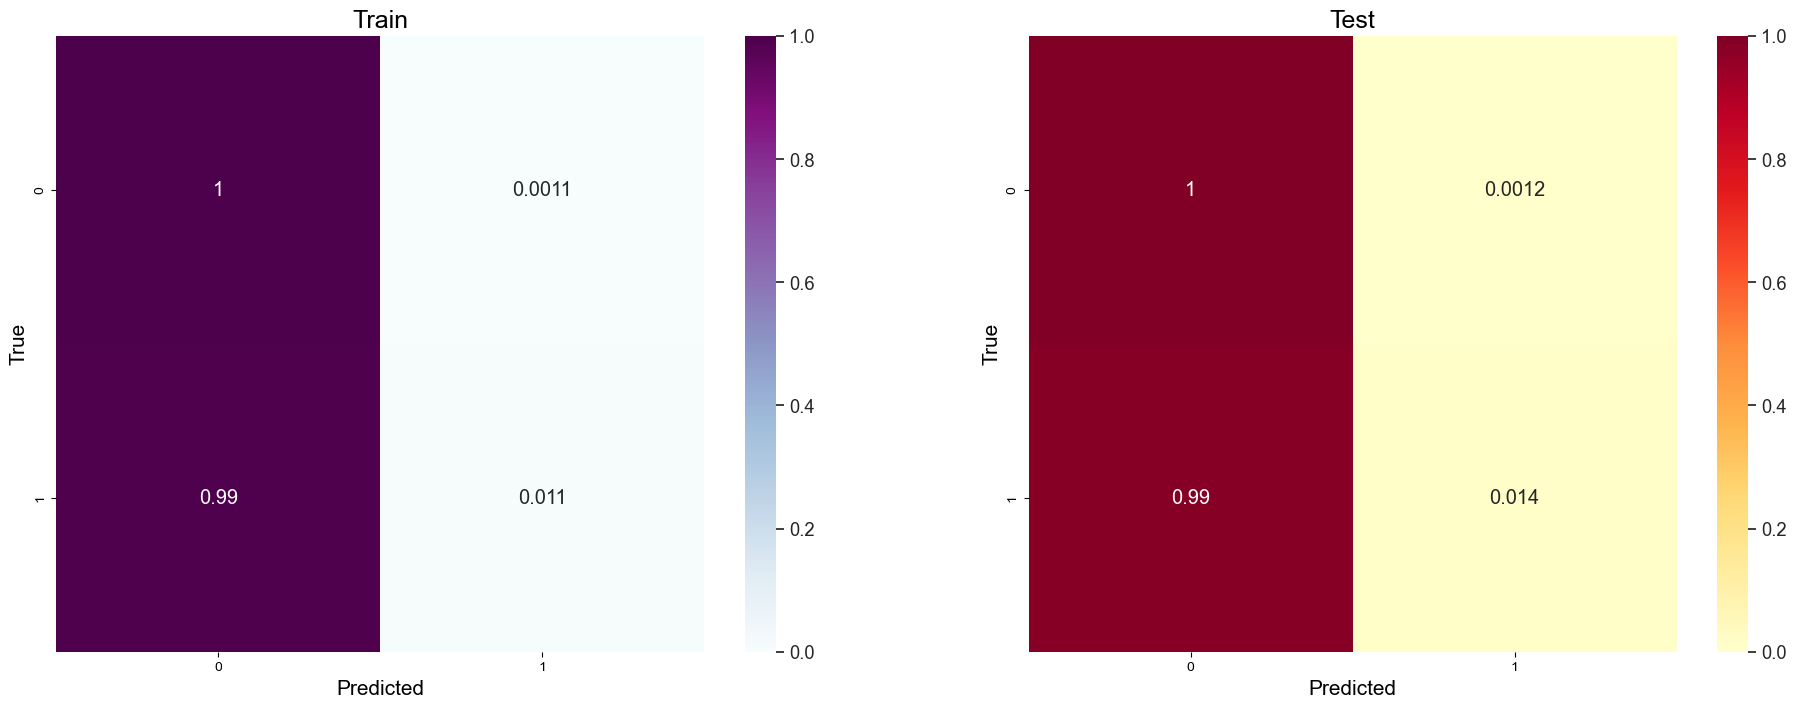

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the class labels for the confusion matrix
class_labels = ["0", "1"]

# Compute normalized confusion matrices for the model on the training and test sets
cm_train, cm_test = confusion_matrix_normalized(model, X_train, y_train, X_test, y_test)

# Create a figure with two subplots for the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 8))

# Plot the normalized confusion matrix for the training set
sns.set(font_scale=1.2)
sns.heatmap(
    cm_train,
    vmin=0,
    vmax=1,
    annot=True,
    cmap="BuPu",
    xticklabels=class_labels,
    yticklabels=class_labels,
    ax=ax1,
)
ax1.set_xlabel("Predicted", fontsize=15)
ax1.set_ylabel("True", fontsize=15)
ax1.set_title("Train", fontsize=18)

# Plot the normalized confusion matrix for the test set
sns.set(font_scale=1.2)
sns.heatmap(
    cm_test,
    vmin=0,
    vmax=1,
    annot=True,
    cmap="YlOrRd",
    xticklabels=class_labels,
    yticklabels=class_labels,
    ax=ax2,
)
ax2.set_xlabel("Predicted", fontsize=15)
ax2.set_ylabel("True", fontsize=15)
ax2.set_title("Test", fontsize=18)

# Display the plot
plt.show()


F1 Score for Test set:  0.027225130890052355


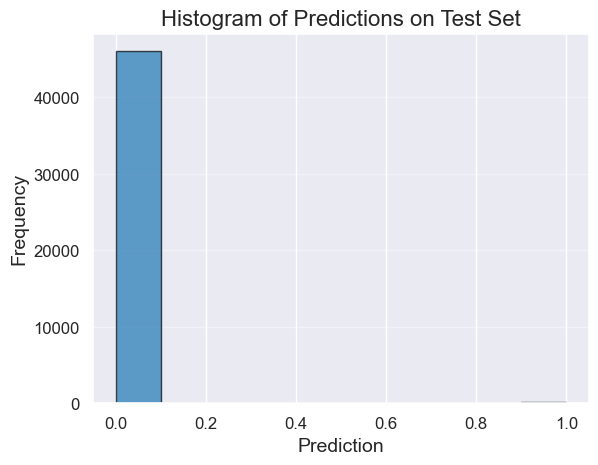

In [97]:
from sklearn.metrics import f1_score
pred = model.predict(X_test)
plt.hist(pred, color='tab:blue', alpha=0.7, edgecolor='black')
f1_train = f1_score(y_train, model.predict(X_train))
f1_valid = f1_score(y_valid, model.predict(X_valid))
f1_test = f1_score(y_test, model.predict(X_test))
print("F1 Score for Test set: ", f1_test)
plt.title('Histogram of Predictions on Test Set', fontsize=16)
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.4)


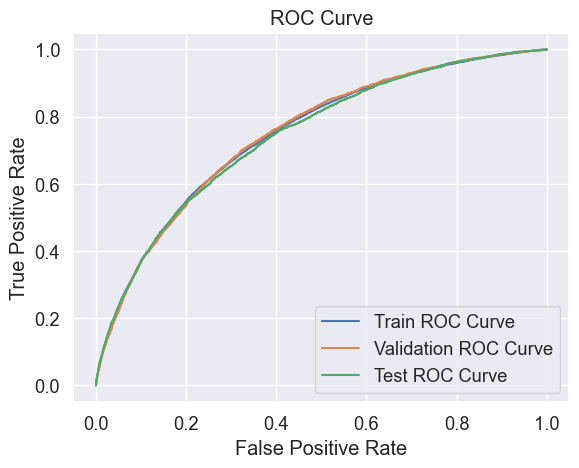

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

exp_name = f"Baseline_Model-1:Logistic Regression with {len(selected_features)}_features"

# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)

expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, train_preds),
                roc_auc_score(y_valid, valid_preds),
                roc_auc_score(y_test, test_preds),
                f1_train, f1_valid, f1_test],
    4))

# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [99]:
expLog

exp_name  Train Acc  Valid Acc  \
0  Baseline_Model-1:Logistic Regression with 121_...     0.9197      0.916   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.9194      0.748     0.7492     0.7436          0.0222          0.0214   

   Test F1 Score  
0         0.0272

## After performing correlation analysis, specific columns were selected from the "application train" dataset

The selected features were chosen based on their potential predictive power for the target variable "TARGET". Specifically, we performed correlation analysis on the application train data and selected the columns with the highest correlation to the target variable. Some of these features, such as "DAYS_BIRTH", "DAYS_EMPLOYED", and "EXT_SOURCE_1", are related to the age and income of the borrower, which are likely to affect their ability to repay a loan. Other features, such as "NAME_EDUCATION_TYPE" and "OCCUPATION_TYPE", may also be related to the borrower's financial situation and ability to repay a loan. Finally, "CODE_GENDER" and "FLAG_OWN_CAR" and "FLAG_OWN_REALTY" may also provide insights into the borrower's overall financial stability and responsibility.

15:   Num:7,    Cat:7
X train           shape: (222176, 15)
X validation      shape: (46127, 15)
X test            shape: (39208, 15)
X X_kaggle_test   shape: (48744, 15)


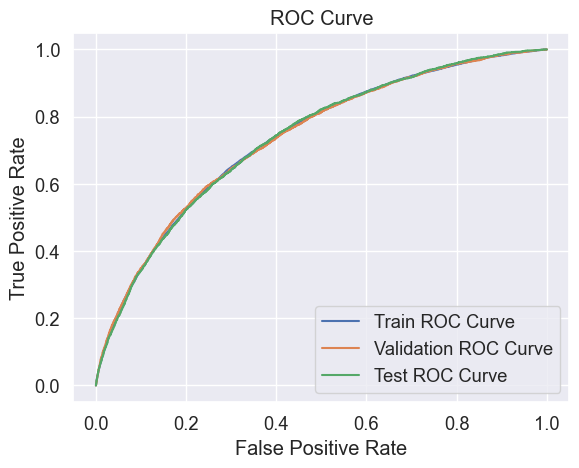

exp_name  Train Acc  Valid Acc  \
0  Baseline_Model-1:Logistic Regression with 121_...     0.9197     0.9160   
1  Baseline_Model-2:Logistic Regression with 15_f...     0.9197     0.9192   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.9194     0.7480     0.7492     0.7436          0.0222          0.0214   
1     0.9159     0.7355     0.7357     0.7355          0.0152          0.0132   

   Test F1 Score  
0         0.0272  
1         0.0120

In [100]:
# Define numeric and categorical attributes
numeric_attributes = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]
categorical_attributes = [
    'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE',
    'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE'
]

# Combine selected features
selected_features = numeric_attributes + categorical_attributes + ["SK_ID_CURR"]
total_features = f"{len(selected_features)}:   Num:{len(numeric_attributes)},    Cat:{len(categorical_attributes)}"

print(total_features)

# Split the provided training data into training, validation, and test sets
y_train = train_data['TARGET']
X_train = train_data[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test = X_kaggle_test[selected_features]

# Print dataset shapes
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

# Define categorical pipeline
categorical_pipeline = Pipeline([
    ('category_selector', ColumnSelector(categorical_attributes)),
    ('category_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown="ignore"))
])

# Define numeric pipeline
numeric_pipeline = Pipeline([
    ('number_selector', ColumnSelector(numeric_attributes)),
    ('number_imputer', SimpleImputer(strategy='mean')),
    ('standard_scaler', StandardScaler()),
])

# Combine pipelines
data_preparation_pipeline = FeatureUnion(transformer_list=[
    ("numeric_pipeline", numeric_pipeline),
    ("categorical_pipeline", categorical_pipeline),
])

# Set random seed
np.random.seed(42)

# Define the full pipeline with predictor
full_pipeline_with_predictor = Pipeline([
    ("preparation", data_preparation_pipeline),
    ("linear", LogisticRegression())
])

# Fit the model
model = full_pipeline_with_predictor.fit(X_train, y_train)

# Calculate F1 scores
f1_train = f1_score(y_train, model.predict(X_train))
f1_valid = f1_score(y_valid, model.predict(X_valid))
f1_test = f1_score(y_test, model.predict(X_test))

# Add results to the experiment log
exp_name = f"Baseline_Model-2:Logistic Regression with {len(selected_features)}_features after correlation analysis"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
    [accuracy_score(y_train, model.predict(X_train)), 
     accuracy_score(y_valid, model.predict(X_valid)),
     accuracy_score(y_test, model.predict(X_test)),
     roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
     roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
     roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
     f1_train, f1_valid, f1_test],
    4))

# Plot ROC curves for the train, validation, and test sets
train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
valid_fpr, valid_tpr, _ = roc_curve(y_valid, model.predict_proba(X_valid)[:, 1])
test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.plot(train_fpr, train_tpr, label='Train ROC Curve')
plt.plot(valid_fpr, valid_tpr, label='Validation ROC Curve')
plt.plot(test_fpr, test_tpr, label='Test ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

expLog



## Incorporate the unannotated dataset, through a join operation.

In [101]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance', 'undersampled_application_train', 'undersampled_application_train_2', 'previous_application_agg', 'installments_payments_agg', 'credit_card_balance_agg'])

In [102]:


train_dataset = datasets["undersampled_application_train"]  # primary dataset

merge_all_data = True

if merge_all_data:
    # Join/Merge in prevApps Data
    train_dataset = train_dataset.merge(
        datasets["previous_application_agg"],
        how='left',
        on='SK_ID_CURR'
    )

    # Join/Merge in Installments Payments Data
    train_dataset = train_dataset.merge(
        datasets["installments_payments_agg"],
        how='left',
        on="SK_ID_CURR"
    )

    # Join/Merge in Credit Card Balance Data
    train_dataset = train_dataset.merge(
        datasets["credit_card_balance_agg"],
        how='left',
        on="SK_ID_CURR"
    )

datasets["und_4_datasets"] = train_dataset
train_dataset.shape

(99825, 181)

## Incorporate the unannotated dataset, also known as the submission file, through a join operation.

In [103]:
X_kaggle_test = datasets["application_test"]

if merge_all_data:
    # Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(
        datasets["previous_application_agg"],
        how='left',
        on='SK_ID_CURR'
    )

    # Join/Merge in Installments Payments Data
    X_kaggle_test = X_kaggle_test.merge(
        datasets["installments_payments_agg"],
        how='left',
        on="SK_ID_CURR"
    )

    # Join/Merge in Credit Card Balance Data
    X_kaggle_test = X_kaggle_test.merge(
        datasets["credit_card_balance_agg"],
        how='left',
        on="SK_ID_CURR"
    )

# PIPELINE - Processing 

##  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In the realm of training, validation, and test sets, the OneHotEncoder is endowed upon the training set. Each feature's sui generis value from the training set engenders a novel column. The encoding process results in the vanishing of the initial column names and values, leaving behind a numpy array as the output. Nevertheless, upon transforming the test set, a ValueError arises post-fitting of the encoder to the training set. This predicament transpires due to the presence of previously unseen, avant-garde unique values in the test set, which the encoder fails to handle. In order to utilize both the transformed training and test sets in machine learning algorithms, they must contain an equivalent number of columns. This obstacle can be surmounted by employing the option "handle_unknown='ignore'" of the OneHotEncoder, which dismisses unfamiliar values during the transformation of the test set.

## HCDR preprocessing 


We elected to incorporate supplementary tables :
    
Additional tables, such as Previous Application, Installment Payments, and Credit Card Applications, were included alongside the application_train dataset for HCDR preprocessing.

This decision was made due to low accuracy when only using the application_train data, which was caused by imbalanced data and required undersampling of non-defaulters.

The other tables were found to contain significant features according to correlation analysis.
    

## Creating Datasets , Categorical pipeline , Numerical Pipeline & Data Pipeline

Data is split into training, validation, and testing sets, then preprocessed with separate categorical and numerical pipelines before being combined into a complete data pipeline for our machine learning model pipeline 

In [104]:
# Define numerical and categorical attribute lists
numerical_attributes = []
categorical_attributes = []

# Iterate over each feature in the train dataset
for feature in train_dataset.columns:
    # Determine if the feature is numerical or categorical
    if train_dataset[feature].dtype == np.float64 or train_dataset[feature].dtype == np.int64:
        numerical_attributes.append(feature)
    else:
        categorical_attributes.append(feature)

# Remove TARGET and SK_ID_CURR from the numerical attributes list
numerical_attributes.remove('TARGET')
numerical_attributes.remove('SK_ID_CURR')

# Define the categorical pipeline
categorical_pipeline = Pipeline([
    ('selector', ColumnSelector(categorical_attributes)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown="ignore"))
])

# Define the numerical pipeline
numerical_pipeline = Pipeline([
    ('selector', ColumnSelector(numerical_attributes)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('standard_scaler', StandardScaler()),
])

# Combine the categorical and numerical pipelines into a single data preparation pipeline
data_prep_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline", categorical_pipeline),
])

# Define the final list of selected features
selected_features = numerical_attributes + categorical_attributes + ["SK_ID_CURR"]

# Generate a string summarizing the total number of selected features
tot_features = f"{len(selected_features)} features selected: Numerical={len(numerical_attributes)}, Categorical={len(categorical_attributes)}"


In [105]:
# Split the provided training data into training and validation and test
# The kaggle evaluation test set has no labels
from sklearn.model_selection import train_test_split

y_train = train_dataset['TARGET']
X_train = train_dataset[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]
 
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (72123, 180)
X validation      shape: (14974, 180)
X test            shape: (12728, 180)
X X_kaggle_test   shape: (48744, 180)


# Model-2 baseline using LogisticRegression( )

For establishing a baseline, we shall employ certain processed features stemming from the pipeline. The logistic regression model shall serve as the rudimentary benchmark model 2 . We will use two undersampled data here .

Here is First undersampled data with 180 feature sets .

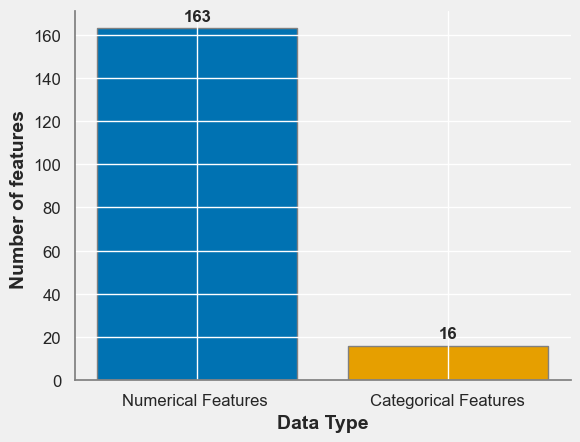

In [106]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

data = [len(numerical_attributes),len(categorical_attributes)]
labels = ['Numerical Features ', 'Categorical Features']

fig, ax = plt.subplots()
bars = ax.bar(labels, data, color=['#0072B2', '#E69F00'], edgecolor='black')

# Add shadows to the bars
for bar in bars:
    bar.set_edgecolor('gray')
    bar.set_linewidth(1)
    bar.set_zorder(0)

    # Add labels to the bars
    height = bar.get_height()
    ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# Customize the axis labels and ticks
ax.set_xlabel('Data Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of features ', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)

# Customize the plot background
ax.set_facecolor('#F0F0F0')
fig.set_facecolor('#F0F0F0')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [107]:
from sklearn.metrics import accuracy_score

np.random.seed(42)

full_pipeline_with_predictor = Pipeline([
    ("preparation", data_preparation_pipeline),
    ("linear", LogisticRegression())
])

# Fit the pipeline to the training data and create a pipelined model
full_pipeline_with_predictor.fit(X_train, y_train)
pipelined_model = full_pipeline_with_predictor

# Compute the accuracy score of the trained model on the training data
accuracy = np.round(accuracy_score(y_train, pipelined_model.predict(X_train)), 3)


In [108]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import time

np.random.seed(42)

# Split the training data into 3 shuffled folds for cross-validation
cv_splits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)

# Fit the pipelined model to the training data and time it
start_train = time.time()
pipelined_model = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start_train, 4)

# Compute the cross-validation accuracy score of the pipelined model on the training data
cross_val_scores = cross_val_score(pipelined_model, X_train, y_train, cv=cv_splits)
cross_val_score_train = np.round(cross_val_scores.mean(), 3)

# Time and score the pipelined model on the test data
start_test = time.time()
cross_val_score_test = pipelined_model.score(X_test, y_test)
test_time = np.round(time.time() - start_test, 4)
roc_auc_score(y_train, pipelined_model.predict_proba(X_train)[:, 1])

0.7361271426628964

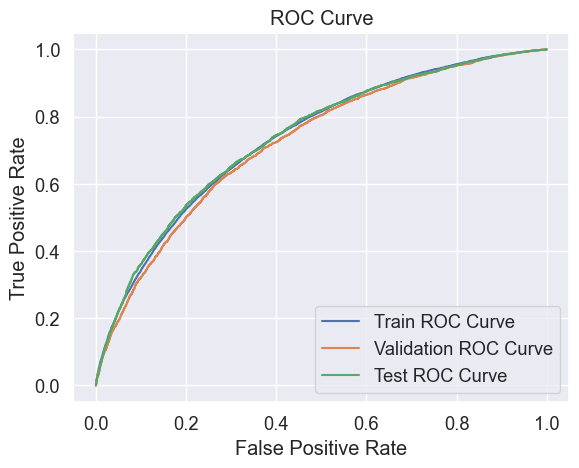

exp_name  Train Acc  Valid Acc  \
0  Baseline_Model-1:Logistic Regression with 121_...     0.9197     0.9160   
1  Baseline_Model-2:Logistic Regression with 15_f...     0.9197     0.9192   
2  Baseline_Model-3:Logistic Regression with_unde...     0.7685     0.7597   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.9194     0.7480     0.7492     0.7436          0.0222          0.0214   
1     0.9159     0.7355     0.7357     0.7355          0.0152          0.0132   
2     0.7721     0.7361     0.7243     0.7382          0.3161          0.2917   

   Test F1 Score  
0         0.0272  
1         0.0120  
2         0.3192

In [109]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

# Compute the F1 score for the training, validation, and test sets
f1_train = f1_score(y_train, pipelined_model.predict(X_train))
f1_valid = f1_score(y_valid, pipelined_model.predict(X_valid))
f1_test = f1_score(y_test, pipelined_model.predict(X_test))

# Define an experiment name and log the results of the experiment
experiment_name = f"Baseline_Model-3:Logistic Regression with_undersampling_one {len(selected_features)}_features"
experiment_results = [
    accuracy_score(y_train, pipelined_model.predict(X_train)),
    accuracy_score(y_valid, pipelined_model.predict(X_valid)),
    accuracy_score(y_test, pipelined_model.predict(X_test)),
    roc_auc_score(y_train, pipelined_model.predict_proba(X_train)[:, 1]),
    roc_auc_score(y_valid, pipelined_model.predict_proba(X_valid)[:, 1]),
    roc_auc_score(y_test, pipelined_model.predict_proba(X_test)[:, 1]),
    f1_train,
    f1_valid,
    f1_test,
]
logged_experiment = [f"{experiment_name}"] + list(np.round(experiment_results, 4))
expLog.loc[len(expLog)] = logged_experiment


# ROC Curve
train_fpr, train_tpr, _ = roc_curve(y_train, pipelined_model.predict_proba(X_train)[:, 1])
valid_fpr, valid_tpr, _ = roc_curve(y_valid, pipelined_model.predict_proba(X_valid)[:, 1])
test_fpr, test_tpr, _ = roc_curve(y_test, pipelined_model.predict_proba(X_test)[:, 1])

plt.plot(train_fpr, train_tpr, label='Train ROC Curve')
plt.plot(valid_fpr, valid_tpr, label='Validation ROC Curve')
plt.plot(test_fpr, test_tpr, label='Test ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
expLog

Here is Second undersampled data with same number of feature sets as above .

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Merge datasets
train_dataset = datasets["undersampled_application_train_2"]
train_dataset = train_dataset.merge(datasets["previous_application_agg"], how="left", on="SK_ID_CURR")
train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how="left", on="SK_ID_CURR")
train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how="left", on="SK_ID_CURR")

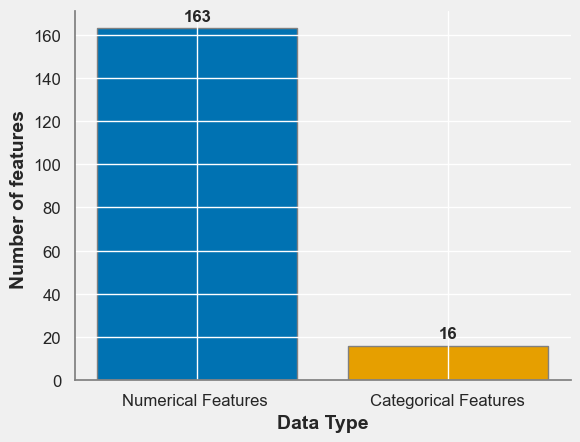

In [111]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

data = [len(numerical_attributes),len(categorical_attributes)]
labels = ['Numerical Features ', 'Categorical Features']

fig, ax = plt.subplots()
bars = ax.bar(labels, data, color=['#0072B2', '#E69F00'], edgecolor='black')

# Add shadows to the bars
for bar in bars:
    bar.set_edgecolor('gray')
    bar.set_linewidth(1)
    bar.set_zorder(0)

    # Add labels to the bars
    height = bar.get_height()
    ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# Customize the axis labels and ticks
ax.set_xlabel('Data Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of features ', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)

# Customize the plot background
ax.set_facecolor('#F0F0F0')
fig.set_facecolor('#F0F0F0')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


# Pipeline with other three final models 
## Block diagram 

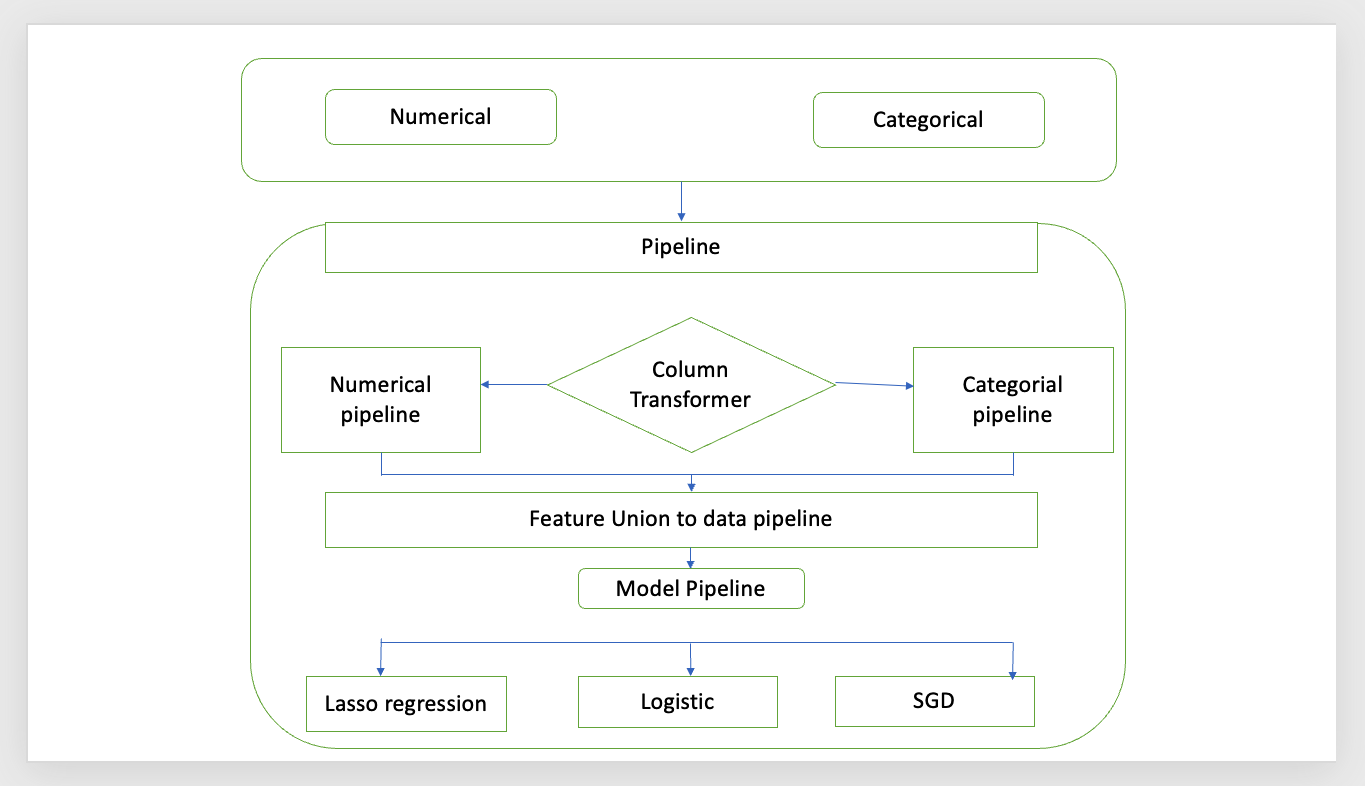

In [112]:
from IPython.display import Image
Image(filename='pipe_block.png')


## Pipeline code for the three models (Lasso, SGD, LogisticRegression)   

- Model-4 baseline using with Lasso(alpha=0.1),
- Model-5 baseline using with SGDClassifier(),
- Model-6 baseline using with LogisticRegression( )


For the under-sampled dataset 2, there are three Baseline models included in the pipeline, namely Model 3, Model 4, and Model 5. . By including these models in the pipeline, it is hoped that the resulting predictions will be reliable and useful in addressing the challenges posed by the imbalanced dataset.

Training and evaluating Baseline_Model-4:Lasso Regression...
Baseline_Model-4:Lasso Regression training and evaluation complete.



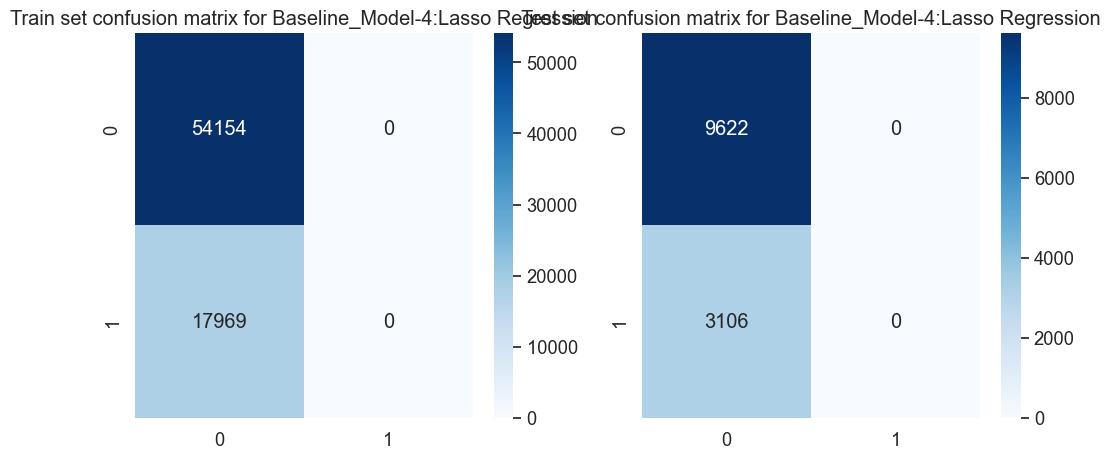

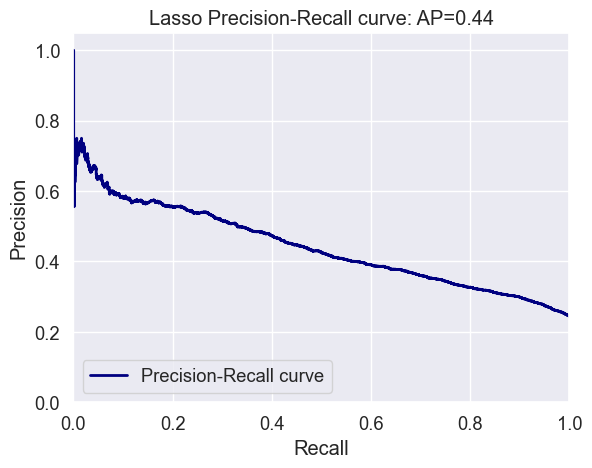

Training and evaluating Baseline_Model-5:SGD Lasso Regression...
Baseline_Model-5:SGD Lasso Regression training and evaluation complete.



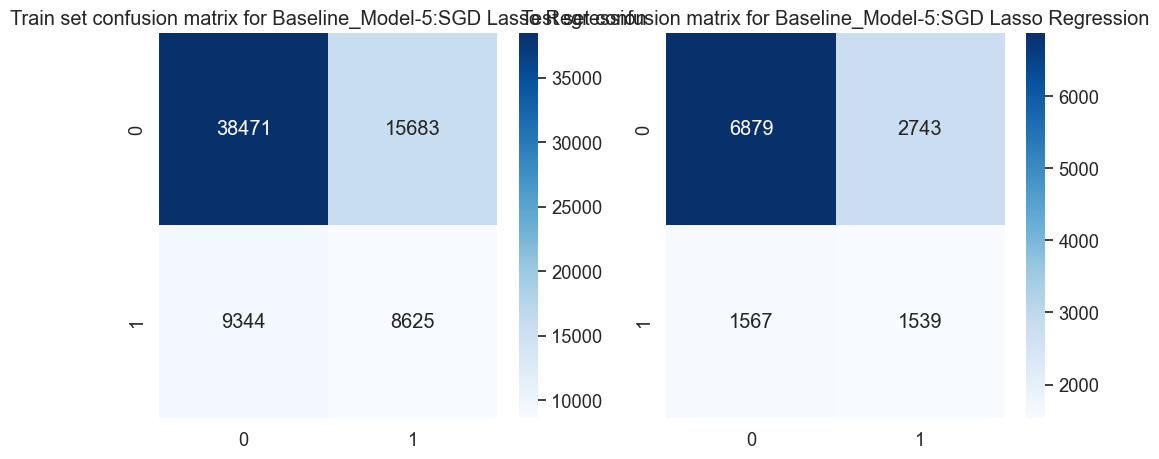

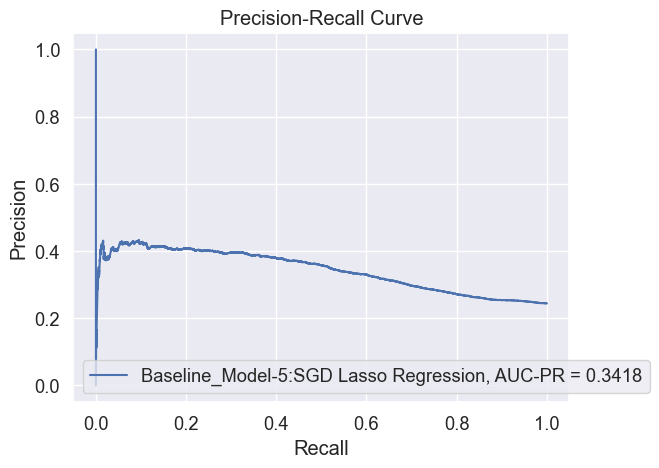

Training and evaluating Baseline_Model-6:Logistic Regression...
Baseline_Model-6:Logistic Regression training and evaluation complete.



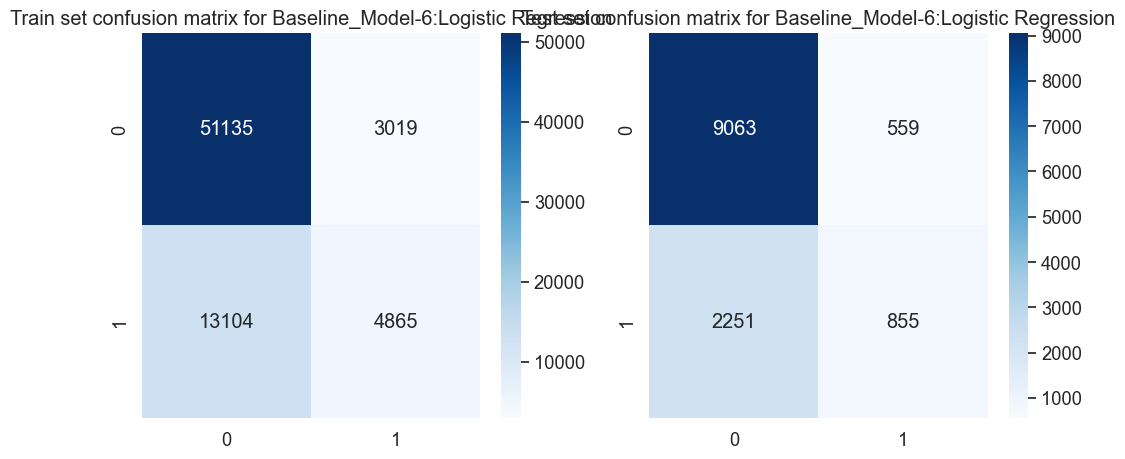

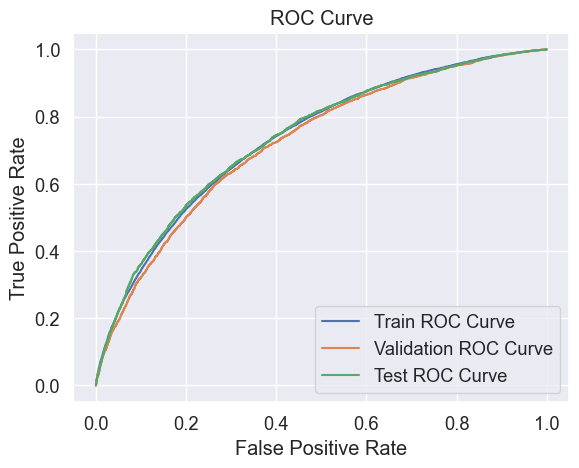

In [113]:
from sklearn.metrics import auc
# Define a column transformer to separate categorical and numeric features
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_attributes),
    ('cat', cat_transformer, categorical_attributes)
])

# Define the Logistic Regression pipeline
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

# Define the Lasso Regression pipeline
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1)),
])

# Define the SGD Lasso Regression pipeline
sgd_lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('sgd', SGDClassifier(loss='squared_hinge', penalty='l1', alpha=0.1)),
])



# Define the pipeline for each model
models = {
   
    'Baseline_Model-4:Lasso Regression': lasso_pipeline,
    'Baseline_Model-5:SGD Lasso Regression': sgd_lasso_pipeline, 
    'Baseline_Model-6:Logistic Regression': logreg_pipeline,
    
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f'Training and evaluating {model_name}...')
    trained_model = model.fit(X_train, y_train)
    
    f1_train = f1_score(y_train, trained_model.predict(X_train) > 0.5)
    f1_valid = f1_score(y_valid, trained_model.predict(X_valid) > 0.5)
    f1_test = f1_score(y_test, trained_model.predict(X_test) > 0.5)
    
    
    
    exp_name = f'{model_name}_with_undersampling_Two {len(selected_features)}_features'
    expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                   [accuracy_score(y_train, trained_model.predict(X_train) > 0.5), 
                    accuracy_score(y_valid, trained_model.predict(X_valid) > 0.5),
                    accuracy_score(y_test, trained_model.predict(X_test) > 0.5),
                    roc_auc_score(y_train, trained_model.predict(X_train)),
                    roc_auc_score(y_valid, trained_model.predict(X_valid)),
                    roc_auc_score(y_test, trained_model.predict(X_test)),
                    f1_train, f1_valid, f1_test],
        4))
    print(f'{model_name} training and evaluation complete.\n')
    # Compute confusion matrices for train and test sets
    cm_train = confusion_matrix(y_train, trained_model.predict(X_train) > 0.5)
    cm_test = confusion_matrix(y_test, trained_model.predict(X_test) > 0.5)
    
    # Plot the confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].set_title(f'Train set confusion matrix for {model_name}')
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[1].set_title(f'Test set confusion matrix for {model_name}')
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    plt.show()
    

    if model_name=='Baseline_Model-4:Lasso Regression':
        from sklearn.metrics import precision_recall_curve, average_precision_score

        # Train the Lasso model
        lasso_pipeline.fit(X_train, y_train)

        # Compute the predicted probabilities for the test set
        y_proba = lasso_pipeline.predict(X_test)

        # Compute the precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

        # Compute the average precision score
        average_precision = average_precision_score(y_test, y_proba)

        # Plot the precision-recall curve
        plt.plot(recall, precision, color='navy', lw=2, label='Precision-Recall curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Lasso Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
        plt.legend(loc="lower left")
        plt.show()
        
    

     
    if model_name == 'Baseline_Model-5:SGD Lasso Regression':
        # Compute predicted scores for the test set
        y_score = trained_model.decision_function(X_test)

        # Compute precision and recall for various thresholds
        precision, recall, thresholds = precision_recall_curve(y_test, y_score)

        # Compute AUC-PR score
        auc_score = auc(recall, precision)

        # Plot the precision-recall curve
        plt.plot(recall, precision, label=f'{model_name}, AUC-PR = {auc_score:.4f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.show()
        
    if model_name=='Baseline_Model-6:Logistic Regression':
        
            # ROC Curve
        train_fpr, train_tpr, _ = roc_curve(y_train, pipelined_model.predict_proba(X_train)[:, 1])
        valid_fpr, valid_tpr, _ = roc_curve(y_valid, pipelined_model.predict_proba(X_valid)[:, 1])
        test_fpr, test_tpr, _ = roc_curve(y_test, pipelined_model.predict_proba(X_test)[:, 1])

        plt.plot(train_fpr, train_tpr, label='Train ROC Curve')
        plt.plot(valid_fpr, valid_tpr, label='Validation ROC Curve')
        plt.plot(test_fpr, test_tpr, label='Test ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

# Final Experimental results.

In [114]:
expLog

exp_name  Train Acc  Valid Acc  \
0  Baseline_Model-1:Logistic Regression with 121_...     0.9197     0.9160   
1  Baseline_Model-2:Logistic Regression with 15_f...     0.9197     0.9192   
2  Baseline_Model-3:Logistic Regression with_unde...     0.7685     0.7597   
3  Baseline_Model-4:Lasso Regression_with_undersa...     0.7509     0.7496   
4  Baseline_Model-5:SGD Lasso Regression_with_und...     0.6530     0.6507   
5  Baseline_Model-6:Logistic Regression_with_unde...     0.7765     0.7660   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.9194     0.7480     0.7492     0.7436          0.0222          0.0214   
1     0.9159     0.7355     0.7357     0.7355          0.0152          0.0132   
2     0.7721     0.7361     0.7243     0.7382          0.3161          0.2917   
3     0.7560     0.7092     0.6935     0.7089          0.0000          0.0000   
4     0.6614     0.5952     0.5895     0.6052          0.4080          0.4011   
5     0.7792     0.6075     0.5942     0.6086          0.3764          0.3487   

   Test F1 Score  
0         0.0272  
1         0.0120  
2         0.3192  
3         0.0000  
4         0.4166  
5         0.3783

F1 Score:  0.319173902839709


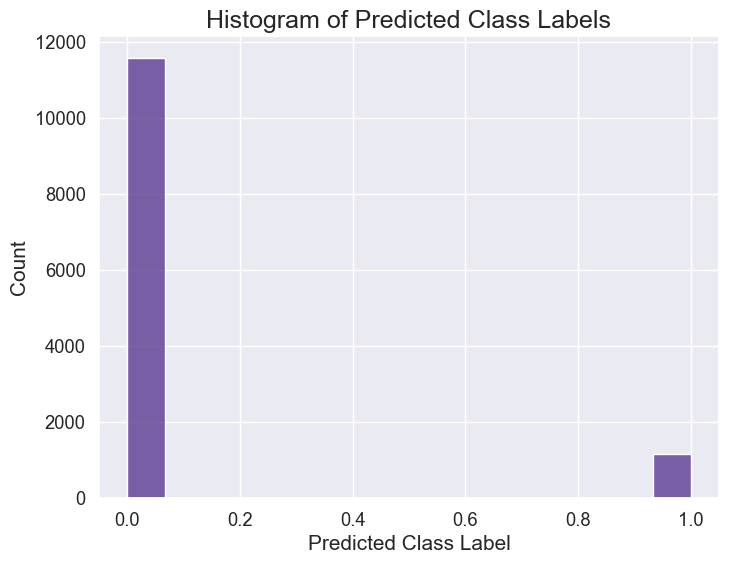

In [115]:
# Predict class labels for the test set
pred = pipelined_model.predict(X_test)

# Create histogram of predicted class labels with a new color scheme
plt.figure(figsize=(8, 6))
sns.histplot(pred, kde=False, color="#5C3C92", alpha=0.8)
plt.xlabel("Predicted Class Label", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Histogram of Predicted Class Labels", fontsize=18)

# Compute the F1 score for the test set and print it
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)


# Kaggle Competition Submission 

To prepare the submission file, a probability prediction for the TARGET variable must be provided for each SK_ID_CURR in the test set. The format of the file should include a header and adhere to the require structure .

In [116]:
X_kaggle_test
# Print the X_kaggle_test dataframe nicely using the `to_string()` method
#print(X_kaggle_test.to_string(index=False))


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             450000.0                    0.018850      -19241          -2329   
1             180000.0                    0.035792      -18064          -4469   
2             630000.0                    0.019101      -20038          -4458   
3            1575000.0                    0.026392      -13976          -1866   
4             625500.0                    0.010032      -13040          -2191   
...                ...                         ...         ...            ...   
48739         270000.0                    0.002042      -19970          -5169   
48740         495000.0                    0.035792      -11186          -1149   
48741         315000.0                    0.026392      -15922          -3037   
48742         450000.0                    0.018850      -13968          -2731   
48743         270000.0                    0.006629      -13962           -633   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  NAME_FAMILY_STATUS  \
0                -5170.0             -812  ...             Married   
1                -9118.0            -1623  ...             Married   
2                -2175.0            -3503  ...             Married   
3                -2000.0            -4208  ...             Married   
4                -4000.0            -4262  ...             Married   
...                  ...              ...  ...                 ...   
48739            -9094.0            -3399  ...               Widow   
48740            -3015.0            -3003  ...             Married   
48741            -2681.0            -1504  ...             Married   
48742            -1461.0            -1364  ...             Married   
48743            -1072.0            -4220  ...             Married   

       NAME_HOUSING_TYPE     OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_START  \
0      House / apartment                 NaN                     TUESDAY   
1      House / apartment  Low-skill Laborers                      FRIDAY   
2      House / apartment             Drivers                      MONDAY   
3      House / apartment         Sales staff                   WEDNESDAY   
4      House / apartment                 NaN                      FRIDAY   
...                  ...                 ...                         ...   
48739  House / apartment                 NaN                   WEDNESDAY   
48740  House / apartment         Sales staff                      MONDAY   
48741  House / apartment                 NaN                   WEDNESDAY   
48742  House / apartment            Managers                      MONDAY   
48743  House / apartment          Core staff                     TUESDAY   

            ORGANIZATION_TYPE  FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0                Kindergarten                 NaN  block of flats   
1               Self-employed                 NaN             NaN   
2           Transport: type 3                 NaN             NaN   
3      Business Entity Type 3    reg oper account  block of flats   
4      Business Entity Type 3                 NaN             NaN   
...                       ...                 ...             ...   
4873

In [117]:
test_class_scores = pipelined_model.predict_proba(X_kaggle_test)[:, 1]

In [118]:
from pprint import pprint
pprint(test_class_scores[0:25])


array([0.17235142, 0.50037422, 0.10121203, 0.20204841, 0.37381568,
       0.16674992, 0.06691341, 0.25081692, 0.04940834, 0.44477817,
       0.21621422, 0.25665186, 0.3984855 , 0.37558075, 0.19920144,
       0.35172439, 0.20572635, 0.08172217, 0.28353873, 0.09724351,
       0.10013068, 0.0571719 , 0.15034449, 0.21893225, 0.13728733])


In [119]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.172351
1      100005  0.500374
2      100013  0.101212
3      100028  0.202048
4      100038  0.373816

In [120]:
submit_df.to_csv("submission.csv",index=False)

In [122]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|███████████████████████████████████████| 1.24M/1.24M [00:01<00:00, 798kB/s]
Successfully submitted to Home Credit Default Risk

# Write-up 

## Project Title: Home Credit Default Risk

## Team and Phase leader plan
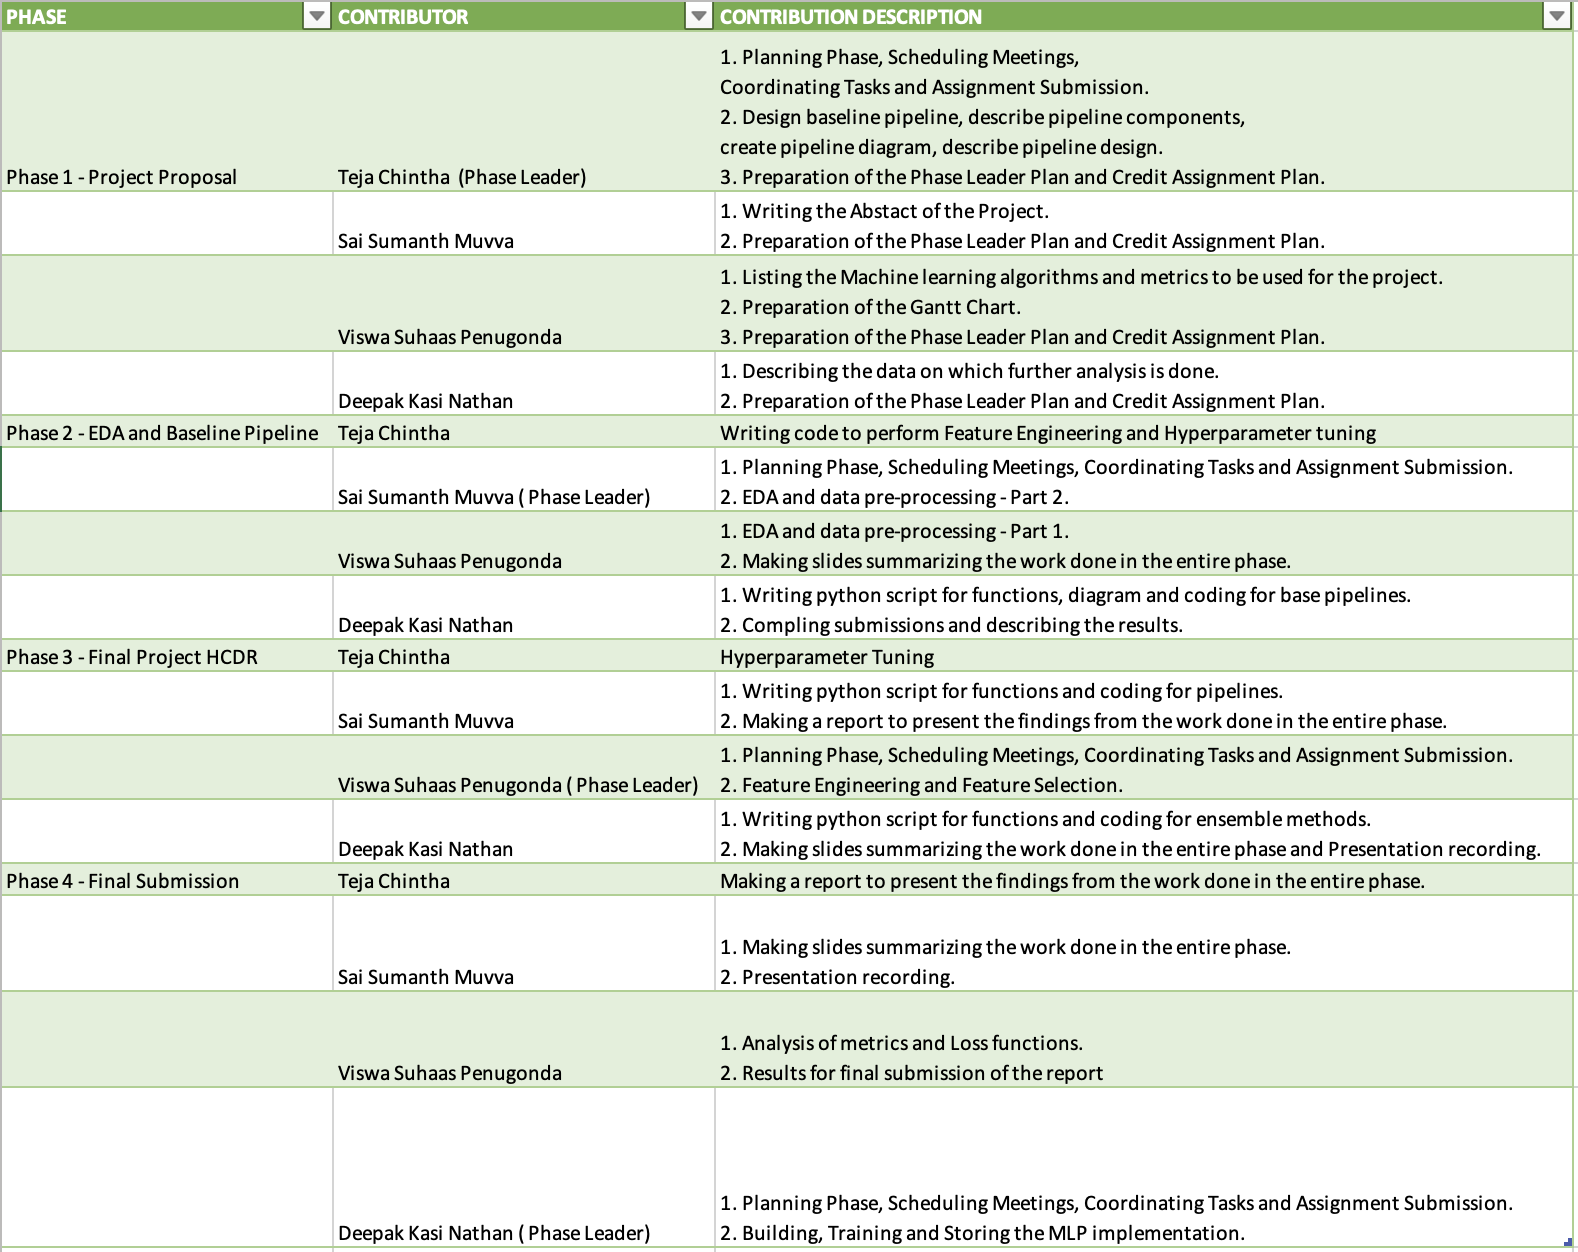

## Credit Assignment Plan
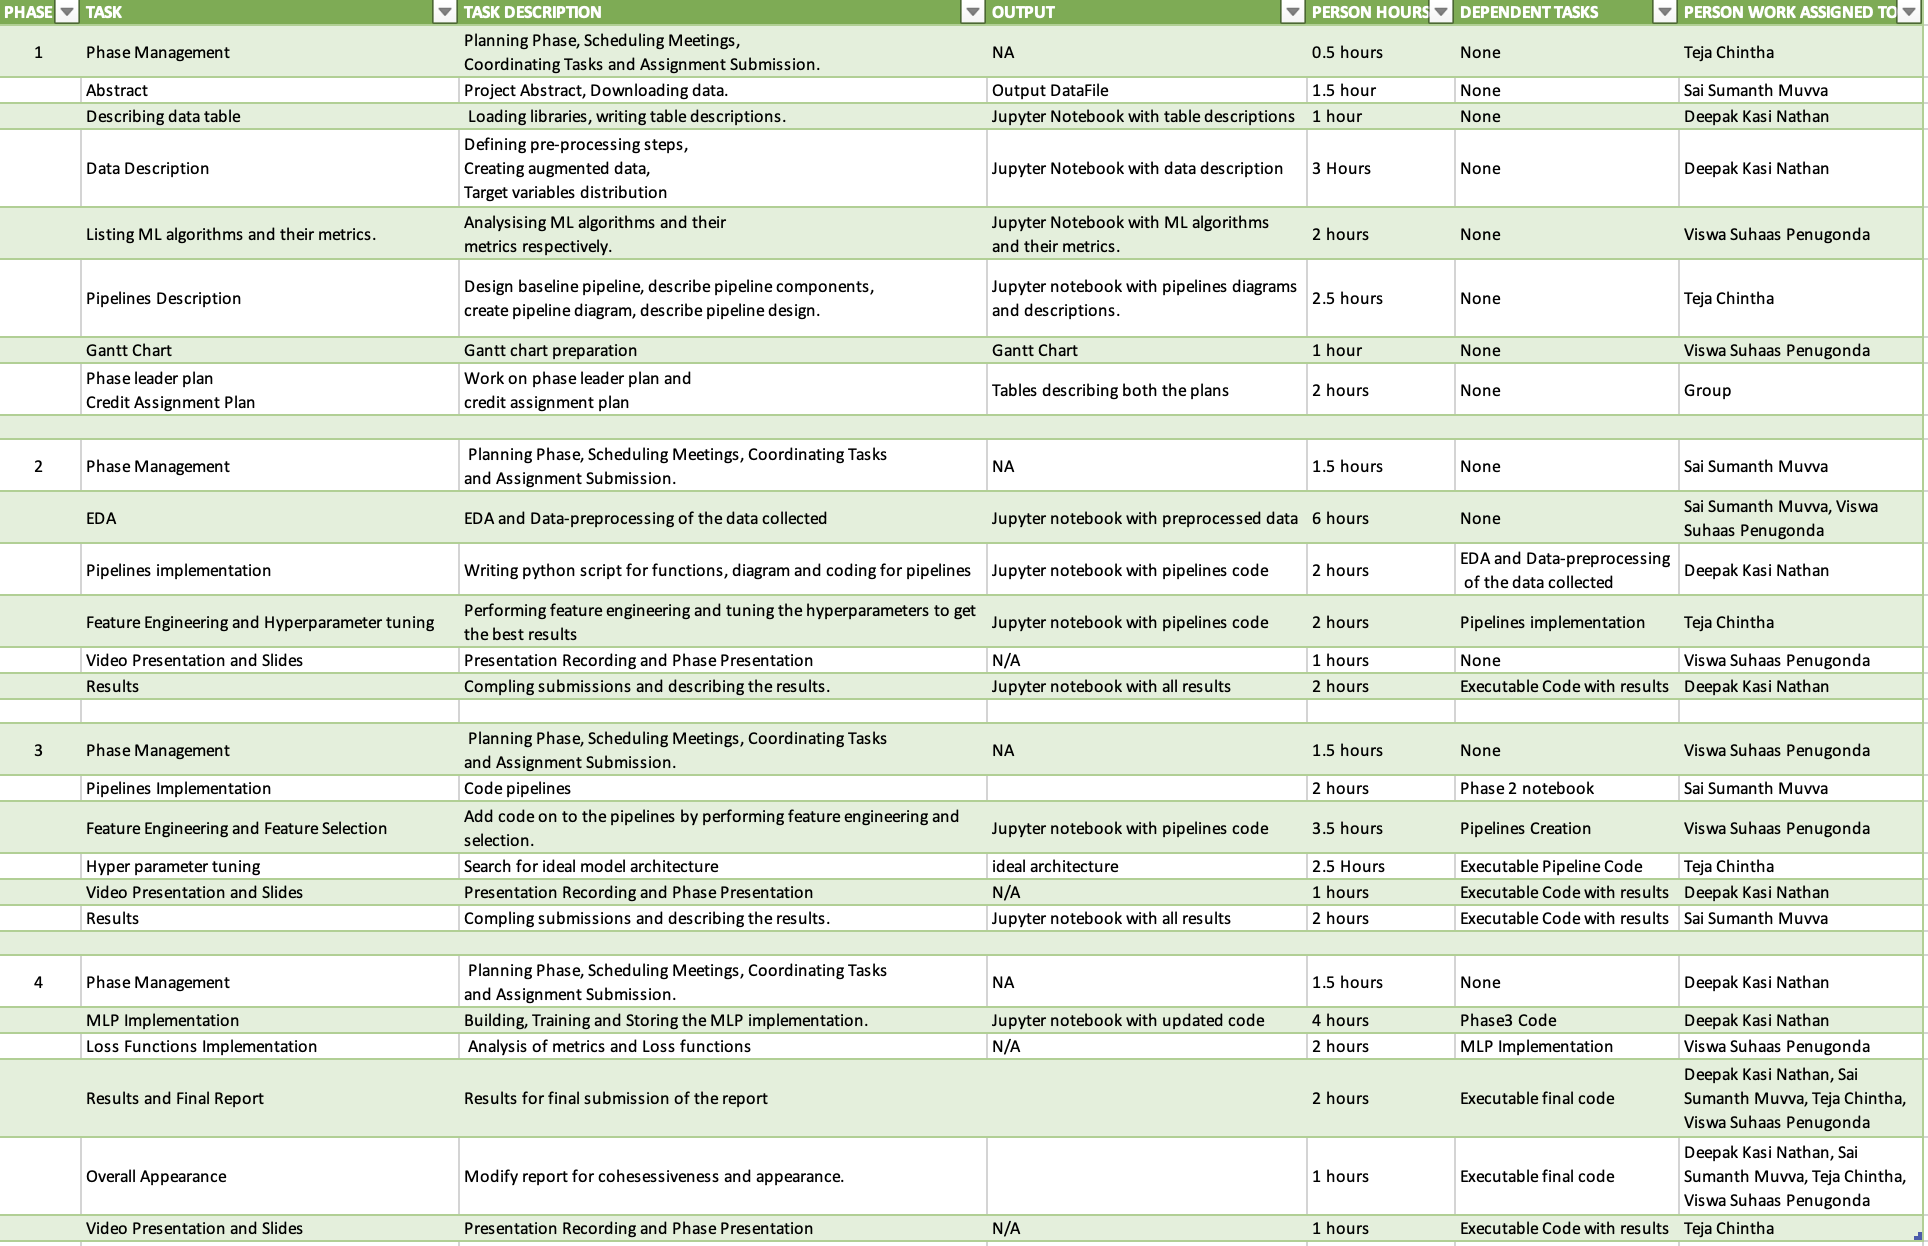

## Abstract

In this project, we aim to predict the probability of default for Home Credit clients based on various features derived from historical data. Home Credit provides loans to clients but faces challenges in assessing the creditworthiness of clients with little or no credit history. Our primary objective is to use historical data from multiple sources and construct a robust machine learning model that can accurately predict the risk of default.
To achieve this, we pre-processed and did feature engineering, performed EDA, and experimented with a range of machine learning algorithms, such as logistic regression, Lasso and SGD Lasso. We fine-tuned these models’ using feature selection to select the best performing model. Key metrics, such as ROC AUC, F1 Score, PR AUC are employed to assess the effectiveness of our models in predicting default probabilities.
Our experiments involved comparing these models' performance and identifying the most effective pipeline. The best accuracy (91.94%) was achieved using baseline logistic regression with full batch gradient descent, however, its low F1 score (0.0272) suggests potential imbalanced class performance. By implementing the best model, Home Credit will be able to make more informed lending decisions, minimize unpaid loans, and promote financial services for individuals with limited access to banking, ultimately fostering financial inclusion for underserved populations.

## Introduction

### Background on Home Credit
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### Data Description
The data used in this project is sourced from a financial institution (Home Credit) that provides loans to customers and it is available on kaggle. The dataset comprises various tables with information about the customers, their loan applications, credit history, and other financial information.

#### Data files overview

There are `7 different sources` of data:

* __application_train/application_test (307k rows, and 48k rows):__ The main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


#### Table sizes
| S. No | Table Name            | Rows       | Features | Numerical Features | Categorical Features | Megabytes |
| -----: | --------------------- | ----------: | --------: | ------------------: | --------------------: | ---------: |
| 1     | application_train     | 307,511    | 122      | 106                | 16                   | 158MB     |
| 2     | application_test      | 48,744     | 121      | 105                | 16                   | 25MB      |
| 3     | bureau                | 1,716,428  | 17       | 14                 | 3                    | 162MB     |
| 4     | bureau_balance        | 27,299,925 | 3        | 2                  | 1                    | 358MB     |
| 5     | credit_card_balance   | 3,840,312  | 23       | 22                 | 1                    | 405MB     |
| 6     | installments_payments | 13,605,401 | 8        | 21                 | 16                   | 690MB     |
| 7     | previous_application  | 1,670,214  | 37       | 8                  | 0                    | 386MB     |
| 8     | POS_CASH_balance      | 10,001,358 | 8        | 7                  | 1                    | 375MB     |


#### Data Dictionary

As part of the data download comes a Data Dictionary. It is named as `HomeCredit_columns_description.csv`. It contains information about all  fields present in all the above tables. (like the metadata).  

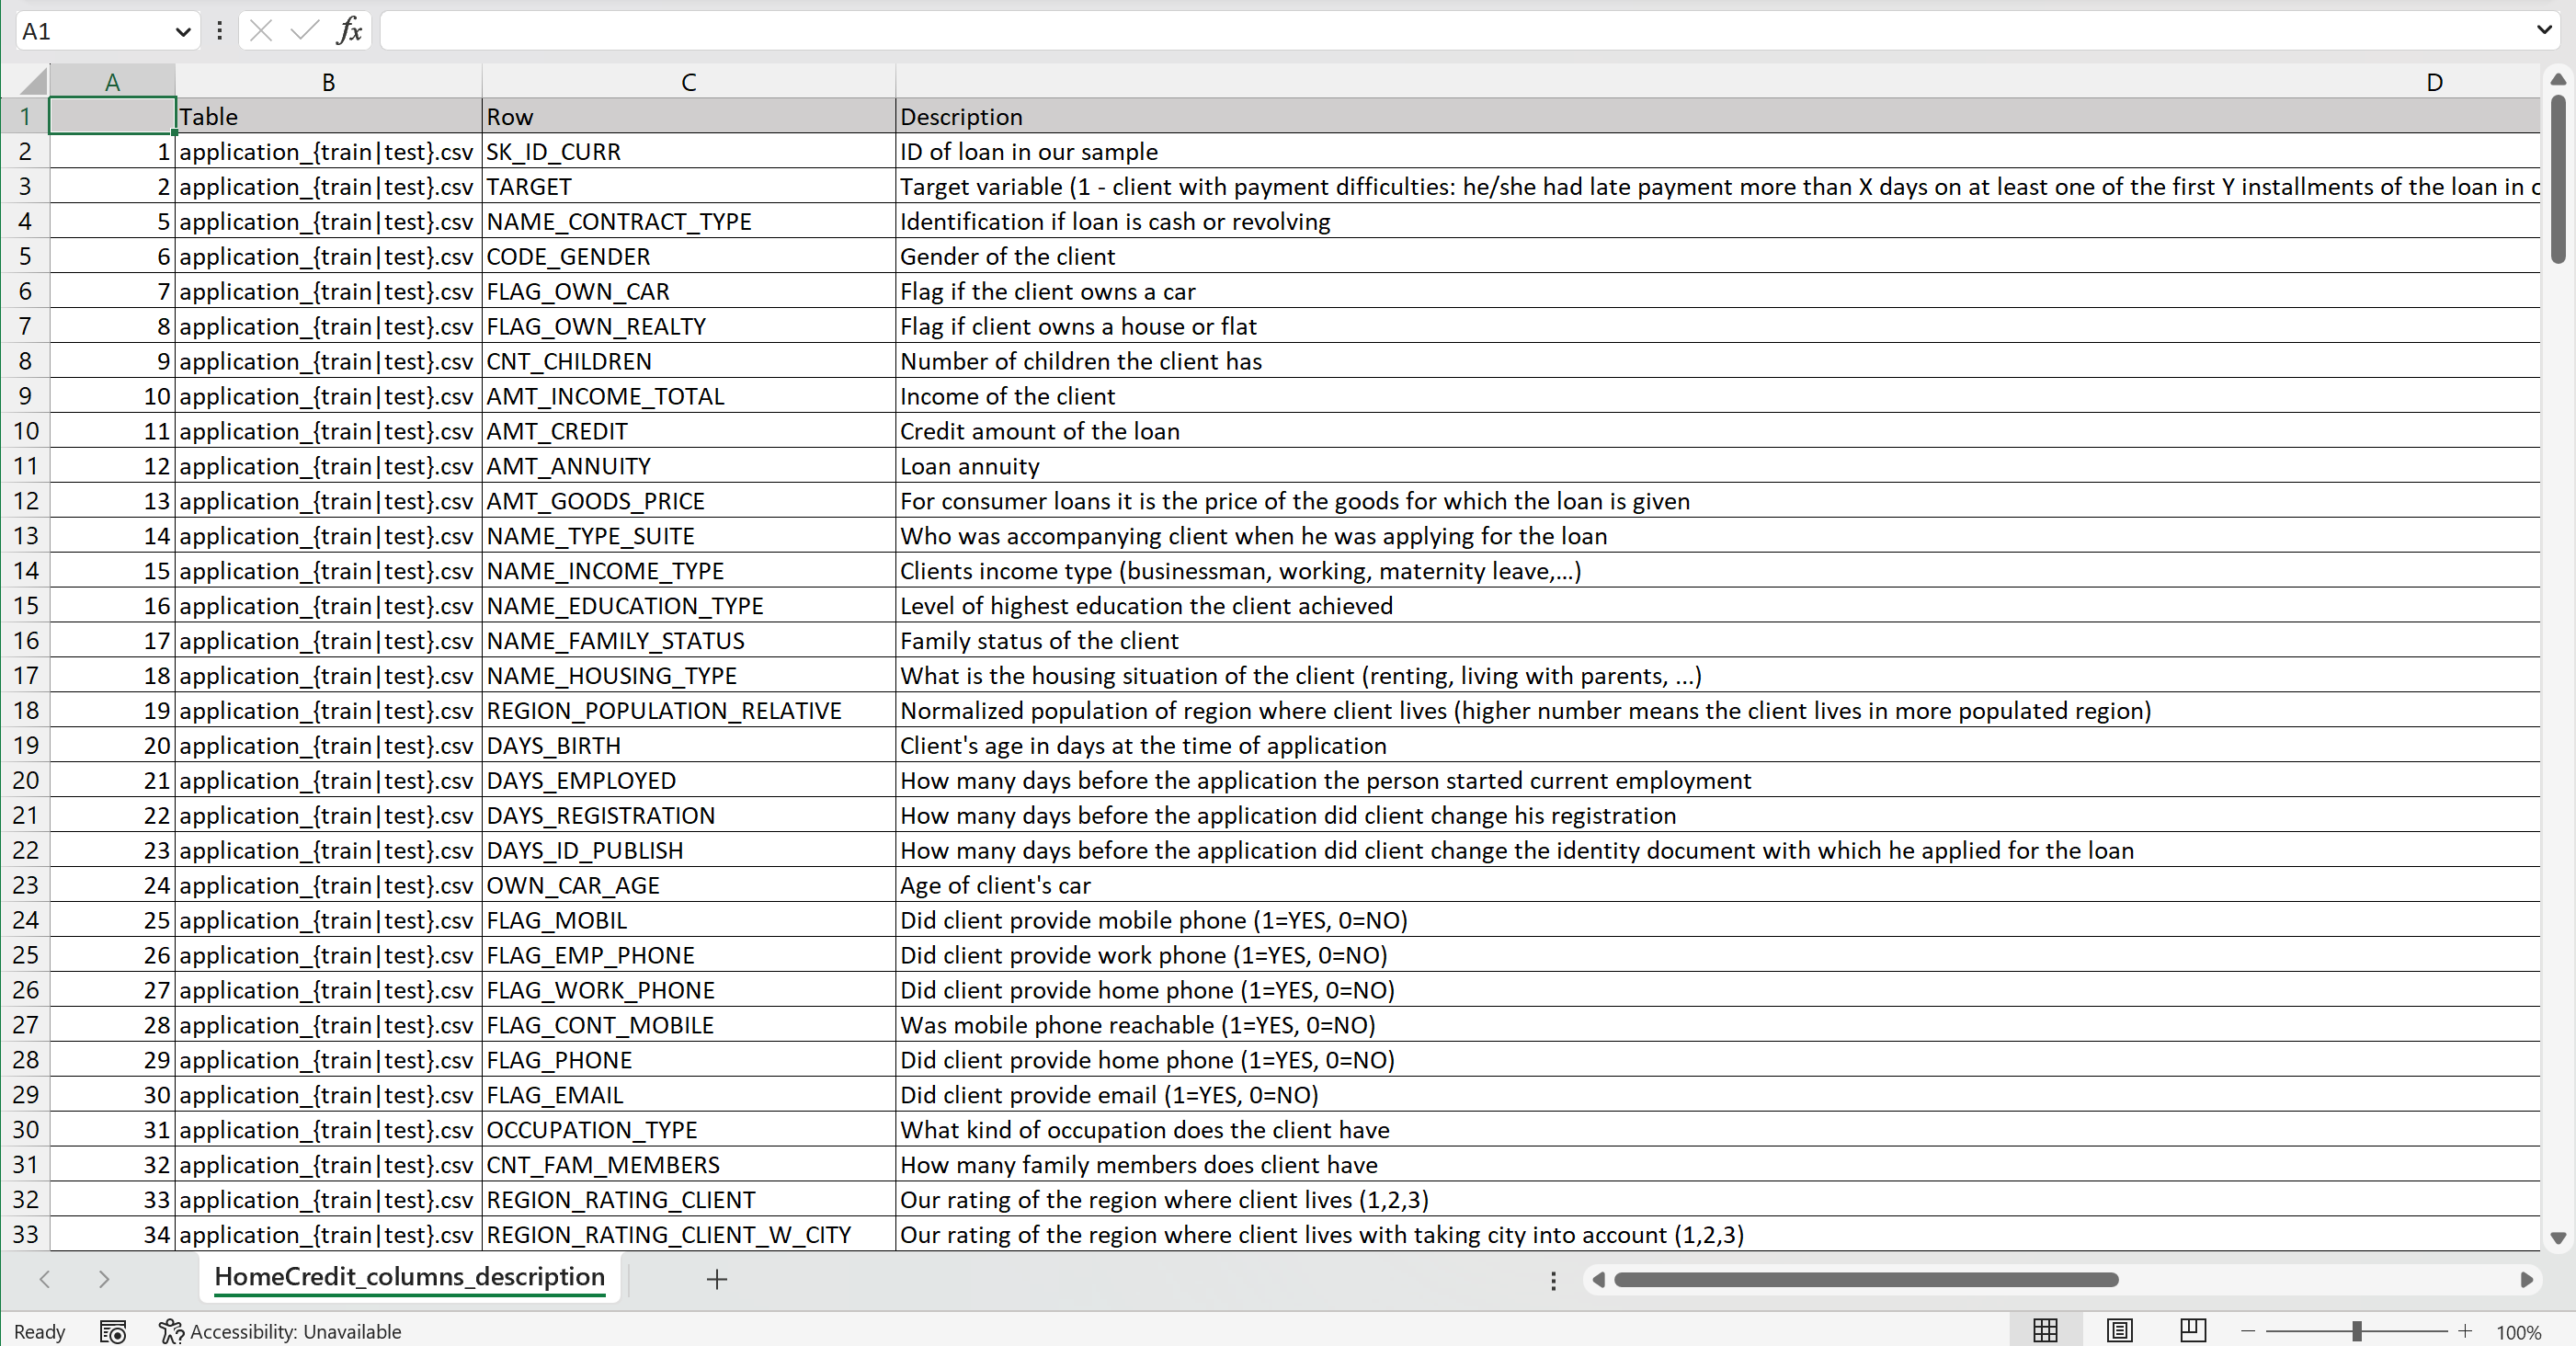

#### Table Diagram
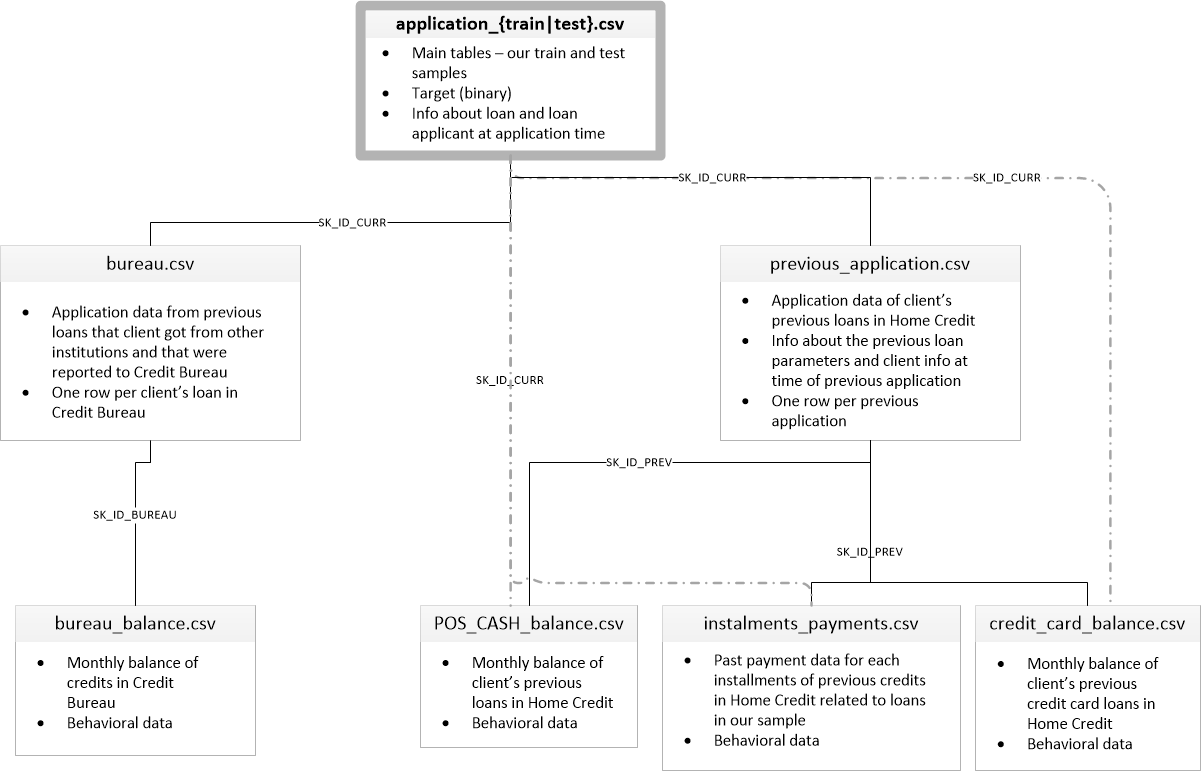

### Tasks to be tackled
The main steps to achieve this objective are:

- **`Understand the data`** : We have multiple tables with different granularities. We start by examining the data dictionaries provided and understanding the relationships between tables. Identify the primary key for each table and determine how the tables can be joined.

- **`Data preprocessing`** : We first clean and preprocess the data. We will perform EDA to understand the relationships between various features and their significance in predicting the target variable. 

- **`Feature engineering`** : For each secondary table (e.g., bureau, previous_application, etc.), we create new features that capture relevant information. This can involve calculating summary statistics like mean, median, min, max, and count for numeric columns, or counting occurrences for categorical columns. Consider creating interaction features or ratios between existing features if they make sense in the context of the problem

- **`Aggregate secondary tables`** : Group the secondary tables by the common key (usually SK_ID_CURR) and aggregate the features using relevant aggregation functions (e.g., sum, mean, count, etc.). This step will create a single-row summary for each customer in the secondary tables.

- **`Merge primary and secondary tables`** : Combine the main dataset with the secondary datasets using appropriate join operations to create a comprehensive dataset that captures all relevant information about the customers. Ex. Merge the aggregated secondary tables with the primary table (application_train or application_test) using the common key (SK_ID_CURR). Perform left joins to ensure that you retain all records from the primary table.

- **`Dimensionality reduction`** : After merging, you may end up with a large number of features. Use feature selection techniques to remove irrelevant or redundant features. Some common methods include 
    - **`Correlation analysis`** : Remove highly correlated features to avoid multicollinearity. 
    - **`Feature importance`** : Use algorithms like Random Forests or Gradient Boosting Machines to rank features based on their importance. 
    - **`Recursive feature elimination (RFE)`** : Train a model and iteratively remove the least important features.  
    - **`Lasso regression or Elastic Net`** : Use regularization methods to shrink coefficients of unimportant features to zero, effectively removing them.  
    - **`Preprocess data`** : Scale the features and impute missing values and dandle categorical variables using one-hot encoding, label encoding, or target encoding.  
- **`Model selection and training`** : Choose suitable machine learning models, such as lasso regression, logistic regression, decision trees, random forests, gradient boosting machines (GBMs), and neural networks. Split the data into training and testing sets and train the models.

- **`Model evaluation`** : Evaluate the performance of the models using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. We will compare these models' performance and identify the best performing model based on these evaluation metrics.

- **`Model optimization`** : Perform hyperparameter tuning and feature selection to optimize the model's performance. We will experiment with different combinations of features and hyperparameters to improve the model's predictive accuracy.

By implementing the best model, Home Credit will be able to make more informed lending decisions, minimize unpaid loans, and promote financial services for individuals with limited access to banking, ultimately fostering financial inclusion for underserved populations. The effectiveness of our models in predicting default probabilities will be assessed using key metrics such as ROC AUC, F1 Score, and Gini Coefficient. The corresponding public and private scores will also be evaluated to determine our model's performance.


### Block Diagram of Approach
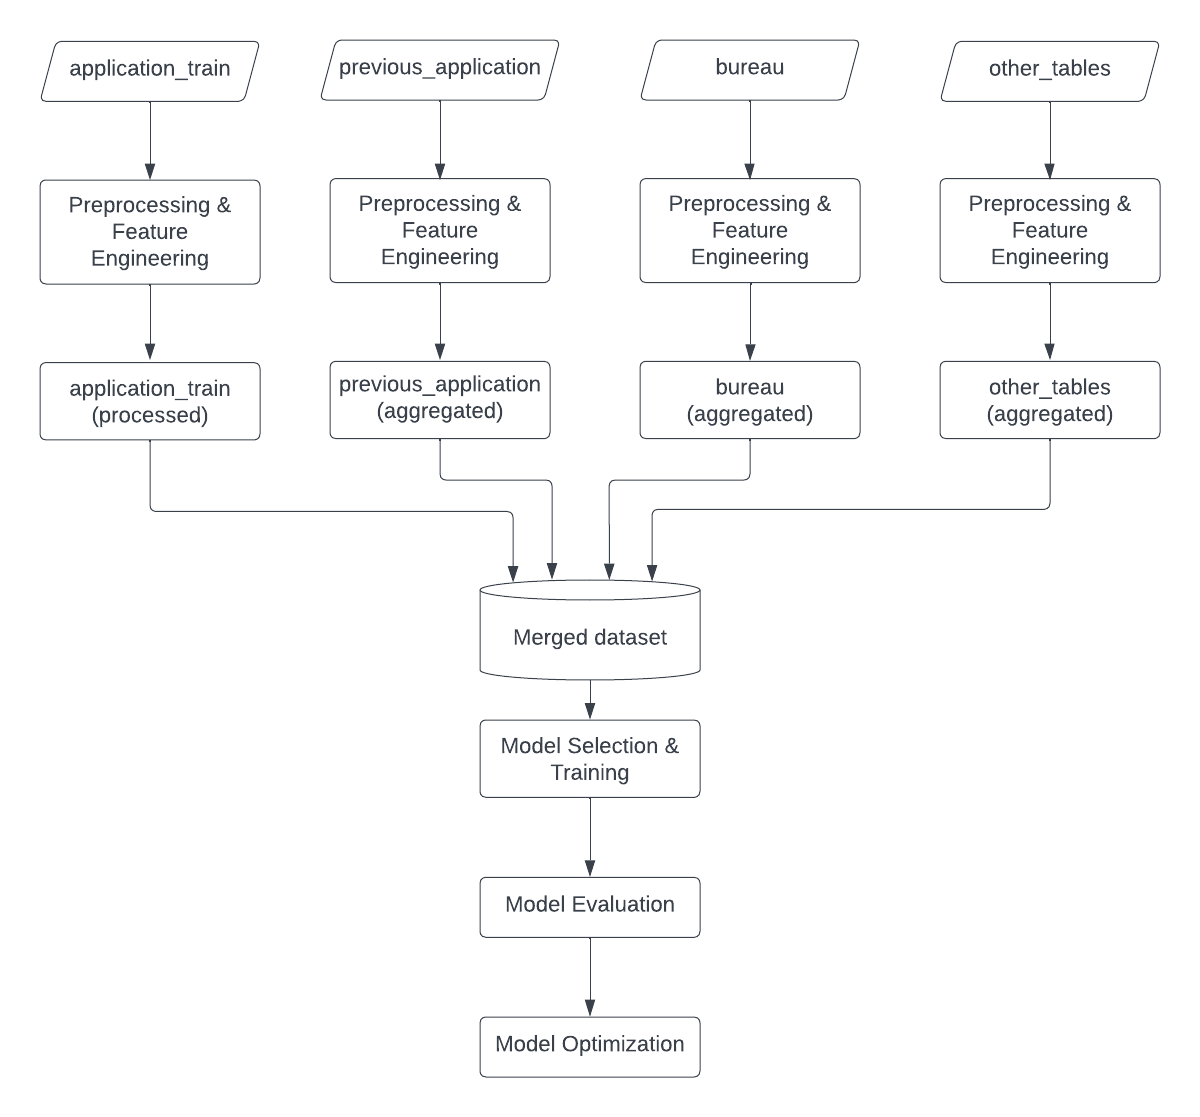

## Experimental results
Please present the results of the various experiments that you conducted. The results should be shown in a table or image. Try to include the different details for each experiment.  
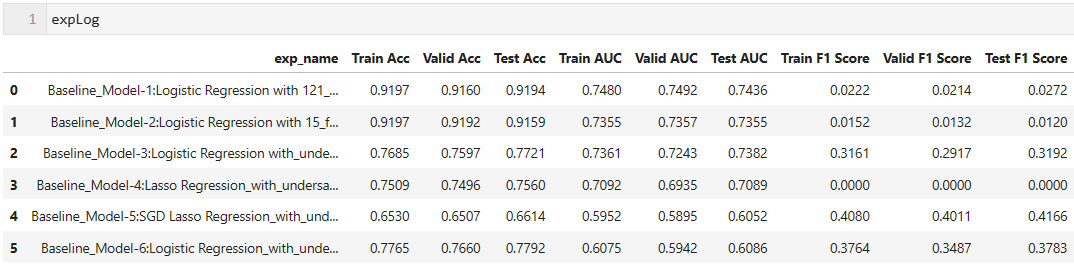

## Discussion
The machine learning project on home credit default risk utilized a dataset with 7 individual tables, containing a total of 104 numerical attributes and 16 categorical attributes. The experiment was performed 6 times, with different techniques and algorithms applied to the data.
The baseline model used was logistic regression with full batch gradient descent, which achieved a test accuracy of 0.9194, a test area under the curve (AUC) of 0.7436, and a test F1 score of 0.0272.
A logistic regression model with 15 selected features resulted in a slightly lower test accuracy of 0.9159, test AUC of 0.7355, and test F1 score of 0.0120.
Undersampling techniques were also applied, including logistic regression and lasso regression with undersampling. The logistic regression with undersampling achieved a test accuracy of 0.7721, test AUC of 0.7382, and test F1 score of 0.3192. The lasso regression with undersampling had a lower test accuracy of 0.7560, test AUC of 0.7089, and a test F1 score of 0.
Additionally, SGD (Stochastic Gradient Descent) lasso regression with undersampling was utilized, resulting in a test accuracy of 0.6614, test AUC of 0.6052, and a test F1 score of 0.4166.
Another logistic regression model with undersampling achieved a test accuracy of 0.7792, test AUC of 0.6086, and test F1 score of 0.3783.
Overall, the results highlight the varying performance of different techniques and algorithms. Moreover, the best accuracy of 91.94 % was achieved by the baseline logistic regression with full batch gradient descent with significantly low F1 score of 0.0272 which means that the model is making accurate predictions overall but may have imbalanced class performance or inconsistent trade-off between precision and recall.

## Conclusion: 
Our project focused on predicting the probability of default for Home Credit clients using machine learning techniques. we employed baseline machine learning pipelines which includes logistic regression, lasso regression, SGD with feature engineering, hyperparameter optimization, and undersampling. We evaluated their performance using key metrics. The best accuracy (91.94%) was achieved using baseline logistic regression with full batch gradient descent; however, its low F1 score (0.0272) suggests potential imbalanced class performance.
Future work involves further experimentation with other algorithms like SVM, KNN, GBM's like XGBoost, and neural networks, feature engineering techniques, and sampling methods, as well as incorporating domain-specific knowledge and expanding the dataset. Our project lays the foundation for Home Credit to make more informed lending decisions and promote financial inclusion for underserved populations.





## Kaggle Submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

Please provide a screenshot of your best kaggle submission.
The screenshot should show the different details of the submission and not just the score.

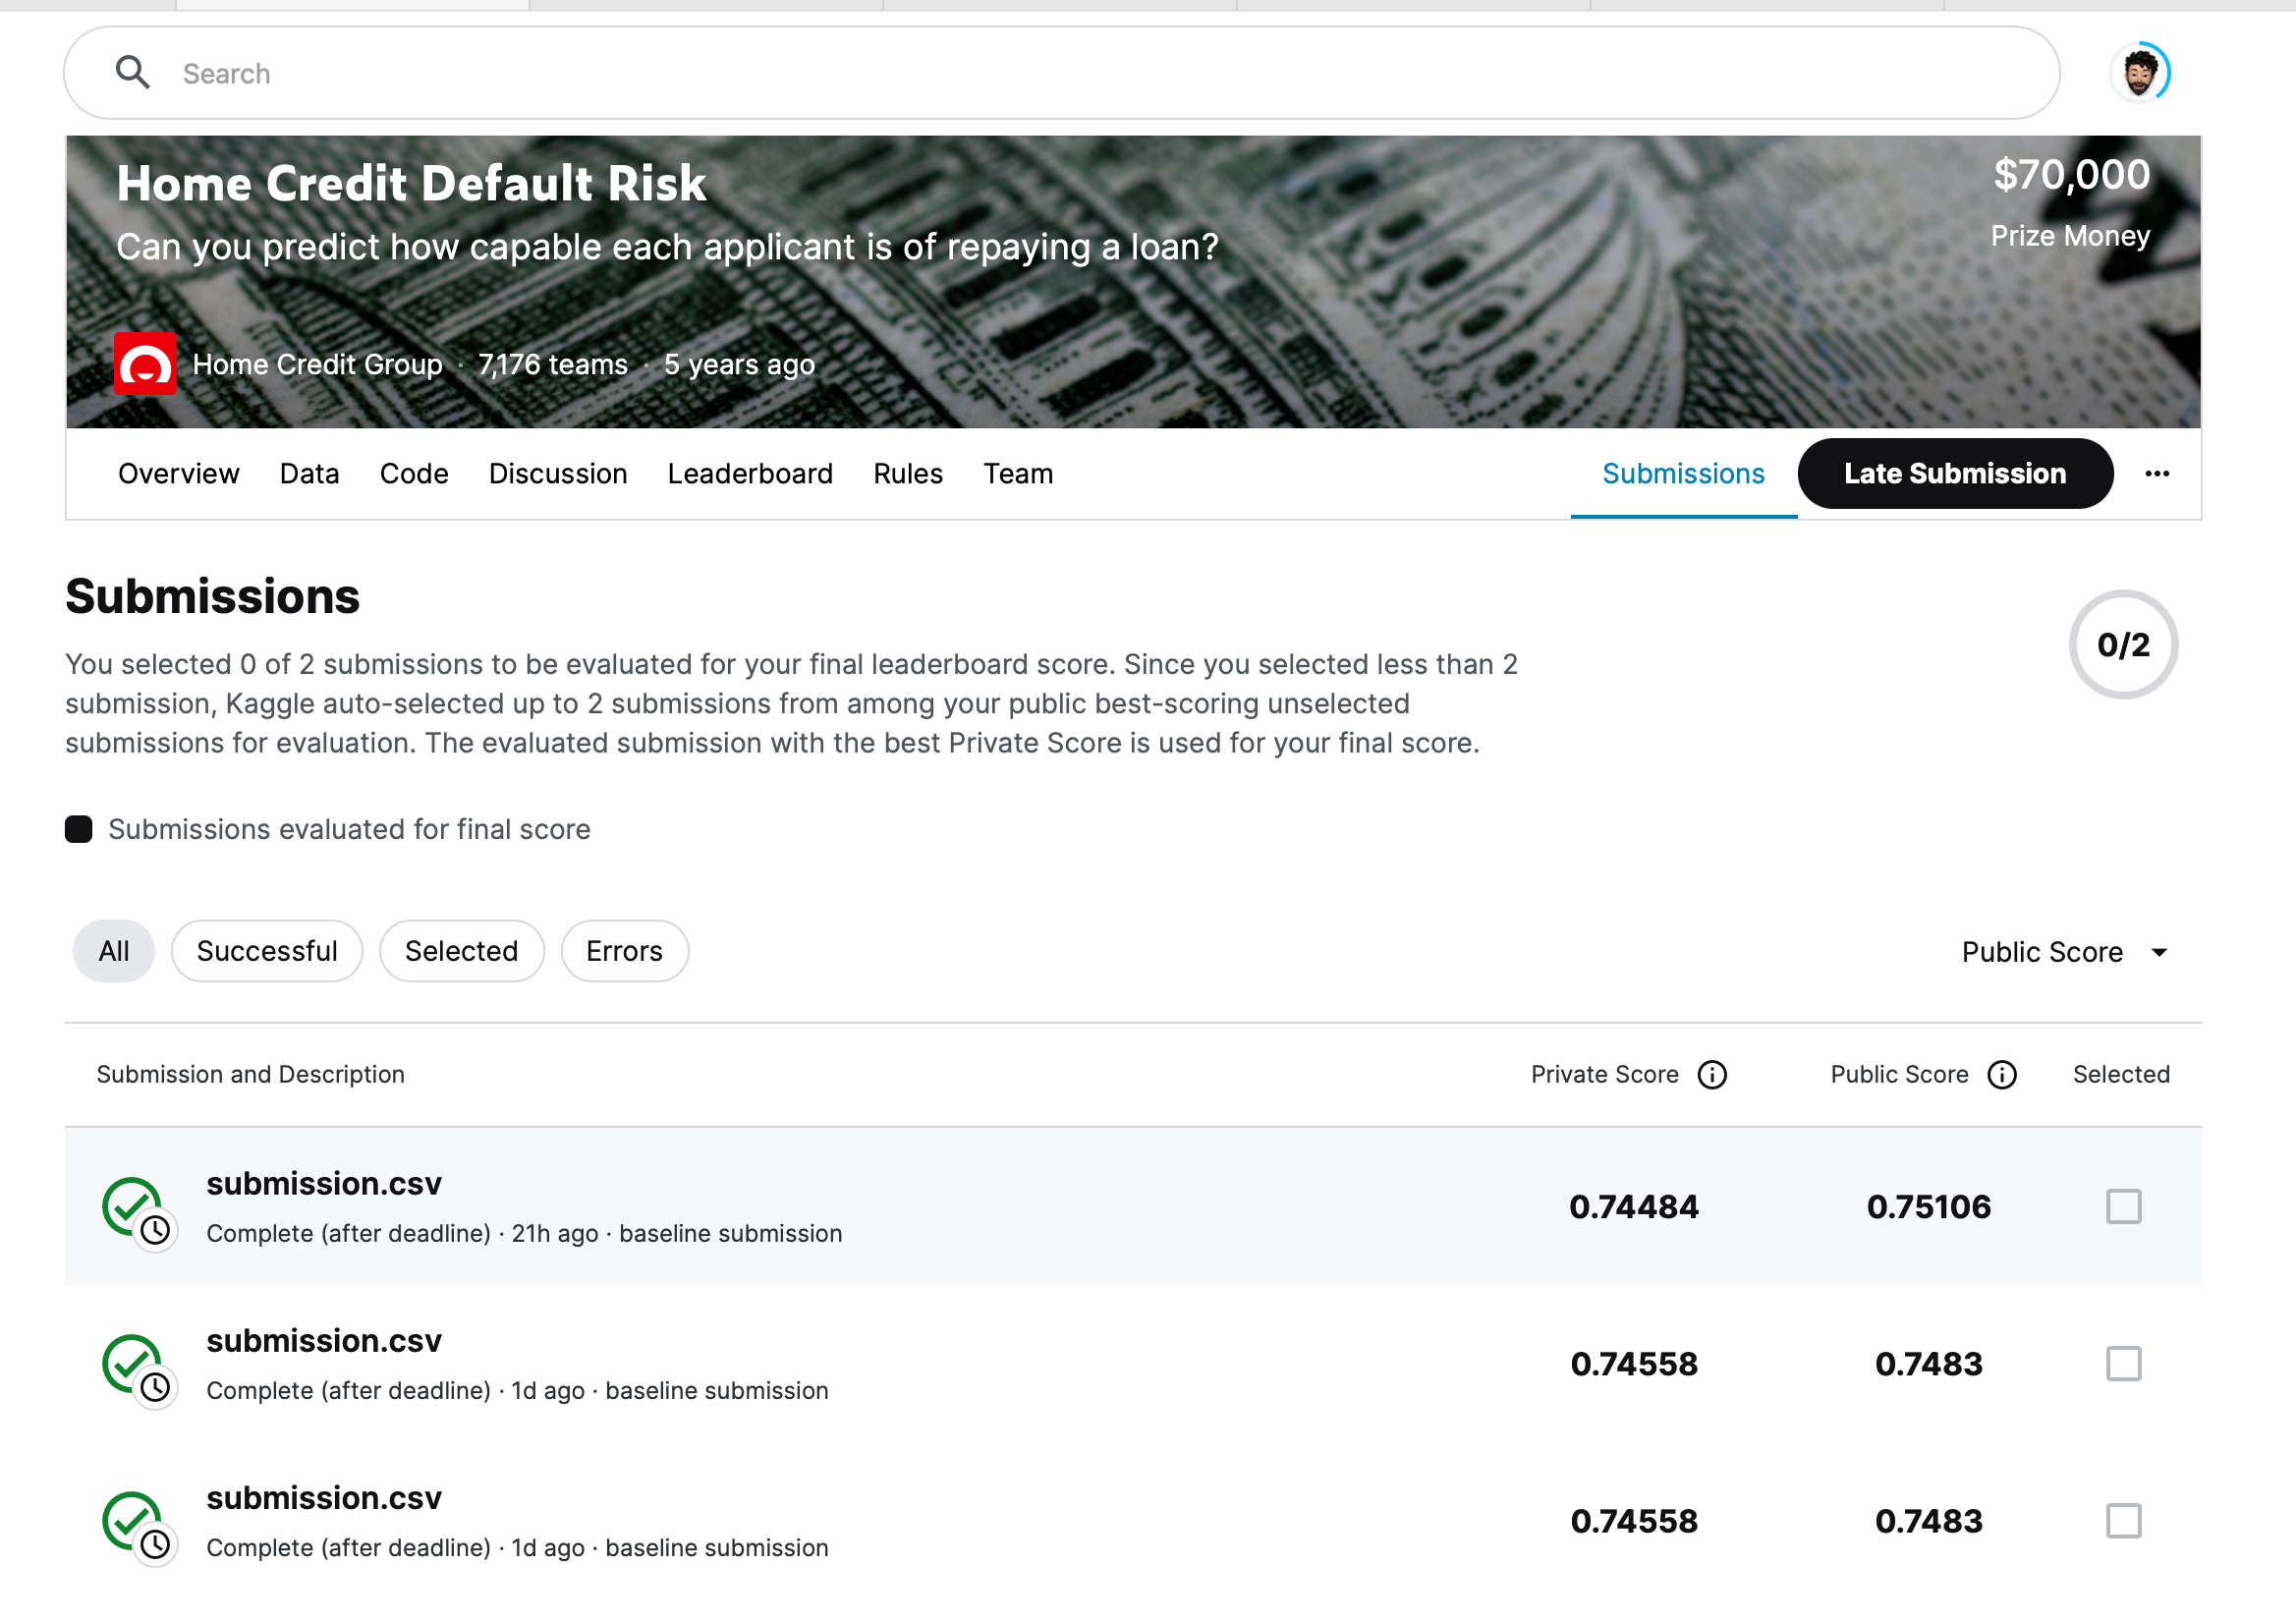

In [125]:
from IPython.display import Image
Image(filename='Kaggle.png')


# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)